In [2]:
import pandas as pd
import numpy as np

# Make numpcy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mat
import colordict as cd
import seaborn as sns

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from flowability_data_upload.Research import main
from flowability_data_upload.Research.main import trymodel, makemodel, modeltest

In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
import math

In [5]:
d = main.Data()
d.importpowders()

           Da       Dp  FWidth  FLength  ELength  EWidth      Volume  \
0      91.229  117.002  95.505  108.054   97.930  91.753  397553.759   
1      79.035  109.685  83.322   99.700   87.563  80.170  258496.560   
2      89.401  137.882  83.101  148.252  165.327  64.848  374138.469   
3      85.351   99.931  82.446  101.719   93.084  79.827  325549.588   
4      90.169  132.818  81.768  135.631  134.040  69.514  383853.784   
...       ...      ...     ...      ...      ...     ...         ...   
22088   3.663    4.912   3.014    6.118    5.179   2.556      25.744   
22089   3.208    4.221   3.010    5.078    4.035   2.716      17.291   
22090   3.160    4.280   3.008    4.673    3.531   2.923      16.520   
22091   3.801    4.480   3.003    5.737    5.341   2.714      28.747   
22092   3.309    4.191   3.002    4.940    3.898   2.871      18.963   

           Area  Perimeter  CHull  Area  ...  Curvature  Surface Area  \
0      6536.643    367.573     7648.185  ...        0.0     26

In [6]:
data = d.data
alldatalist = d.alldatalist
flow = d.flow

cdd = []
icdd = []
cdd = ["Id", "Img Id", "Filter0", "Filter1", "Filter2", "Filter3", "Filter4", "Filter5",
       "Filter6"]  # general columns to drop
icdd = cdd.copy()
icdd.remove("Id")

In [7]:
pflist = []
pdflist = []
fplist = []
fpdlist = []
flist = []
idlist = []
pdict = {}
for i in data.columns:
    pflist.append([])
for powder in alldatalist:
    powder = powder.drop(columns = icdd)
    pid = powder["Id"][0]
    pf = powder.drop(columns = ["Id", "Flow", "Flow Class"])
    idlist.append(pid)
    
    #print("Powder Id: ", powder["Id"][0])
    count = 0
    feat = []
    index = []
    for f in pf:
        ilist = [powder["Id"][0]]
        #jlist = [f]
        index.append(f)
        #print(f, ": ") #feature
        ft = pf[f].to_numpy()
        mean = ft.mean()
        med = np.median(ft)
        fmax = np.amax(ft)
        fmin = np.amin(ft)
        std = ft.std()
        size = ft.size
        zeros = size - np.count_nonzero(ft)
        #print(mean, "\n", med, "\n", std)
        jlist = [mean, med, std, fmax, fmin, zeros]
        flist = ["Mean", "Median", "Std", "Max", "Min", "# 0's"]
        ilist.extend(jlist)
        
        #print(ilist)
        #print(pflist)
        pflist[count].append(jlist)
        fplist.append
        feat.append(jlist)
        count = count + 1
    fplist.append(feat)
    df = pd.DataFrame(feat, columns=flist, index = index)
    for i in ["Mean", "Median", "Max", "Min", "Std"]:
        df[i] = df[i].round(4)
        df[i] = df[i].apply(lambda x: '%.5f' % x) 
    pdict[pid] = df
    fpdlist.append(df)
    
for i in pflist:
    df = pd.DataFrame(i, columns=flist, index = idlist)
    #for i in ["Mean", "Median", "Max", "Min", "Std"]:
        #df[i].round(4)
        #df[i] = df[i].apply(lambda x: '%.5f' % x) 
    df = df.round(1)
    pdflist.append(df)

pdfdict = {}
count = 0
for i in data.columns:
    pdfdict[i] = pdflist[count]
    count = count + 1

In [41]:
fpdlist[0]

Mean                     Median  \
Da                                   34.86080                   36.87600   
Dp                                   41.28000                   42.63450   
FWidth                               32.13420                   33.70700   
FLength                              42.30650                   42.70300   
ELength                              40.64800                   40.93350   
EWidth                               31.06050                   32.34900   
Volume                            42227.35230                26256.21000   
Area                               1237.89430                 1068.01850   
Perimeter                           129.68480                  133.94050   
CHull  Area                        1333.83330                 1135.80350   
CHull Perimeter                     118.36310                  123.15850   
Sphericity                            0.86320                    0.87600   
Compactness                           0.84140                    0.85800   
Roundness                             0.71480                    0.73600   
Ellipse Ratio                         0.81080                    0.85850   
Circularity                           0.75040                    0.76700   
Solidity                              0.93170                    0.94200   
Concavity                             0.06830                    0.05800   
Convexity                             0.92900                    0.94100   
Extent                                0.70750                    0.71700   
hash                2728919188618508288.00000  2653296782606164992.00000   
Transparency                          0.32390                    0.32300   
Curvature                             0.01540                    0.00000   
Surface Area                       4951.57730                 4272.07350   
L/W Ratio                             1.30450                    1.21450   
W/L Aspect Ratio                      0.79090                    0.82300   
CHull Surface Area                 5335.33340                 4543.21350   
Ellipticity                           1.29130                    1.16500   
Fiber Length                         23.94390                    0.00000   
Fiber Width                          10.35990                    0.00000   

                                          Std                        Max  \
Da                                   18.99640                   98.78000   
Dp                                   23.84260                  137.88200   
FWidth                               17.10720                   95.50500   
FLength                              24.78380                  148.25200   
ELength                              24.49940                  165.32700   
EWidth                               16.57250                   91.75300   
Volume                            50788.82960               504663.09100   
Area                               1101.21450                 7663.46500   
Perimeter                            74.90370                  433.16800   
CHull  Area                        1203.75310                 8808.43600   
CHull Perimeter                      65.87490                  379.76100   
Sphericity                            0.07290                    0.98400   
Compactness                           0.08310                    0.97900   
Roundness                             0.13470                    0.95800   
Ellipse Ratio                         0.15020                    1.00000   
Circularity                           0.12230                    0.96800   
Solidity                              0.04390                    1.00000   
Concavity                             0.04390                    0.29500   
Convexity                             0.05230                    1.00000   
Extent                                0.04790                    0.85200   
hash                1164211990743582720.00000  5393994961032189952.00000   
Transparency

In [8]:
cols = []
for i in data.columns:
    cols.append(i)
cols.remove("Flow")
cols.remove("Flow Class")

In [10]:
type(data.columns)

pandas.core.indexes.base.Index

In [9]:
def featurestat(stat):
    plist = []
    for powder in alldatalist:
        tlist = []

        for feature in cols:
            tlist.append(pdict.get(powder["Id"][0])[stat][feature])
        tlist.extend([powder["Flow"][0], powder["Flow Class"][0]])
        plist.append(tlist)
    df = pd.DataFrame(plist, columns = data.columns, index = idlist)
    df = df.astype(float)
    return df

In [10]:
median = featurestat("Median")

In [13]:
median

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
1824   36.8760  42.6345  33.7070  42.7030  40.9335  32.3490  26256.2100   
11465  17.6220  20.7080  15.4595  22.6090  21.4505  14.6765   2865.1860   
947    18.1710  20.5835  17.3090  21.2860  20.0990  16.7585   3141.4730   
7062   16.6560  18.8685  15.7290  19.5795  18.3870  15.1840   2419.3370   
5740   15.1710  17.4685  13.9455  18.7695  17.5325  13.3375   1828.2180   
878    18.4990  20.9960  17.3360  21.8260  20.5850  16.7600   3314.7100   
570    27.7910  31.6270  25.7060  32.4700  31.0570  24.8710  11238.8970   
1130   19.5700  22.0380  18.5940  22.7390  21.4190  17.9160   3924.4930   
2962   22.0620  24.9340  20.9710  25.6380  24.1830  20.4210   5622.5980   
3512   33.7050  38.8510  30.6680  39.9790  38.3250  29.4950  20047.5970   
4407   15.4230  17.6840  14.2170  18.7150  17.3880  13.7440   1920.8440   
5013   22.7815  25.5285  22.0850  25.9265  24.5185  21.3895   6191.0355   
3100   31.8835  36.3465  29.9595  36.1390  34.6000  28.8520  16970.3780   
497    39.8920  46.5035  35.8580  47.4015  45.4480  34.7395  33239.1030   
4909   13.6000  15.5840  12.7140  16.4540  15.2740  12.2630   1317.1970   

            Area  Perimeter  CHull  Area  ...  Curvature  Surface Area  \
1824   1068.0185   133.9405    1135.8035  ...        0.0     4272.0735   
11465   243.8895    65.0560     265.6280  ...        0.0      975.5570   
947     259.3265    64.6655     278.2040  ...        0.0     1037.3045   
7062    217.8820    59.2765     234.9875  ...        0.0      871.5290   
5740    180.7630    54.8785     195.9855  ...        0.0      723.0520   
878     268.7740    65.9600     288.2230  ...        0.0     1075.0970   
570     606.6060    99.3590     648.6190  ...        0.0     2426.4230   
1130    300.8010    69.2330     325.0880  ...        0.0     1203.2050   
2962    382.2800    78.3320     409.6940  ...        0.0     1529.1220   
3512    892.2070   122.0530     950.7880  ...        0.0     3568.8290   
4407    186.8180    55.5570     201.8680  ...        0.0      747.2720   
5013    407.6300    80.2000     434.5495  ...        0.0     1630.5210   
3100    798.3960   114.1870     846.0060  ...        0.0     3193.5850   
497    1249.8470   146.0945    1338.6635  ...        0.0     4999.3895   
4909    145.2750    48.9600     158.1690  ...        0.0      581.1010   

       L/W Ratio  W/L Aspect Ratio  CHull Surface Area  Ellipticity  \
1824      1.2145            0.8230           4543.2135       1.1650   
11465     1.4440            0.6920           1062.5120       1.4250   
947       1.1955            0.8365           1112.8165       1.1440   
7062      1.2190            0.8200            939.9500       1.1620   
5740      1.3070            0.7650            783.9425       1.2510   
878       1.2520            0.7990           1152.8930       1.2010   
570       1.2190            0.8200           2594.4770       1.1840   
1130      1.2320            0.8120           1300.3530       1.1780   
2962      1.1960            0.8360           1638.7750       1.1450   
3512      1.2430            0.8050           3803.1530       1.2100   
4407      1.2780            0.7830            807.4720       1.2200   
5013      1.1840            0.8440           1738.1980       1.1290   
3100      1.1920            0.8390           3384.0240       1.1415   
497       1.2830            0.7790           5354.6525       1.2480   
4909      1.2610            0.7930            632.6780       1.1980   

       Fiber Length  Fiber Width       Flow  Flow Class  
1824            0.0          0.0  18.363333         1.0  
11465           0.0          0.0   0.000000         0.0  
947             0.0          0.0   0.000000         0.0  
7062            0.0          0.0   0.000000         0.0  
5740            0.0          0.0   0.000000         0.0  
878             0.0          0.0   0.000000         0.0  
570             0.0          0.0  32.326667         1.0  
1130            0.0      

In [11]:
plist = []
for powder in alldatalist:
    tlist = []
    
    for feature in cols:
        tlist.append(pdict.get(powder["Id"][0])["Mean"][feature])
    tlist.extend([powder["Flow"][0], powder["Flow Class"][0]])
    plist.append(tlist)
mean = pd.DataFrame(plist, columns = data.columns, index = idlist)
mean

Da        Dp    FWidth   FLength   ELength    EWidth  \
1824   34.86080  41.28000  32.13420  42.30650  40.64800  31.06050   
11465  19.95210  24.00190  17.40260  26.30700  25.12130  16.58750   
947    20.67190  23.71860  19.48250  24.42590  23.15570  18.89730   
7062   19.45020  22.51090  18.22510  23.33570  22.09710  17.61770   
5740   19.02540  22.66280  17.33870  23.93940  22.73010  16.61240   
878    22.84890  26.73970  21.04780  27.80280  26.51050  20.33050   
570    30.45510  35.53570  27.94330  36.83110  35.36780  27.04900   
1130   23.48240  27.57100  21.65770  28.65770  27.33450  20.92460   
2962   24.91390  28.94460  23.30780  29.75270  28.39080  22.55480   
3512   35.12620  41.37620  32.13470  42.80370  41.17890  31.03070   
4407   19.75420  23.26620  18.20250  24.37280  23.11540  17.50700   
5013   26.70350  31.14920  24.95950  31.86640  30.47300  24.17680   
3100   32.49290  38.32510  30.08150  39.25550  37.67210  29.09590   
497    37.23800  44.26240  33.88490  45.76310  44.09420  32.72960   
4909   16.39960  19.15060  15.28340  20.05770  18.87860  14.71040   

            Volume        Area  Perimeter CHull  Area  ... Curvature  \
1824   42227.35230  1237.89430  129.68480  1333.83330  ...   0.01540   
11465   9587.00630   411.15160   75.40410   448.57990  ...   0.03380   
947    10540.22410   452.19570   74.51410   483.19220  ...   0.03980   
7062    9598.92670   415.43850   70.72000   447.04450  ...   0.03800   
5740   11134.16700   431.64990   71.19720   471.99910  ...   0.03970   
878    19829.32790   629.54810   84.00530   678.17320  ...   0.03360   
570    26326.79790   894.62950  111.63880   958.71660  ...   0.01300   
1130   18465.70690   638.02800   86.61700   689.33810  ...   0.02910   
2962   19908.06830   675.23910   90.93220   725.50110  ...   0.02990   
3512   36300.09600  1149.96770  129.98720  1235.58780  ...   0.01360   
4407   12517.67020   470.20110   73.09290   509.50400  ...   0.03930   
5013   25193.82430   806.63090   97.85820   866.79880  ...   0.02880   
3100   35686.25710  1085.85060  120.40190  1169.79440  ...   0.02260   
497    45365.56340  1342.04200  139.05430  1446.35930  ...   0.01860   
4909    5939.70810   300.40770   60.16330   325.99710  ...   0.04980   

      Surface Area L/W Ratio W/L Aspect Ratio CHull Surface Area Ellipticity  \
1824    4951.57730   1.30450          0.79090         5335.33340     1.29130   
11465   1644.60640   1.55230          0.67980         1794.31980     1.56160   
947     1808.78270   1.29550          0.79810         1932.76860     1.26500   
7062    1661.75420   1.31160          0.78770         1788.17820     1.28130   
5740    1726.59950   1.40530          0.74110         1887.99640     1.38560   
878     2518.19230   1.33230          0.77380         2712.69270     1.30360   
570     3578.51810   1.31650          0.78510         3834.86630     1.30600   
1130    2552.11200   1.32550          0.78180         2757.35220     1.29830   
2962    2700.95630   1.28870          0.80060         2902.00450     1.26510   
3512    4599.87080   1.33560          0.77470         4942.35120     1.33350   
4407    1880.80440   1.36980          0.75720         2038.01600     1.34370   
5013    3226.52380   1.27060          0.80920         3467.19520     1.24370   
3100    4343.40240   1.29130          0.80040         4679.17770     1.27560   
497     5368.16790   1.36910          0.75680         5785.43730     1.36620   
4909    1201.63070   1.34720          0.76760         1303.98820     1.31130   

      Fiber Length Fiber Width       Flow Flow Class  
1824      23.94390    10.35990  18.363333          1  
11465     12.67610     5.30430   0.000000          0  
947        7.67430     3.34760   0.000000          0  
7062       8.32770     3.49810   0.000000          0  
5740      11.30970     4.40660   0.000000          0  
878       12.34480     5.20060   0.000000          0  
570       16.68350     7.51880  32.326667          1  
1130      13.40300     5.55110   0

In [12]:
mean = featurestat("Mean")

In [13]:
mean = mean.astype(float)

In [14]:
type(mean["Da"][570])

numpy.float64

1/1 [==============================] - 0s 1ms/step - loss: 32482952419629521430821068058132480.0000
Epoch 1/10
1/1 [==============================] - 0s 934us/step - loss: 5.2165
Epoch 2/10
1/1 [==============================] - 0s 0s/step - loss: 4.2055
Epoch 3/10
1/1 [==============================] - 0s 927us/step - loss: 3.3201
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 2.5582
Epoch 5/10
1/1 [==============================] - 0s 0s/step - loss: 1.9179
Epoch 6/10
1/1 [==============================] - 0s 995us/step - loss: 1.3958
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.9857
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6790
Epoch 9/10
1/1 [==============================] - 0s 989us/step - loss: 0.4650
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 121979877077367659819864249797181440.0000
Epoch 1/10
1/1 [==============================] - 0s 997us/step - loss: 417.3705
Epoch 2

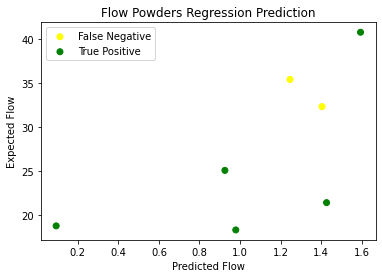

R:  65.7816 %  R^2:  43.2722 %


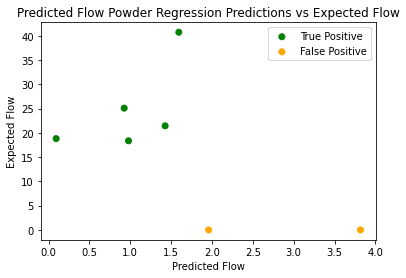

R:  -53.3802 %  R^2:  28.4944 %


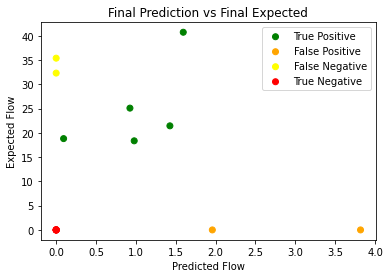

R:  0.0794 %  R^2:  0.0001 %


[21.5561, 43.2722, 28.4944, 0.0001]

In [21]:
trymodel(median, median, mean)

In [19]:
median = median.astype(float)
flowmed = median[median["Flow Class"] == 1]
noflowmed = median[median["Flow Class"] == 0]

In [22]:
for i in flowmed:
    print("\n\n", i)
    print("Flow     mean: ", flowmed[i].mean(), "   median: ", flowmed[i].median(), "  std: ", flowmed[i].std())
    print("No Flow     mean: ", noflowmed[i].mean(), "   median: ", noflowmed[i].median(), "  std: ", noflowmed[i].std())



 Da
Flow     mean:  30.712999999999997    median:  31.8835   std:  6.817200323446568
No Flow     mean:  16.839    median:  17.139   std:  1.9968963060566907


 Dp
Flow     mean:  35.20357142857143    median:  36.3465   std:  8.260146020846985
No Flow     mean:  19.2413125    median:  19.726   std:  2.201818695298113


 FWidth
Flow     mean:  28.422071428571428    median:  29.9595   std:  5.681627836196912
No Flow     mean:  15.662999999999998    median:  15.594249999999999   std:  1.9957847543546088


 FLength
Flow     mean:  35.751000000000005    median:  36.139   std:  8.283009844454693
No Flow     mean:  20.24725    median:  20.43275   std:  2.227243812428267


 ELength
Flow     mean:  34.152142857142856    median:  34.6   std:  8.09287031237108
No Flow     mean:  19.016875    median:  19.243000000000002   std:  2.222778325011934


 EWidth
Flow     mean:  27.445285714285713    median:  28.852   std:  5.4171368041394246
No Flow     mean:  15.0799375    median:  14.930250000000001  

In [23]:
mean

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
1824   34.8608  41.2800  32.1342  42.3065  40.6480  31.0605  42227.3523   
11465  19.9521  24.0019  17.4026  26.3070  25.1213  16.5875   9587.0063   
947    20.6719  23.7186  19.4825  24.4259  23.1557  18.8973  10540.2241   
7062   19.4502  22.5109  18.2251  23.3357  22.0971  17.6177   9598.9267   
5740   19.0254  22.6628  17.3387  23.9394  22.7301  16.6124  11134.1670   
878    22.8489  26.7397  21.0478  27.8028  26.5105  20.3305  19829.3279   
570    30.4551  35.5357  27.9433  36.8311  35.3678  27.0490  26326.7979   
1130   23.4824  27.5710  21.6577  28.6577  27.3345  20.9246  18465.7069   
2962   24.9139  28.9446  23.3078  29.7527  28.3908  22.5548  19908.0683   
3512   35.1262  41.3762  32.1347  42.8037  41.1789  31.0307  36300.0960   
4407   19.7542  23.2662  18.2025  24.3728  23.1154  17.5070  12517.6702   
5013   26.7035  31.1492  24.9595  31.8664  30.4730  24.1768  25193.8243   
3100   32.4929  38.3251  30.0815  39.2555  37.6721  29.0959  35686.2571   
497    37.2380  44.2624  33.8849  45.7631  44.0942  32.7296  45365.5634   
4909   16.3996  19.1506  15.2834  20.0577  18.8786  14.7104   5939.7081   

            Area  Perimeter  CHull  Area  ...  Curvature  Surface Area  \
1824   1237.8943   129.6848    1333.8333  ...     0.0154     4951.5773   
11465   411.1516    75.4041     448.5799  ...     0.0338     1644.6064   
947     452.1957    74.5141     483.1922  ...     0.0398     1808.7827   
7062    415.4385    70.7200     447.0445  ...     0.0380     1661.7542   
5740    431.6499    71.1972     471.9991  ...     0.0397     1726.5995   
878     629.5481    84.0053     678.1732  ...     0.0336     2518.1923   
570     894.6295   111.6388     958.7166  ...     0.0130     3578.5181   
1130    638.0280    86.6170     689.3381  ...     0.0291     2552.1120   
2962    675.2391    90.9322     725.5011  ...     0.0299     2700.9563   
3512   1149.9677   129.9872    1235.5878  ...     0.0136     4599.8708   
4407    470.2011    73.0929     509.5040  ...     0.0393     1880.8044   
5013    806.6309    97.8582     866.7988  ...     0.0288     3226.5238   
3100   1085.8506   120.4019    1169.7944  ...     0.0226     4343.4024   
497    1342.0420   139.0543    1446.3593  ...     0.0186     5368.1679   
4909    300.4077    60.1633     325.9971  ...     0.0498     1201.6307   

       L/W Ratio  W/L Aspect Ratio  CHull Surface Area  Ellipticity  \
1824      1.3045            0.7909           5335.3334       1.2913   
11465     1.5523            0.6798           1794.3198       1.5616   
947       1.2955            0.7981           1932.7686       1.2650   
7062      1.3116            0.7877           1788.1782       1.2813   
5740      1.4053            0.7411           1887.9964       1.3856   
878       1.3323            0.7738           2712.6927       1.3036   
570       1.3165            0.7851           3834.8663       1.3060   
1130      1.3255            0.7818           2757.3522       1.2983   
2962      1.2887            0.8006           2902.0045       1.2651   
3512      1.3356            0.7747           4942.3512       1.3335   
4407      1.3698            0.7572           2038.0160       1.3437   
5013      1.2706            0.8092           3467.1952       1.2437   
3100      1.2913            0.8004           4679.1777       1.2756   
497       1.3691            0.7568           5785.4373       1.3662   
4909      1.3472            0.7676           1303.9882       1.3113   

       Fiber Length  Fiber Width       Flow  Flow Class  
1824        23.9439      10.3599  18.363333         1.0  
11465       12.6761       5.3043   0.000000         0.0  
947          7.6743       3.3476   0.000000         0.0  
7062         8.3277       3.4981   0.000000         0.0  
5740        11.3097       4.4066   0.000000         0.0  
878         12.3448       5.2006   0.000000         0.0  
570         16.6835       7.5188  32.326667         1.0  
1130        13.4030      

In [55]:
smean = mean.sort_values("Flow")
smean

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
11465  19.9521  24.0019  17.4026  26.3070  25.1213  16.5875   9587.0063   
947    20.6719  23.7186  19.4825  24.4259  23.1557  18.8973  10540.2241   
7062   19.4502  22.5109  18.2251  23.3357  22.0971  17.6177   9598.9267   
5740   19.0254  22.6628  17.3387  23.9394  22.7301  16.6124  11134.1670   
878    22.8489  26.7397  21.0478  27.8028  26.5105  20.3305  19829.3279   
1130   23.4824  27.5710  21.6577  28.6577  27.3345  20.9246  18465.7069   
4407   19.7542  23.2662  18.2025  24.3728  23.1154  17.5070  12517.6702   
4909   16.3996  19.1506  15.2834  20.0577  18.8786  14.7104   5939.7081   
1824   34.8608  41.2800  32.1342  42.3065  40.6480  31.0605  42227.3523   
497    37.2380  44.2624  33.8849  45.7631  44.0942  32.7296  45365.5634   
3100   32.4929  38.3251  30.0815  39.2555  37.6721  29.0959  35686.2571   
3512   35.1262  41.3762  32.1347  42.8037  41.1789  31.0307  36300.0960   
570    30.4551  35.5357  27.9433  36.8311  35.3678  27.0490  26326.7979   
2962   24.9139  28.9446  23.3078  29.7527  28.3908  22.5548  19908.0683   
5013   26.7035  31.1492  24.9595  31.8664  30.4730  24.1768  25193.8243   

            Area  Perimeter  CHull  Area  ...  Curvature  Surface Area  \
11465   411.1516    75.4041     448.5799  ...     0.0338     1644.6064   
947     452.1957    74.5141     483.1922  ...     0.0398     1808.7827   
7062    415.4385    70.7200     447.0445  ...     0.0380     1661.7542   
5740    431.6499    71.1972     471.9991  ...     0.0397     1726.5995   
878     629.5481    84.0053     678.1732  ...     0.0336     2518.1923   
1130    638.0280    86.6170     689.3381  ...     0.0291     2552.1120   
4407    470.2011    73.0929     509.5040  ...     0.0393     1880.8044   
4909    300.4077    60.1633     325.9971  ...     0.0498     1201.6307   
1824   1237.8943   129.6848    1333.8333  ...     0.0154     4951.5773   
497    1342.0420   139.0543    1446.3593  ...     0.0186     5368.1679   
3100   1085.8506   120.4019    1169.7944  ...     0.0226     4343.4024   
3512   1149.9677   129.9872    1235.5878  ...     0.0136     4599.8708   
570     894.6295   111.6388     958.7166  ...     0.0130     3578.5181   
2962    675.2391    90.9322     725.5011  ...     0.0299     2700.9563   
5013    806.6309    97.8582     866.7988  ...     0.0288     3226.5238   

       L/W Ratio  W/L Aspect Ratio  CHull Surface Area  Ellipticity  \
11465     1.5523            0.6798           1794.3198       1.5616   
947       1.2955            0.7981           1932.7686       1.2650   
7062      1.3116            0.7877           1788.1782       1.2813   
5740      1.4053            0.7411           1887.9964       1.3856   
878       1.3323            0.7738           2712.6927       1.3036   
1130      1.3255            0.7818           2757.3522       1.2983   
4407      1.3698            0.7572           2038.0160       1.3437   
4909      1.3472            0.7676           1303.9882       1.3113   
1824      1.3045            0.7909           5335.3334       1.2913   
497       1.3691            0.7568           5785.4373       1.3662   
3100      1.2913            0.8004           4679.1777       1.2756   
3512      1.3356            0.7747           4942.3512       1.3335   
570       1.3165            0.7851           3834.8663       1.3060   
2962      1.2887            0.8006           2902.0045       1.2651   
5013      1.2706            0.8092           3467.1952       1.2437   

       Fiber Length  Fiber Width       Flow  Flow Class  
11465       12.6761       5.3043   0.000000         0.0  
947          7.6743       3.3476   0.000000         0.0  
7062         8.3277       3.4981   0.000000         0.0  
5740        11.3097       4.4066   0.000000         0.0  
878         12.3448       5.2006   0.000000         0.0  
1130        13.4030       5.5511   0.000000         0.0  
4407        11.0446       4.5804   0.000000         0.0  
4909         7.3815      

In [58]:
sflow = smean[smean["Flow Class"] == 1]
snoflow = smean[smean["Flow Class"] == 0]
snoflow = snoflow.sort_values("Da", ascending = False)
smean = pd.concat([sflow, snoflow])
smean

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
1824   34.8608  41.2800  32.1342  42.3065  40.6480  31.0605  42227.3523   
497    37.2380  44.2624  33.8849  45.7631  44.0942  32.7296  45365.5634   
3100   32.4929  38.3251  30.0815  39.2555  37.6721  29.0959  35686.2571   
3512   35.1262  41.3762  32.1347  42.8037  41.1789  31.0307  36300.0960   
570    30.4551  35.5357  27.9433  36.8311  35.3678  27.0490  26326.7979   
2962   24.9139  28.9446  23.3078  29.7527  28.3908  22.5548  19908.0683   
5013   26.7035  31.1492  24.9595  31.8664  30.4730  24.1768  25193.8243   
1130   23.4824  27.5710  21.6577  28.6577  27.3345  20.9246  18465.7069   
878    22.8489  26.7397  21.0478  27.8028  26.5105  20.3305  19829.3279   
947    20.6719  23.7186  19.4825  24.4259  23.1557  18.8973  10540.2241   
11465  19.9521  24.0019  17.4026  26.3070  25.1213  16.5875   9587.0063   
4407   19.7542  23.2662  18.2025  24.3728  23.1154  17.5070  12517.6702   
7062   19.4502  22.5109  18.2251  23.3357  22.0971  17.6177   9598.9267   
5740   19.0254  22.6628  17.3387  23.9394  22.7301  16.6124  11134.1670   
4909   16.3996  19.1506  15.2834  20.0577  18.8786  14.7104   5939.7081   

            Area  Perimeter  CHull  Area  ...  Curvature  Surface Area  \
1824   1237.8943   129.6848    1333.8333  ...     0.0154     4951.5773   
497    1342.0420   139.0543    1446.3593  ...     0.0186     5368.1679   
3100   1085.8506   120.4019    1169.7944  ...     0.0226     4343.4024   
3512   1149.9677   129.9872    1235.5878  ...     0.0136     4599.8708   
570     894.6295   111.6388     958.7166  ...     0.0130     3578.5181   
2962    675.2391    90.9322     725.5011  ...     0.0299     2700.9563   
5013    806.6309    97.8582     866.7988  ...     0.0288     3226.5238   
1130    638.0280    86.6170     689.3381  ...     0.0291     2552.1120   
878     629.5481    84.0053     678.1732  ...     0.0336     2518.1923   
947     452.1957    74.5141     483.1922  ...     0.0398     1808.7827   
11465   411.1516    75.4041     448.5799  ...     0.0338     1644.6064   
4407    470.2011    73.0929     509.5040  ...     0.0393     1880.8044   
7062    415.4385    70.7200     447.0445  ...     0.0380     1661.7542   
5740    431.6499    71.1972     471.9991  ...     0.0397     1726.5995   
4909    300.4077    60.1633     325.9971  ...     0.0498     1201.6307   

       L/W Ratio  W/L Aspect Ratio  CHull Surface Area  Ellipticity  \
1824      1.3045            0.7909           5335.3334       1.2913   
497       1.3691            0.7568           5785.4373       1.3662   
3100      1.2913            0.8004           4679.1777       1.2756   
3512      1.3356            0.7747           4942.3512       1.3335   
570       1.3165            0.7851           3834.8663       1.3060   
2962      1.2887            0.8006           2902.0045       1.2651   
5013      1.2706            0.8092           3467.1952       1.2437   
1130      1.3255            0.7818           2757.3522       1.2983   
878       1.3323            0.7738           2712.6927       1.3036   
947       1.2955            0.7981           1932.7686       1.2650   
11465     1.5523            0.6798           1794.3198       1.5616   
4407      1.3698            0.7572           2038.0160       1.3437   
7062      1.3116            0.7877           1788.1782       1.2813   
5740      1.4053            0.7411           1887.9964       1.3856   
4909      1.3472            0.7676           1303.9882       1.3113   

       Fiber Length  Fiber Width       Flow  Flow Class  
1824        23.9439      10.3599  18.363333         1.0  
497         26.6235      11.6877  18.820000         1.0  
3100        21.5994       9.3277  21.453333         1.0  
3512        22.1886       9.8035  25.103333         1.0  
570         16.6835       7.5188  32.326667         1.0  
2962        12.7256       5.4991  35.400000         1.0  
5013        15.3335       6.6223  40.743333         1.0  
1130        13.4030      

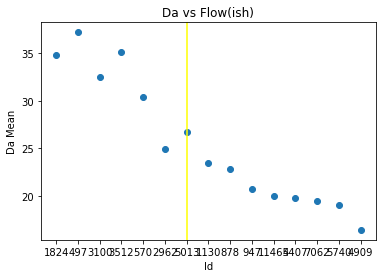

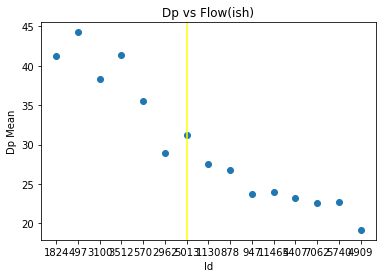

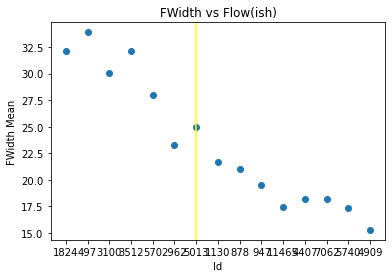

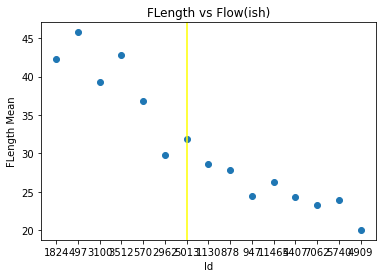

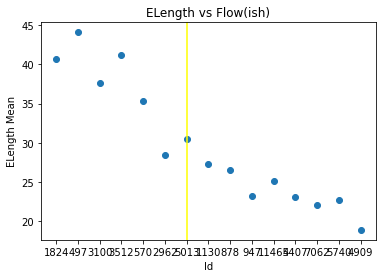

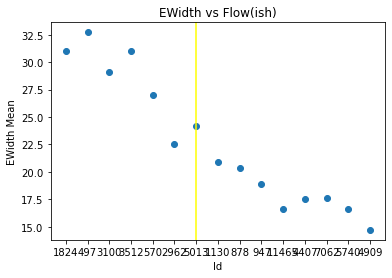

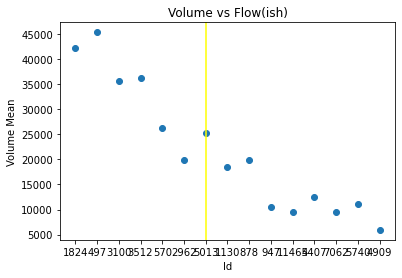

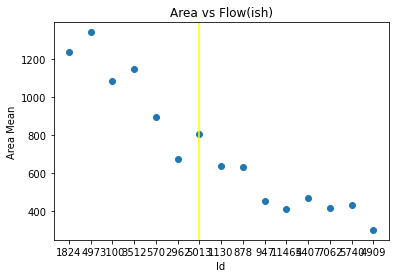

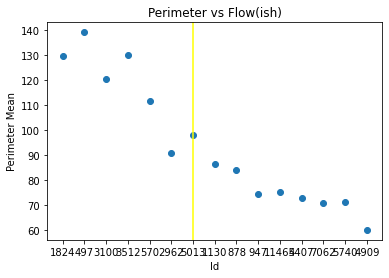

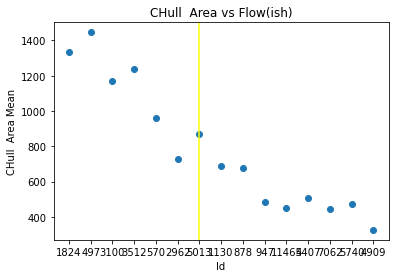

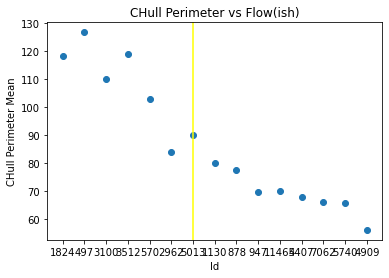

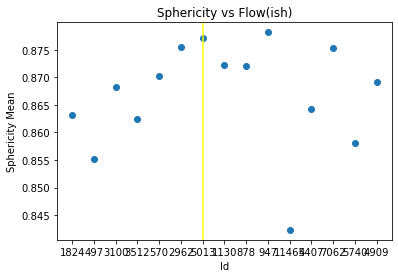

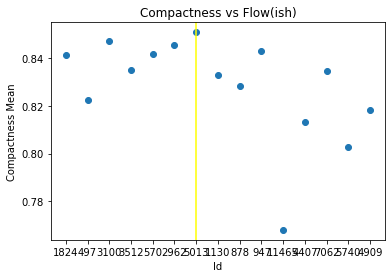

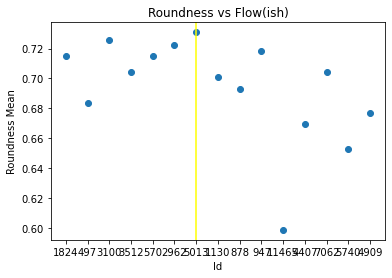

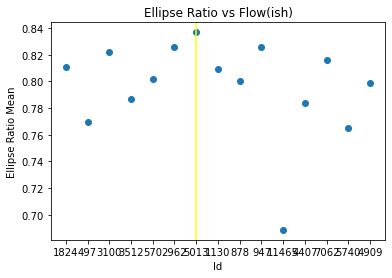

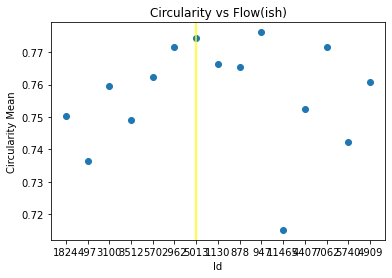

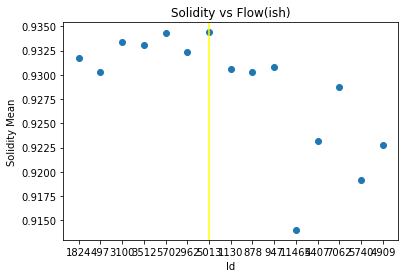

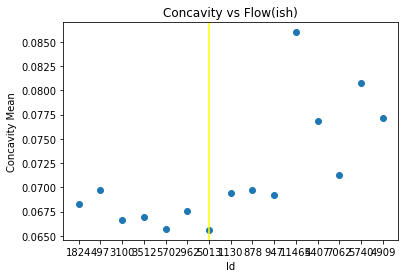

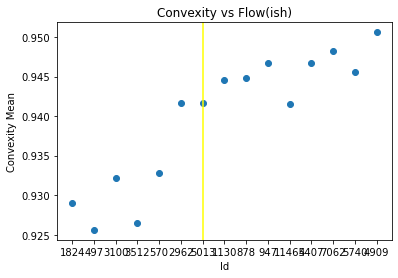

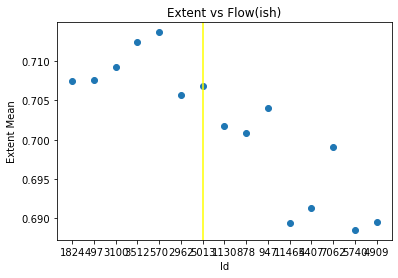

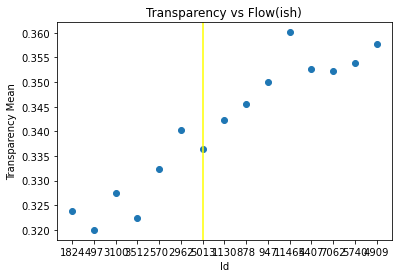

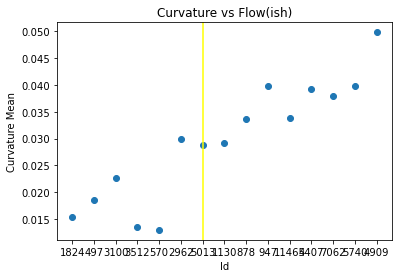

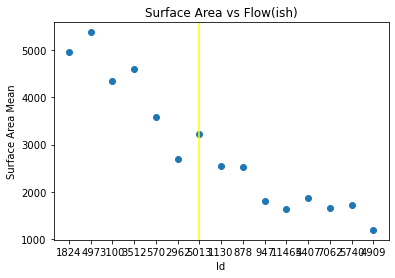

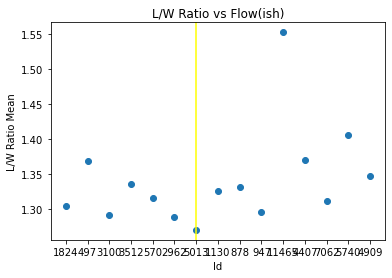

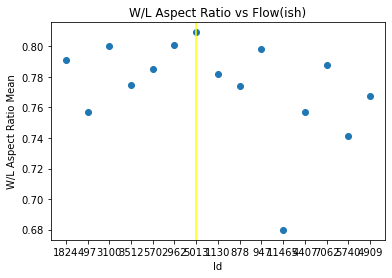

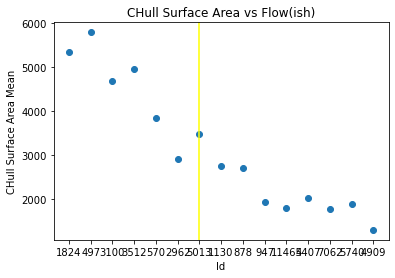

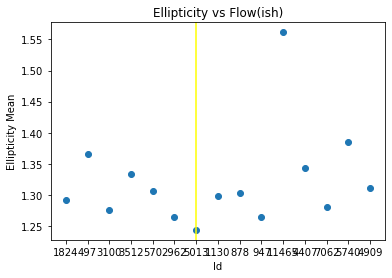

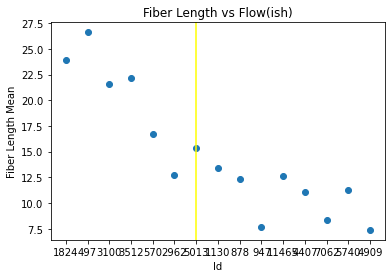

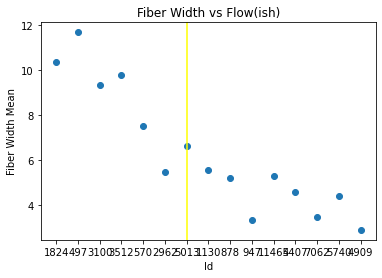

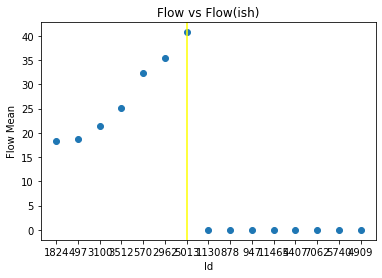

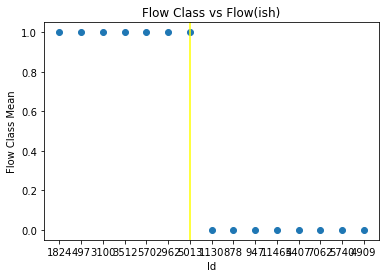

In [59]:
for i in smean:
    #smean[i].scatter()
    plt.scatter(smean.index.astype(str), smean[i])
    #plt.legend()
    plt.xlabel("Id")
    plt.ylabel(i + " Mean")
    plt.axvline(x="5013", color = "yellow")
    plt.title(i + " vs Flow(ish)")
    plt.show()

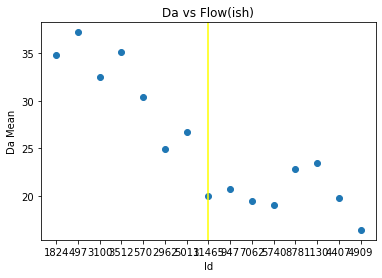

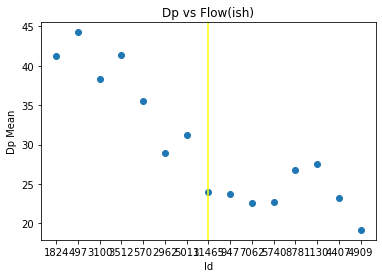

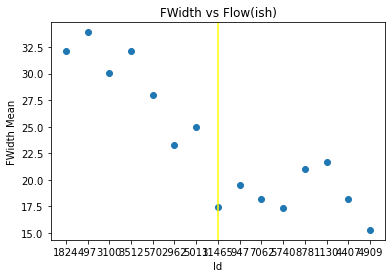

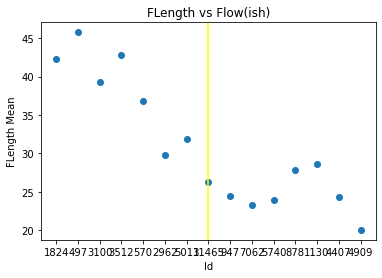

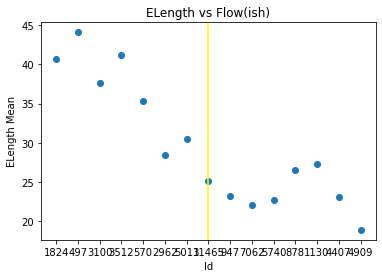

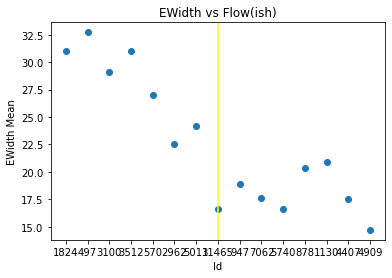

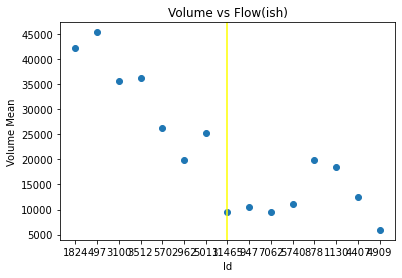

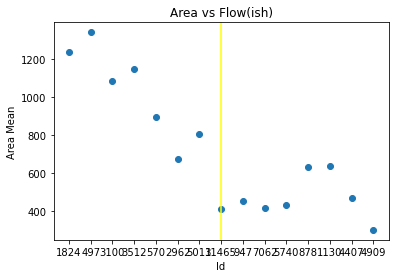

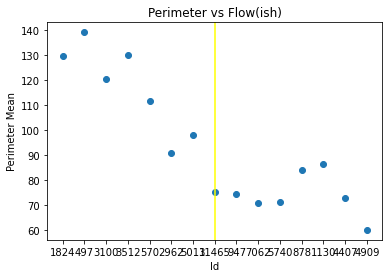

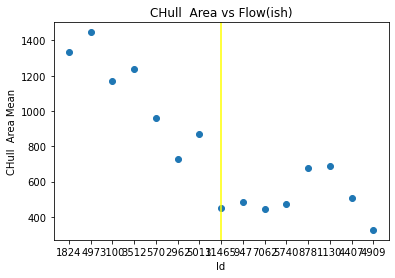

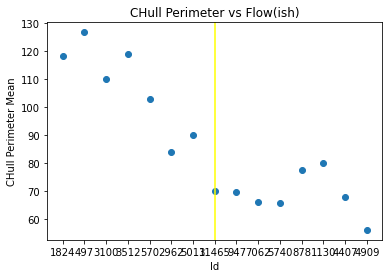

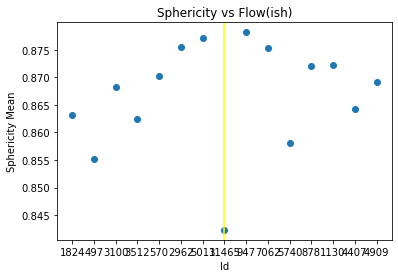

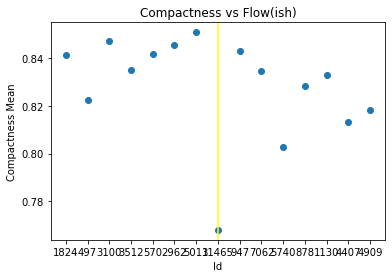

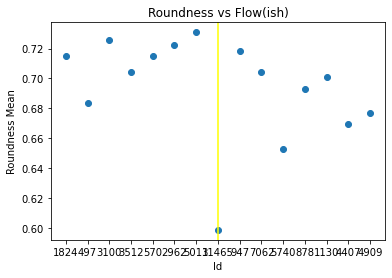

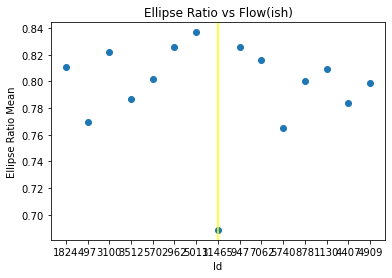

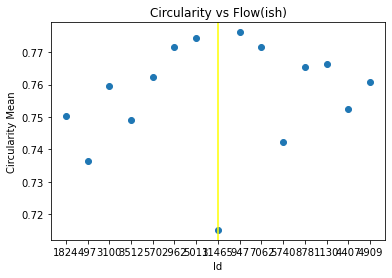

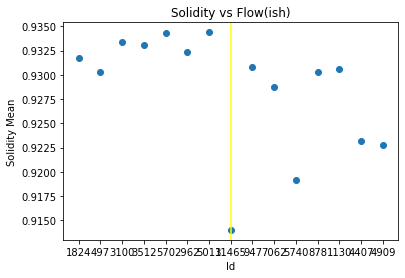

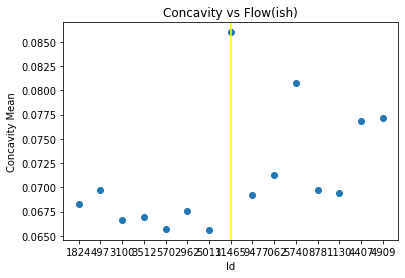

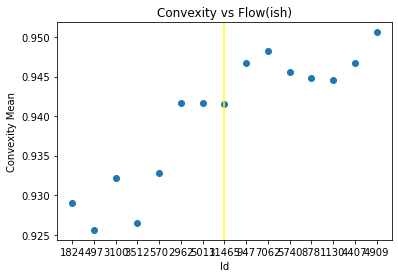

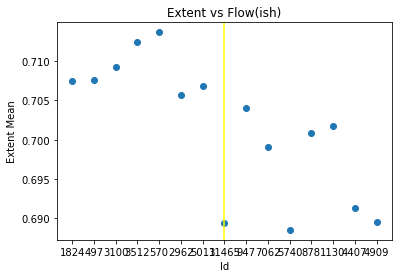

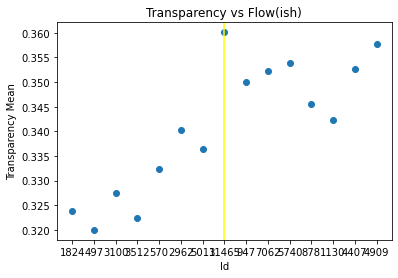

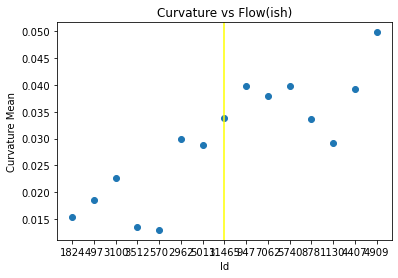

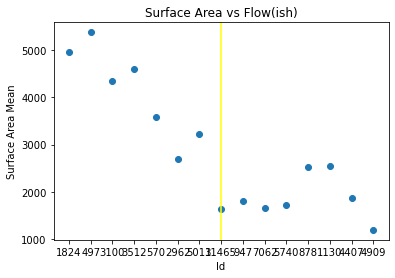

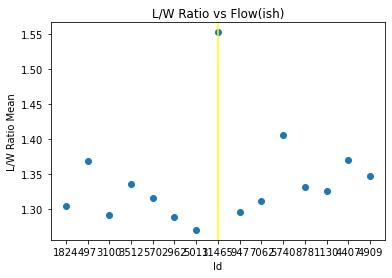

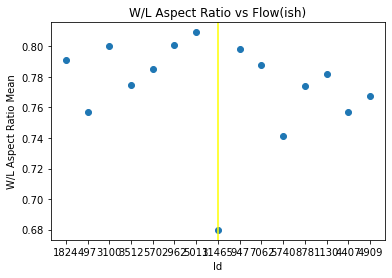

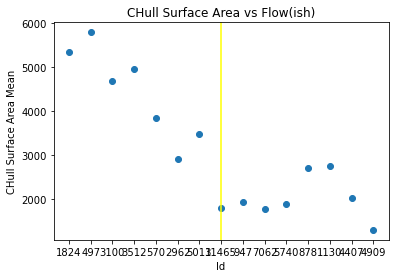

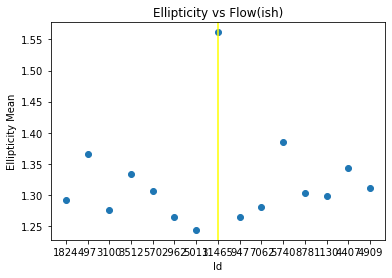

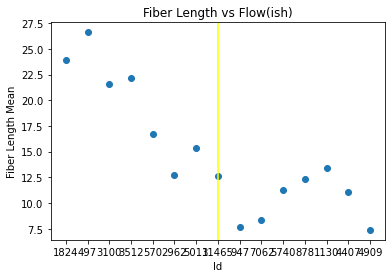

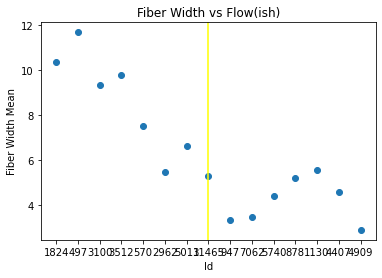

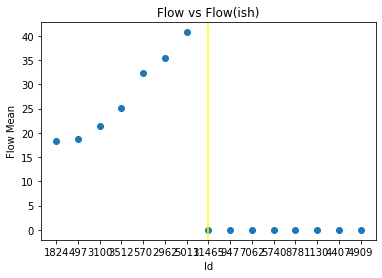

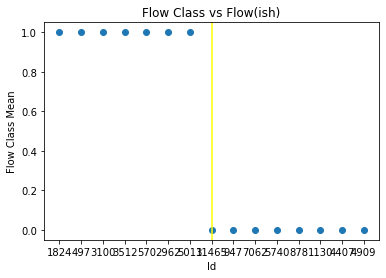

In [57]:
for i in smean:
    #smean[i].scatter()
    plt.scatter(smean.index.astype(str), smean[i])
    #plt.legend()
    plt.xlabel("Id")
    plt.ylabel(i + " Mean")
    plt.axvline(x="11465", color = "yellow")
    plt.title(i + " vs Flow(ish)")
    plt.show()

In [ ]:
arr = []
for i in flowmed:
    arr.append

1/1 [==============================] - 0s 1ms/step - loss: 85679880147646225415503620492754944.0000
Epoch 1/10
1/1 [==============================] - 0s 999us/step - loss: 1.2641
Epoch 2/10
1/1 [==============================] - 0s 997us/step - loss: 0.9116
Epoch 3/10
1/1 [==============================] - 0s 994us/step - loss: 0.7122
Epoch 4/10
1/1 [==============================] - 0s 996us/step - loss: 0.5919
Epoch 5/10
1/1 [==============================] - 0s 996us/step - loss: 0.4883
Epoch 6/10
1/1 [==============================] - 0s 995us/step - loss: 0.3898
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 8/10
1/1 [==============================] - 0s 0s/step - loss: 0.2494
Epoch 9/10
1/1 [==============================] - 0s 995us/step - loss: 0.2235
Epoch 10/10
1/1 [==============================] - 0s 999us/step - loss: 54296540347312335867664448517832704.0000
Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 810.3539
E

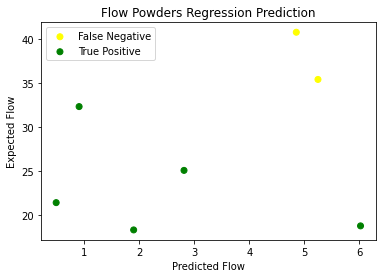

R:  27.2466 %  R^2:  7.4238 %


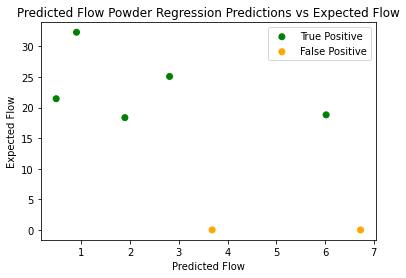

R:  -64.72 %  R^2:  41.8867 %


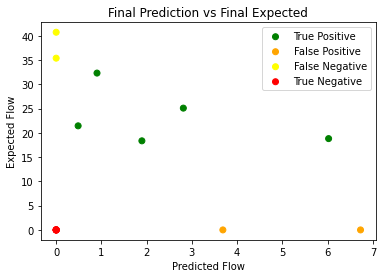

R:  -6.1782 %  R^2:  0.3817 %


[21.5561, 7.4238, 41.8867, 0.3817]

In [23]:
trymodel(median, flowmed, mean)

1/1 [==============================] - 0s 1ms/step - loss: 391233737097838211954526013571989504.0000
Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 0.9367
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 0.7338
Epoch 3/10
1/1 [==============================] - 0s 944us/step - loss: 0.5667
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.4346
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.3372
Epoch 6/10
1/1 [==============================] - 0s 998us/step - loss: 0.2692
Epoch 7/10
1/1 [==============================] - 0s 998us/step - loss: 0.2292
Epoch 8/10
1/1 [==============================] - 0s 995us/step - loss: 0.2127
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.2118
Epoch 10/10
1/1 [==============================] - 0s 994us/step - loss: 82614220675559123995137931281956864.0000
Epoch 1/10
1/1 [==============================] - 0s 999us/step - loss: 398.7101
Epo

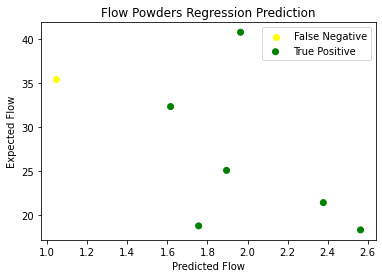

R:  -56.7264 %  R^2:  32.1788 %


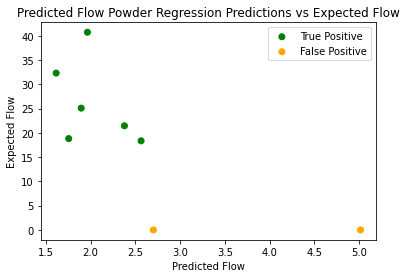

R:  -72.5107 %  R^2:  52.5781 %


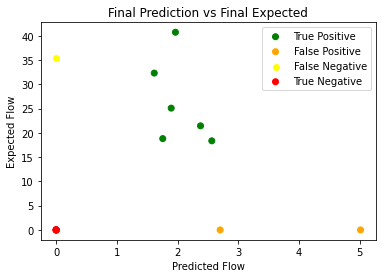

R:  17.4927 %  R^2:  3.0599 %


[36.8622, 32.1788, 52.5781, 3.0599]

In [20]:
trymodel(median, median, median)

4511/4511 [==============================] - 2s 447us/step - loss: nan
Epoch 1/10
4511/4511 [==============================] - 2s 467us/step - loss: 0.1982
Epoch 2/10
4511/4511 [==============================] - 2s 451us/step - loss: 0.1911
Epoch 3/10
4511/4511 [==============================] - 2s 432us/step - loss: 0.1885
Epoch 4/10
4511/4511 [==============================] - 2s 432us/step - loss: 0.1875
Epoch 5/10
4511/4511 [==============================] - 2s 433us/step - loss: 0.1871
Epoch 6/10
4511/4511 [==============================] - 2s 430us/step - loss: 0.1870
Epoch 7/10
4511/4511 [==============================] - 2s 434us/step - loss: 0.1867
Epoch 8/10
4511/4511 [==============================] - 2s 434us/step - loss: 0.1868
Epoch 9/10
4511/4511 [==============================] - 2s 463us/step - loss: 0.1866
Epoch 10/10
1408/1408 [==============================] - 1s 440us/step - loss: nan      
Epoch 1/10
1408/1408 [==============================] - 1s 452us/step - los

C:\Users\eadel\Documents\DDMSTools\flowability_data_upload\Research\main.py:172: RuntimeWarning: invalid value encountered in longlong_scalars
  print("Flow Predictions: ", (tp / (tp + fp)) * 100, "% Correct")
C:\Users\eadel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\eadel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


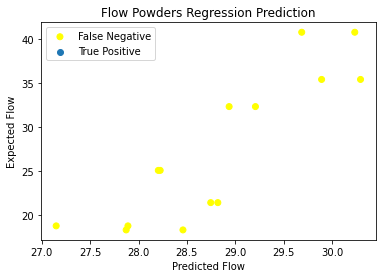

R:  87.3042 %  R^2:  76.2203 %


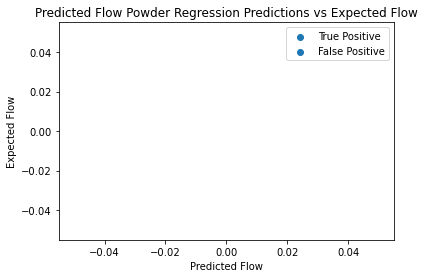

R:  nan %  R^2:  nan %


C:\Users\eadel\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\eadel\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\eadel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\eadel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\eadel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


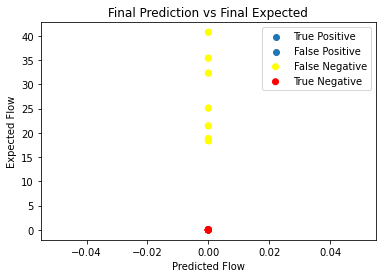

R:  nan %  R^2:  nan %


[nan, 76.2203, nan, nan]

In [16]:
trymodel(data, flow, pd.concat([mean, median]))

In [ ]:
for i in d.noflowpowders:
    for i in d.datalist:
        plist.append(i.sample(n=2842))
    df = pd.concat(plist)
    df = df.sample(frac=1)
    flowdf = df[df["Flow Class"] == 1]
    results = []
    lst = d.noflowpowders.copy()
    lst.remove(i)
    df = pd.concat(lst)
    results.append(trymodel(df, ))

In [19]:
test = pd.concat([mean, median])

1333/1333 [==============================] - 1s 445us/step - loss: nan          
Epoch 1/10
1333/1333 [==============================] - 1s 471us/step - loss: 0.2401
Epoch 2/10
1333/1333 [==============================] - 1s 508us/step - loss: 0.2243
Epoch 3/10
1333/1333 [==============================] - 1s 534us/step - loss: 0.2231
Epoch 4/10
1333/1333 [==============================] - 1s 453us/step - loss: 0.2214
Epoch 5/10
1333/1333 [==============================] - 1s 447us/step - loss: 0.2205
Epoch 6/10
1333/1333 [==============================] - 1s 467us/step - loss: 0.2187
Epoch 7/10
1333/1333 [==============================] - 1s 457us/step - loss: 0.2185
Epoch 8/10
1333/1333 [==============================] - 1s 440us/step - loss: 0.2176
Epoch 9/10
1333/1333 [==============================] - 1s 443us/step - loss: 0.2171
Epoch 10/10
622/622 [==============================] - 0s 442us/step - loss: nan                     
Epoch 1/10
622/622 [==============================] 

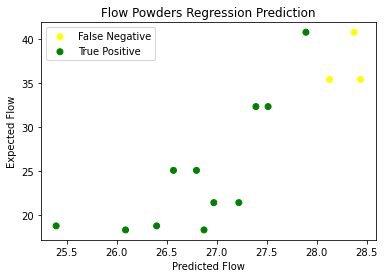

R:  86.2167 %  R^2:  74.3332 %


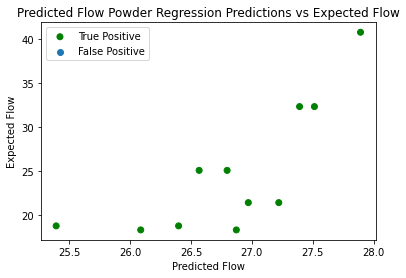

R:  77.217 %  R^2:  59.6247 %


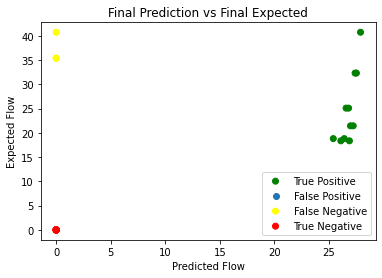

R:  62.4065 %  R^2:  38.9457 %


In [22]:
plist = []
for i in d.datalist:
    plist.append(i.sample(n=2842))
df = pd.concat(plist)
df = df.sample(frac=1)
flowdf = df[df["Flow Class"] == 1]
results = []
results.append(trymodel(df, flowdf, test))

powder dropped: 1824
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 929us/step - loss: 0.2333
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2213
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2206A: 0s - loss:
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2186
Epoch 5/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2177
Epoch 6/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2169A: 1s - los
Epoch 7/10
1244/1244 [==============================] - 1s 842us/step - loss: 0.2167
Epoch 8/10
1244/1244 [==============================] - 1s 922us/step - loss: 0.2162
Epoch 9/10
1244/1244 [==============================] - 1s 912us/step - loss: 0.2153
Epoch 10/10
533/533 [==============================] - 0s 910us/step - loss: nan            
Epoch 1/10
533/533 [==================

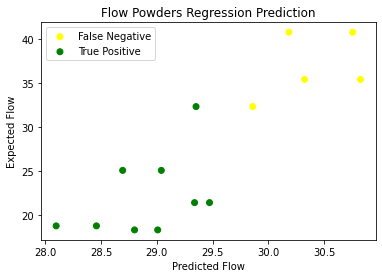

R:  86.4038 %  R^2:  74.6561 %


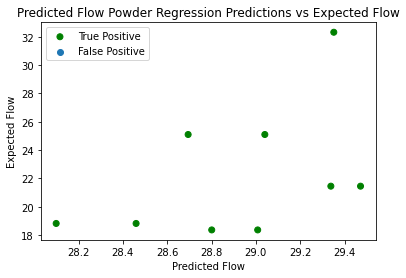

R:  46.2836 %  R^2:  21.4217 %


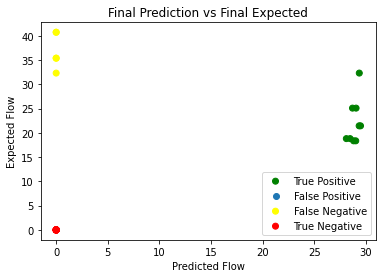

R:  41.701 %  R^2:  17.3897 %
powder dropped: 11465
1244/1244 [==============================] - 1s 997us/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 936us/step - loss: 0.2408
Epoch 2/10
1244/1244 [==============================] - 1s 878us/step - loss: 0.2285
Epoch 3/10
1244/1244 [==============================] - 1s 905us/step - loss: 0.2284
Epoch 4/10
1244/1244 [==============================] - 1s 928us/step - loss: 0.2251
Epoch 5/10
1244/1244 [==============================] - 1s 952us/step - loss: 0.2248
Epoch 6/10
1244/1244 [==============================] - 1s 942us/step - loss: 0.2230
Epoch 7/10
1244/1244 [==============================] - 1s 950us/step - loss: 0.2226
Epoch 8/10
1244/1244 [==============================] - 1s 926us/step - loss: 0.2217
Epoch 9/10
1244/1244 [==============================] - 1s 934us/step - loss: 0.2212 0s - loss
Epoch 10/10
622/622 [==============================] - 1s 966us/step - loss: nan         
Epoch 1/10
6

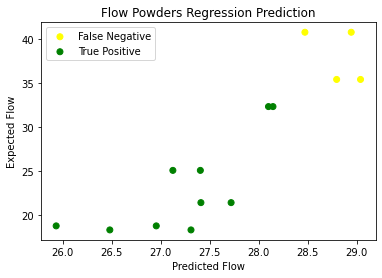

R:  88.2513 %  R^2:  77.8829 %


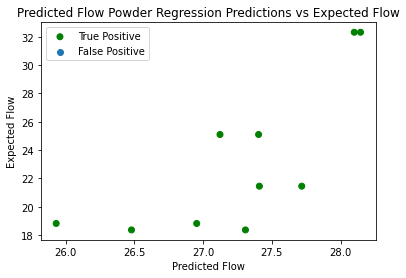

R:  75.8422 %  R^2:  57.5204 %


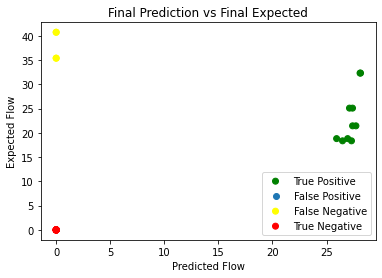

R:  50.1743 %  R^2:  25.1746 %
powder dropped: 947
1244/1244 [==============================] - 1s 989us/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 986us/step - loss: 0.2338
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2244
Epoch 3/10
1244/1244 [==============================] - 1s 949us/step - loss: 0.2227
Epoch 4/10
1244/1244 [==============================] - 1s 929us/step - loss: 0.2207 0s - lo
Epoch 5/10
1244/1244 [==============================] - 1s 934us/step - loss: 0.2187
Epoch 6/10
1244/1244 [==============================] - 1s 954us/step - loss: 0.2191
Epoch 7/10
1244/1244 [==============================] - 1s 976us/step - loss: 0.2183 0s - loss
Epoch 8/10
1244/1244 [==============================] - 1s 984us/step - loss: 0.2169 0s - loss: 
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2167A: 0s - loss: 0.217 - ETA: 0s - l
Epoch 10/10
622/622 [==============================] -

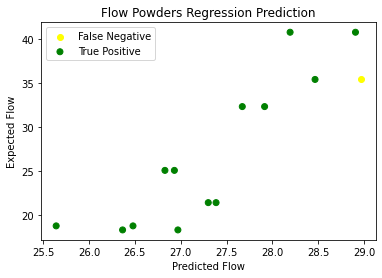

R:  88.0526 %  R^2:  77.5326 %


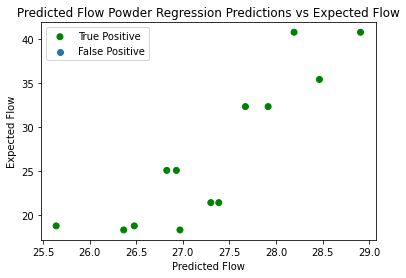

R:  88.2221 %  R^2:  77.8314 %


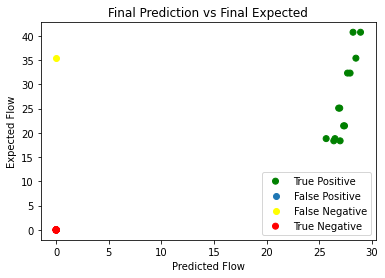

R:  84.313 %  R^2:  71.0868 %
powder dropped: 7062
1244/1244 [==============================] - 1s 967us/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 899us/step - loss: 0.2323
Epoch 2/10
1244/1244 [==============================] - 1s 891us/step - loss: 0.2241
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2236
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2211
Epoch 5/10
1244/1244 [==============================] - 1s 974us/step - loss: 0.2198
Epoch 6/10
1244/1244 [==============================] - 1s 968us/step - loss: 0.2198
Epoch 7/10
1244/1244 [==============================] - 1s 999us/step - loss: 0.2187
Epoch 8/10
1244/1244 [==============================] - 1s 897us/step - loss: 0.2178
Epoch 9/10
1244/1244 [==============================] - 1s 885us/step - loss: 0.2175
Epoch 10/10
622/622 [==============================] - 1s 939us/step - loss: nan          
Epoch 1/10
622/622 [======

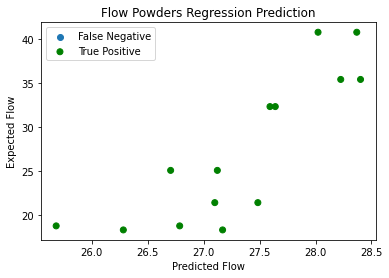

R:  84.0947 %  R^2:  70.7192 %


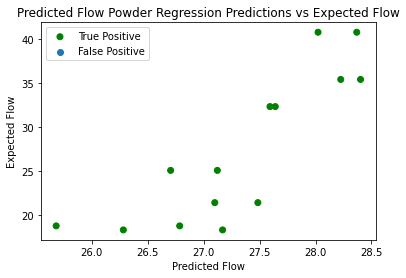

R:  84.0947 %  R^2:  70.7192 %


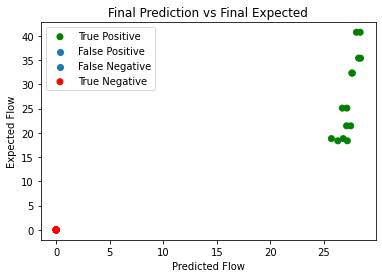

R:  93.8292 %  R^2:  88.0392 %
powder dropped: 5740
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 908us/step - loss: 0.2396
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2262
Epoch 3/10
1244/1244 [==============================] - 1s 963us/step - loss: 0.2257
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2235A: 0s 
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2224
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2221
Epoch 7/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2207
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2202
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2197
Epoch 10/10
622/622 [==============================] - 1s 978us/step - loss: nan        
Epoch 1/10
622/622 [=============

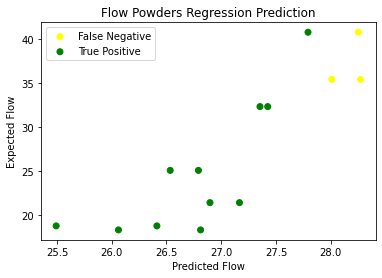

R:  86.9026 %  R^2:  75.5205 %


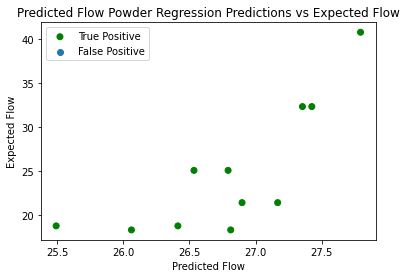

R:  78.2652 %  R^2:  61.2544 %


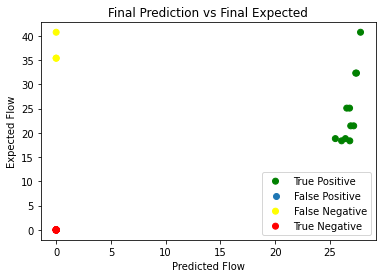

R:  62.3724 %  R^2:  38.9031 %
powder dropped: 878
1244/1244 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 954us/step - loss: 0.2319
Epoch 2/10
1244/1244 [==============================] - 1s 885us/step - loss: 0.2230
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2202
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2217
Epoch 5/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2192
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2182
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2177
Epoch 8/10
1244/1244 [==============================] - 1s 903us/step - loss: 0.2163
Epoch 9/10
1244/1244 [==============================] - 1s 998us/step - loss: 0.2159
Epoch 10/10
622/622 [==============================] - 1s 957us/step - loss: nan        
Epoch 1/10
622/622 [================

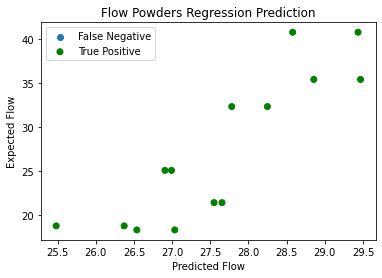

R:  87.2813 %  R^2:  76.1802 %


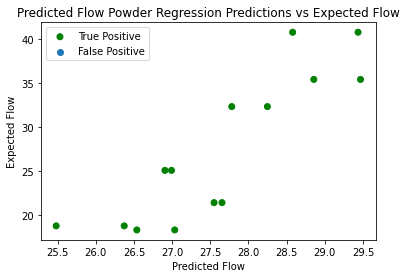

R:  87.2813 %  R^2:  76.1802 %


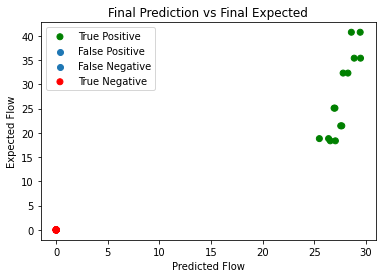

R:  94.378 %  R^2:  89.0721 %
powder dropped: 570
1244/1244 [==============================] - 1s 961us/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 924us/step - loss: 0.2264
Epoch 2/10
1244/1244 [==============================] - 1s 913us/step - loss: 0.2193
Epoch 3/10
1244/1244 [==============================] - 1s 978us/step - loss: 0.2172 0s
Epoch 4/10
1244/1244 [==============================] - 1s 924us/step - loss: 0.2169
Epoch 5/10
1244/1244 [==============================] - 1s 985us/step - loss: 0.2144
Epoch 6/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2140
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2139
Epoch 8/10
1244/1244 [==============================] - 1s 918us/step - loss: 0.2128
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2121
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan              
Epoch 1/10
533/533 [====

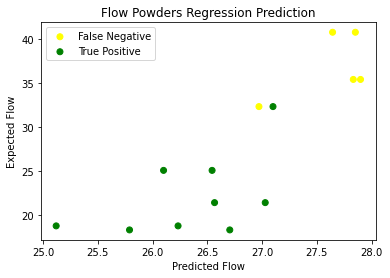

R:  83.2769 %  R^2:  69.3504 %


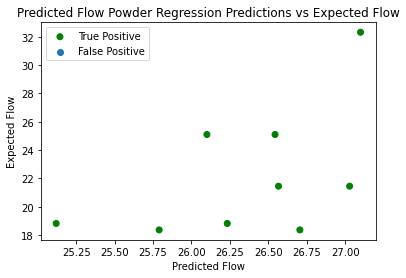

R:  51.9865 %  R^2:  27.026 %


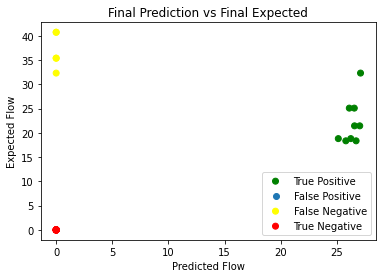

R:  41.7858 %  R^2:  17.4606 %
powder dropped: 1130
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2338A: 0s -
Epoch 2/10
1244/1244 [==============================] - 1s 950us/step - loss: 0.2209
Epoch 3/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2207
Epoch 4/10
1244/1244 [==============================] - ETA: 0s - loss: 0.219 - 2s 2ms/step - loss: 0.2192
Epoch 5/10
1244/1244 [==============================] - 1s 932us/step - loss: 0.2175
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2179A: 0
Epoch 7/10
1244/1244 [==============================] - 1s 982us/step - loss: 0.2164
Epoch 8/10
1244/1244 [==============================] - 1s 948us/step - loss: 0.2161
Epoch 9/10
1244/1244 [==============================] - 1s 976us/step - loss: 0.2149
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan         

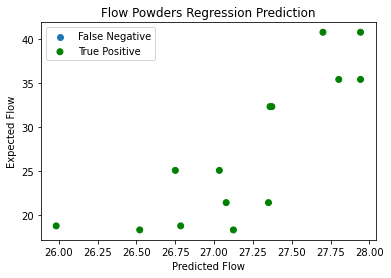

R:  82.349 %  R^2:  67.8136 %


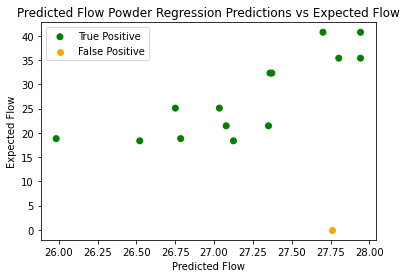

R:  42.983 %  R^2:  18.4754 %


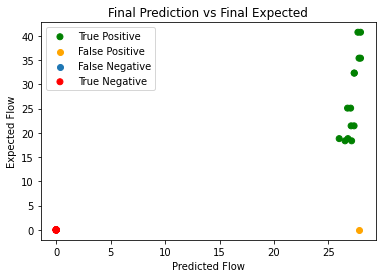

R:  87.2655 %  R^2:  76.1527 %
powder dropped: 2962
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 949us/step - loss: 0.2225
Epoch 2/10
1244/1244 [==============================] - 1s 904us/step - loss: 0.2151
Epoch 3/10
1244/1244 [==============================] - 1s 939us/step - loss: 0.2121
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2126
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2107
Epoch 6/10
1244/1244 [==============================] - 1s 877us/step - loss: 0.2101 0s - loss: 0.
Epoch 7/10
1244/1244 [==============================] - 1s 863us/step - loss: 0.2097
Epoch 8/10
1244/1244 [==============================] - 1s 936us/step - loss: 0.2087
Epoch 9/10
1244/1244 [==============================] - 1s 909us/step - loss: 0.2086
Epoch 10/10
533/533 [==============================] - 1s 992us/step - loss: nan             
Epoch 1/10

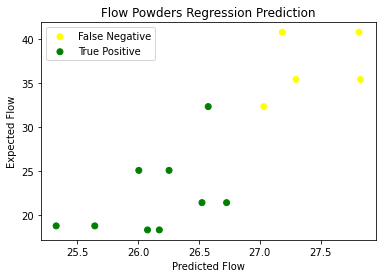

R:  85.3325 %  R^2:  72.8163 %


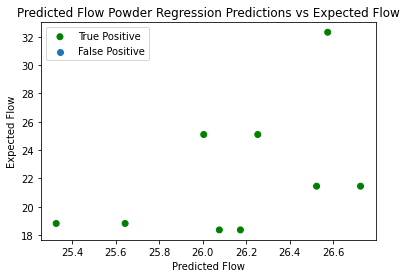

R:  48.7089 %  R^2:  23.7256 %


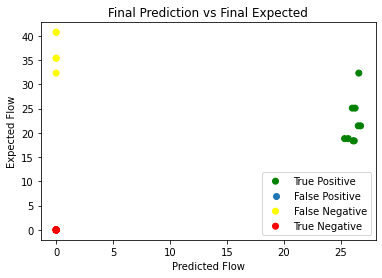

R:  41.7207 %  R^2:  17.4062 %
powder dropped: 3512
1244/1244 [==============================] - 1s 966us/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 993us/step - loss: 0.2335
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2215
Epoch 3/10
1244/1244 [==============================] - 1s 968us/step - loss: 0.2208 0s - loss: 
Epoch 4/10
1244/1244 [==============================] - 1s 992us/step - loss: 0.2192
Epoch 5/10
1244/1244 [==============================] - 1s 966us/step - loss: 0.2188
Epoch 6/10
1244/1244 [==============================] - 1s 977us/step - loss: 0.2184
Epoch 7/10
1244/1244 [==============================] - 1s 991us/step - loss: 0.2169
Epoch 8/10
1244/1244 [==============================] - 1s 972us/step - loss: 0.2164
Epoch 9/10
1244/1244 [==============================] - 1s 988us/step - loss: 0.2167 0s - lo - ETA: 0s - loss: 
Epoch 10/10
533/533 [==============================] - 1s 960us/step - loss

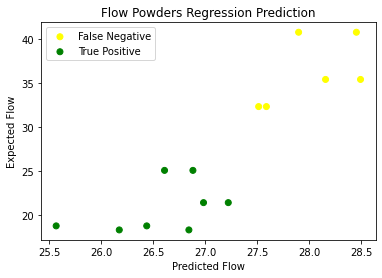

R:  87.9384 %  R^2:  77.3316 %


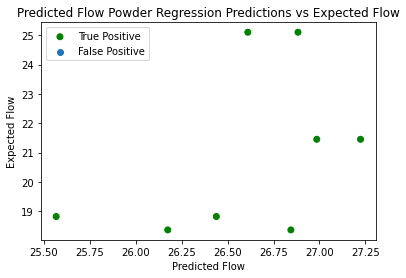

R:  44.7426 %  R^2:  20.019 %


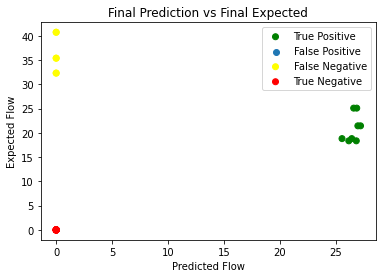

R:  33.215 %  R^2:  11.0324 %
powder dropped: 4407
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2506
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2254A: 0s 
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2241
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2223A: 0s - loss: 0.
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2218A: 0s - 
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2207
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2196A: 0s - l
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2190
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2182
Epoch 10/10
622/622 [==============================] - 1s 948us/step - loss: nan        
Epoch

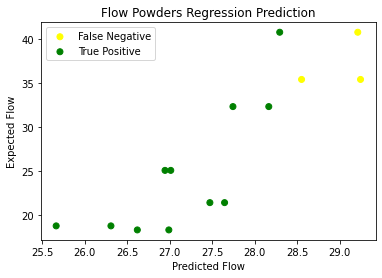

R:  86.6256 %  R^2:  75.0399 %


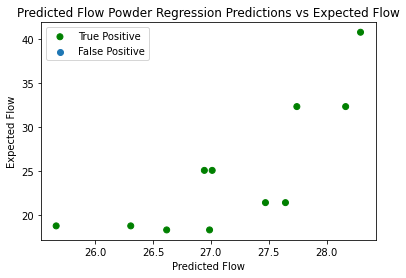

R:  78.1919 %  R^2:  61.1397 %


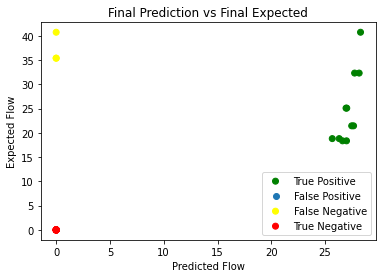

R:  62.4892 %  R^2:  39.049 %
powder dropped: 5013
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 970us/step - loss: 0.2285 0s - loss: 0.22
Epoch 2/10
1244/1244 [==============================] - 1s 905us/step - loss: 0.2164
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2156
Epoch 4/10
1244/1244 [==============================] - 1s 958us/step - loss: 0.2150
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2142
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2126
Epoch 7/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2124
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2118
Epoch 9/10
1244/1244 [==============================] - 1s 858us/step - loss: 0.2110
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan             
Epoch 1/10
533/53

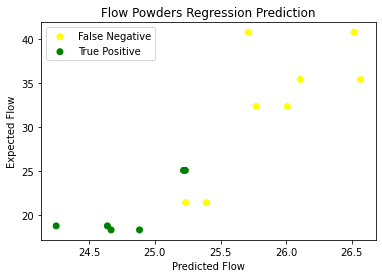

R:  88.2903 %  R^2:  77.9517 %


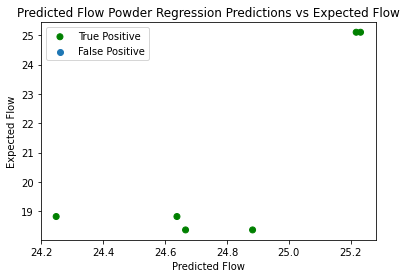

R:  81.5565 %  R^2:  66.5147 %


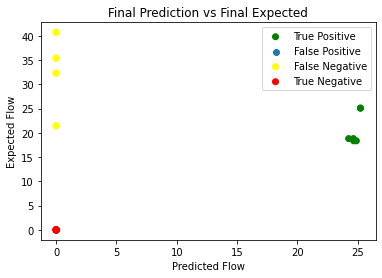

R:  27.0019 %  R^2:  7.291 %
powder dropped: 3100
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 989us/step - loss: 0.2307
Epoch 2/10
1244/1244 [==============================] - 1s 962us/step - loss: 0.2226
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2218
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2205
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2175
Epoch 6/10
1244/1244 [==============================] - 1s 975us/step - loss: 0.2182
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2170
Epoch 8/10
1244/1244 [==============================] - 1s 963us/step - loss: 0.2165 0s - lo
Epoch 9/10
1244/1244 [==============================] - 1s 880us/step - loss: 0.2152 0
Epoch 10/10
533/533 [==============================] - 1s 969us/step - loss: nan           
Epoch 1/10
533/533 [==

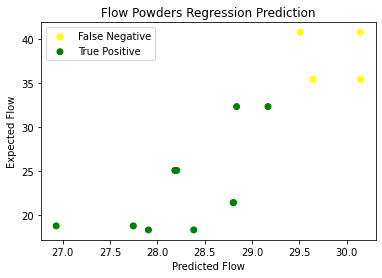

R:  84.9757 %  R^2:  72.2087 %


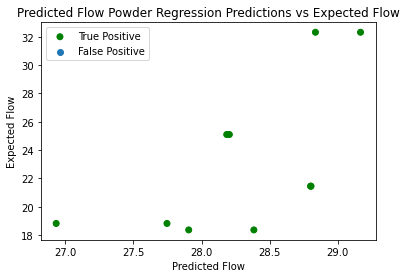

R:  63.9303 %  R^2:  40.8709 %


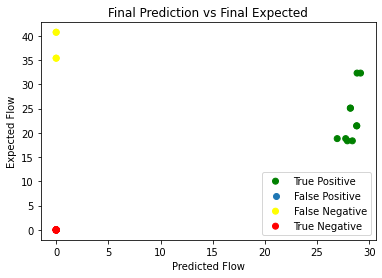

R:  50.0798 %  R^2:  25.0798 %
powder dropped: 497
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 998us/step - loss: 0.2374
Epoch 2/10
1244/1244 [==============================] - 1s 872us/step - loss: 0.2235
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2212A: 0s
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2201A
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2190
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2187
Epoch 7/10
1244/1244 [==============================] - 1s 996us/step - loss: 0.2173
Epoch 8/10
1244/1244 [==============================] - 1s 954us/step - loss: 0.2164
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2161
Epoch 10/10
533/533 [==============================] - 1s 2ms/step - loss: nan
Epoch 1/10
533/533 [====================

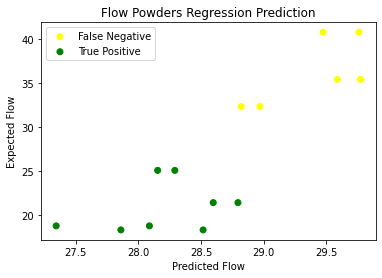

R:  86.4433 %  R^2:  74.7244 %


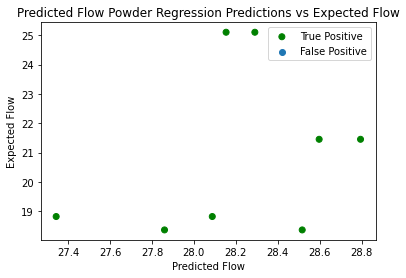

R:  30.4149 %  R^2:  9.2507 %


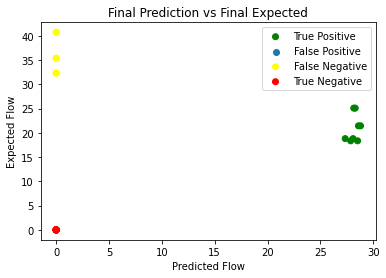

R:  33.1775 %  R^2:  11.0075 %
powder dropped: 4909
1244/1244 [==============================] - 1s 977us/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2355
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2265A
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2250A: 1s
Epoch 4/10
1244/1244 [==============================] - 1s 930us/step - loss: 0.2237
Epoch 5/10
1244/1244 [==============================] - 1s 991us/step - loss: 0.2237
Epoch 6/10
1244/1244 [==============================] - 1s 960us/step - loss: 0.2232
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2228A: 0s -
Epoch 8/10
1244/1244 [==============================] - 1s 890us/step - loss: 0.2211
Epoch 9/10
1244/1244 [==============================] - 1s 903us/step - loss: 0.2211
Epoch 10/10
622/622 [==============================] - 1s 966us/step - loss: nan          
Epoch 1/10
622/6

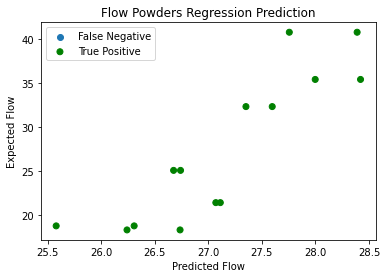

R:  87.6388 %  R^2:  76.8057 %


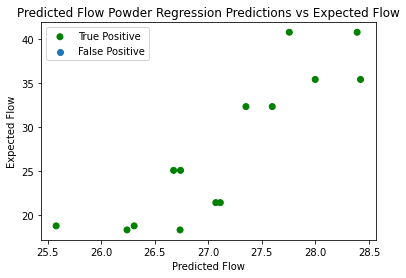

R:  87.6388 %  R^2:  76.8057 %


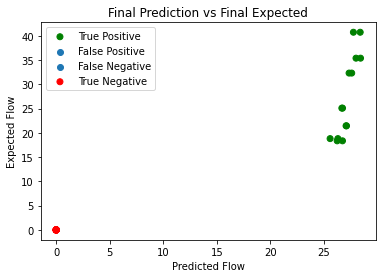

R:  93.9377 %  R^2:  88.243 %
powder dropped: 1824
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 933us/step - loss: 0.2399
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2227
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2217
Epoch 4/10
1244/1244 [==============================] - 1s 971us/step - loss: 0.2202
Epoch 5/10
1244/1244 [==============================] - 1s 987us/step - loss: 0.2197
Epoch 6/10
1244/1244 [==============================] - 1s 925us/step - loss: 0.2191
Epoch 7/10
1244/1244 [==============================] - 1s 922us/step - loss: 0.2178
Epoch 8/10
1244/1244 [==============================] - 1s 955us/step - loss: 0.2170 0s - loss: 0
Epoch 9/10
1244/1244 [==============================] - 1s 931us/step - loss: 0.2169 0s 
Epoch 10/10
533/533 [==============================] - 1s 972us/step - loss: nan           
Epoch 1/10

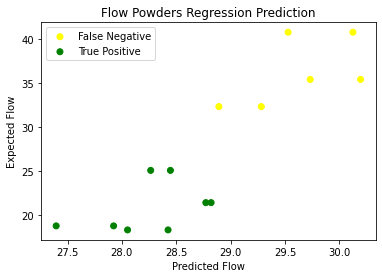

R:  87.5856 %  R^2:  76.7124 %


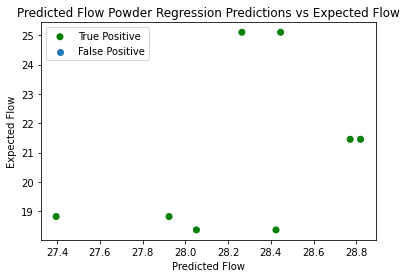

R:  42.539 %  R^2:  18.0956 %


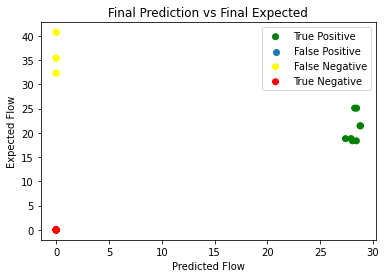

R:  33.1988 %  R^2:  11.0216 %
powder dropped: 11465
1244/1244 [==============================] - 1s 987us/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 906us/step - loss: 0.2378
Epoch 2/10
1244/1244 [==============================] - 1s 999us/step - loss: 0.2285
Epoch 3/10
1244/1244 [==============================] - 1s 887us/step - loss: 0.2270
Epoch 4/10
1244/1244 [==============================] - 1s 917us/step - loss: 0.2260 0s - loss: 0.22
Epoch 5/10
1244/1244 [==============================] - 1s 970us/step - loss: 0.2255
Epoch 6/10
1244/1244 [==============================] - 1s 938us/step - loss: 0.2246
Epoch 7/10
1244/1244 [==============================] - 1s 934us/step - loss: 0.2238
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2229
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2219
Epoch 10/10
622/622 [==============================] - 1s 968us/step - loss: nan          
Epoch 1/

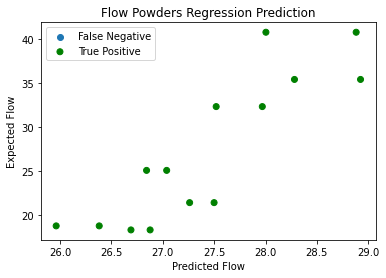

R:  86.9732 %  R^2:  75.6434 %


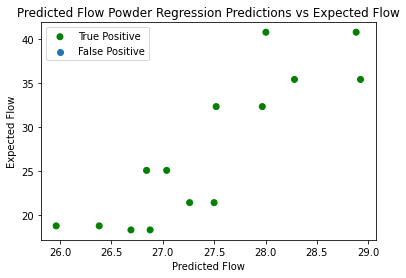

R:  86.9732 %  R^2:  75.6434 %


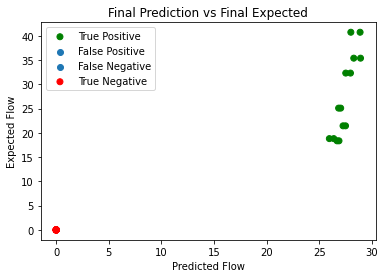

R:  93.994 %  R^2:  88.3487 %
powder dropped: 947
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 954us/step - loss: 0.2312
Epoch 2/10
1244/1244 [==============================] - 1s 881us/step - loss: 0.2250
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2230
Epoch 4/10
1244/1244 [==============================] - 1s 959us/step - loss: 0.2222 
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2212
Epoch 6/10
1244/1244 [==============================] - 1s 890us/step - loss: 0.2200
Epoch 7/10
1244/1244 [==============================] - 1s 911us/step - loss: 0.2196
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2185
Epoch 9/10
1244/1244 [==============================] - 1s 980us/step - loss: 0.2178 0s - los
Epoch 10/10
622/622 [==============================] - 1s 987us/step - loss: nan        
Epoch 1/10
622/622 [===

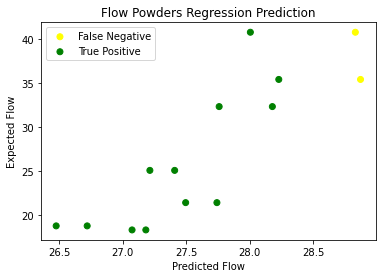

R:  85.621 %  R^2:  73.3095 %


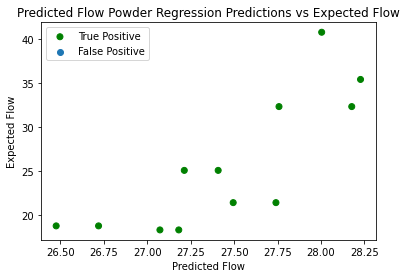

R:  81.1694 %  R^2:  65.8847 %


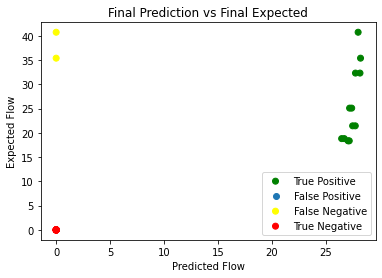

R:  71.7402 %  R^2:  51.4666 %
powder dropped: 7062
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2392
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2244
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2228
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2216
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2208
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2201A: 1s - l - ETA: 0s
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2189
Epoch 8/10
1244/1244 [==============================] - 1s 974us/step - loss: 0.2186
Epoch 9/10
1244/1244 [==============================] - 1s 863us/step - loss: 0.2179
Epoch 10/10
622/622 [==============================] - 1s 957us/step - loss: nan          
Epoch 1/10
622/622

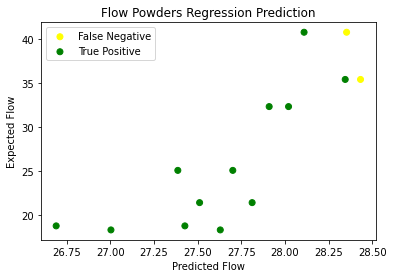

R:  83.582 %  R^2:  69.8595 %


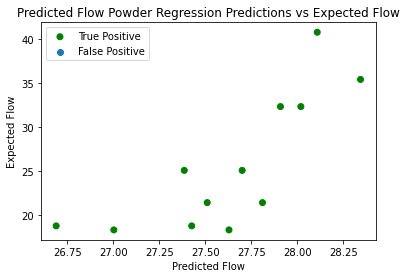

R:  78.3477 %  R^2:  61.3837 %


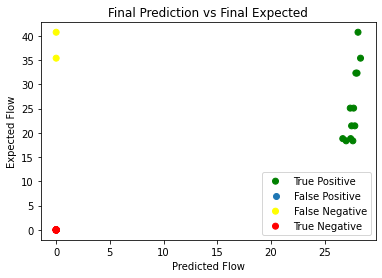

R:  71.6251 %  R^2:  51.3015 %
powder dropped: 5740
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2381A: 0s - los
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2258
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2240
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2232
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2220
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2208
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2207
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2199
Epoch 9/10
1244/1244 [==============================] - 1s 925us/step - loss: 0.2192 0s - lo - ETA: 0s - loss: 0.219
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan      
Ep

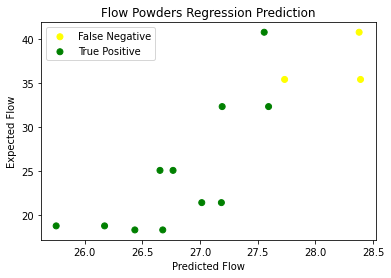

R:  85.541 %  R^2:  73.1727 %


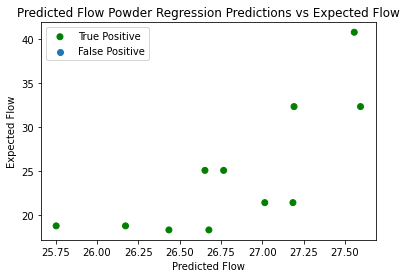

R:  76.7427 %  R^2:  58.8944 %


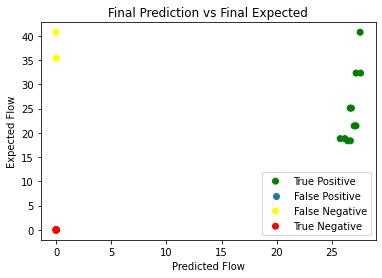

R:  62.2774 %  R^2:  38.7848 %
powder dropped: 878
1244/1244 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 954us/step - loss: 0.2331
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2210
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2200
Epoch 4/10
1244/1244 [==============================] - 1s 929us/step - loss: 0.2198
Epoch 5/10
1244/1244 [==============================] - 1s 970us/step - loss: 0.2187
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2176
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2171
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2171
Epoch 9/10
1244/1244 [==============================] - 1s 964us/step - loss: 0.2158
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan     
Epoch 1/10
622/622 [=====================

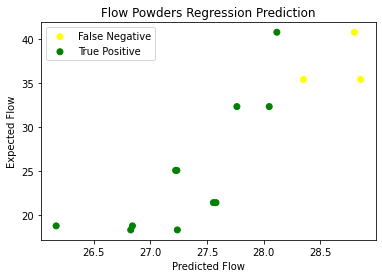

R:  86.6285 %  R^2:  75.045 %


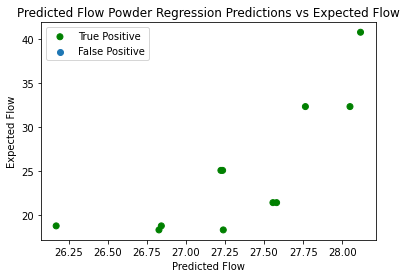

R:  78.3918 %  R^2:  61.4528 %


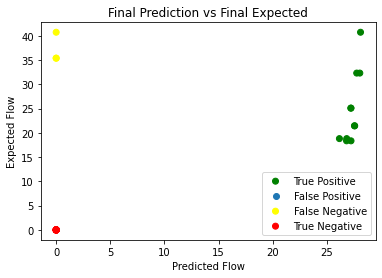

R:  62.2882 %  R^2:  38.7982 %
powder dropped: 570
1244/1244 [==============================] - 1s 995us/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 995us/step - loss: 0.2300
Epoch 2/10
1244/1244 [==============================] - 1s 970us/step - loss: 0.2192
Epoch 3/10
1244/1244 [==============================] - 1s 925us/step - loss: 0.2176
Epoch 4/10
1244/1244 [==============================] - 1s 916us/step - loss: 0.2170 0s - loss:
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2153A: 0s 
Epoch 6/10
1244/1244 [==============================] - 1s 957us/step - loss: 0.2145
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2140A: 0s - los
Epoch 8/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2132
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2126
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan             
E

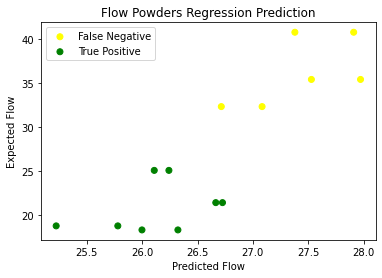

R:  86.102 %  R^2:  74.1356 %


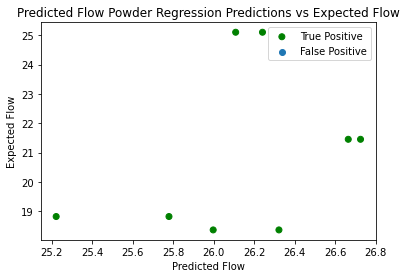

R:  35.5588 %  R^2:  12.6443 %


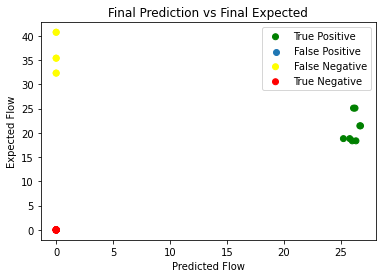

R:  33.1928 %  R^2:  11.0176 %
powder dropped: 1130
1244/1244 [==============================] - 1s 954us/step - loss: nan        
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2279
Epoch 2/10
1244/1244 [==============================] - 1s 965us/step - loss: 0.2214
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2195A: 0s
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2198
Epoch 5/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2168
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2171
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2156A: 0
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2149
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2145A: 0s -
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
622/622 [=====

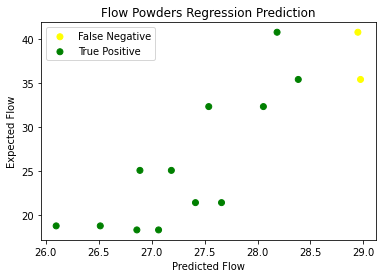

R:  86.1286 %  R^2:  74.1814 %


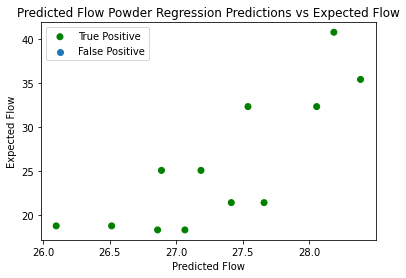

R:  81.4796 %  R^2:  66.3893 %


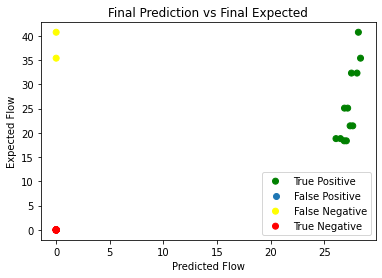

R:  71.8897 %  R^2:  51.6813 %
powder dropped: 2962
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2256
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2150
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2122
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2126
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2103
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2103
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2092
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2086A: 0s - 
Epoch 9/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2082
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan           
Epoch 1/10
533/533 [==============

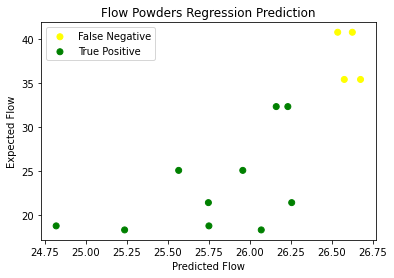

R:  78.2919 %  R^2:  61.2962 %


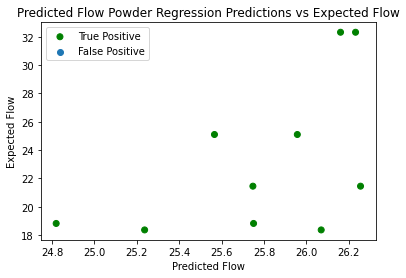

R:  54.1033 %  R^2:  29.2717 %


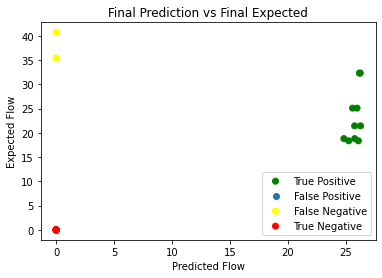

R:  49.9678 %  R^2:  24.9678 %
powder dropped: 3512
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2350
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2233
Epoch 3/10
1244/1244 [==============================] - 1s 979us/step - loss: 0.2211
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2201A: 0s - loss:
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2190
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2179A: 1s - loss: 0.221 
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2177A: 0
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2162
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2159
Epoch 10/10
533/533 [==============================] - 1s 2ms/step - loss: nan   
Epoch 1/10


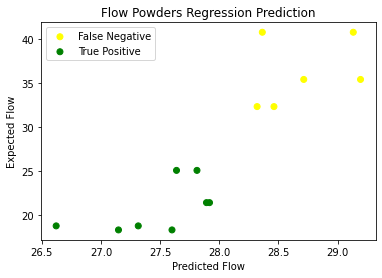

R:  86.9743 %  R^2:  75.6453 %


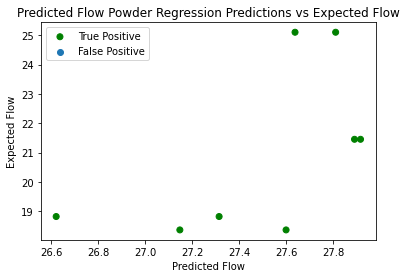

R:  58.2187 %  R^2:  33.8942 %


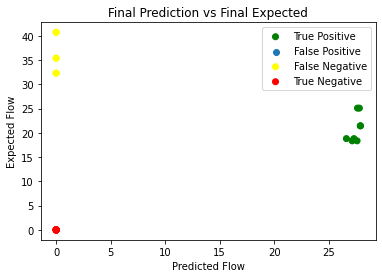

R:  33.2231 %  R^2:  11.0377 %
powder dropped: 4407
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2335
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2243
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2229
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2217
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2202
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2193
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2183
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2186
Epoch 9/10
1244/1244 [==============================] - 1s 942us/step - loss: 0.2179
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan    
Epoch 1/10
622/622 [===========================

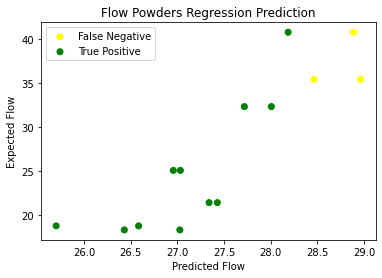

R:  87.8978 %  R^2:  77.2602 %


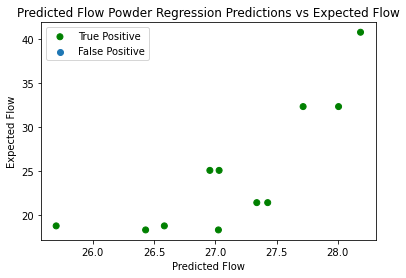

R:  80.6044 %  R^2:  64.9707 %


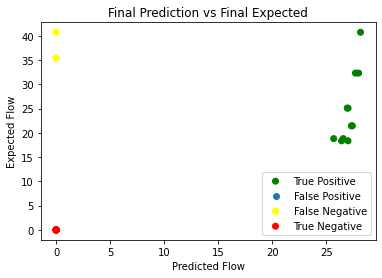

R:  62.4487 %  R^2:  38.9984 %
powder dropped: 5013
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 995us/step - loss: 0.2273
Epoch 2/10
1244/1244 [==============================] - 1s 996us/step - loss: 0.2179
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2174
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2141A: 0s - loss: 0.214
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2142
Epoch 6/10
1244/1244 [==============================] - 1s 961us/step - loss: 0.2121
Epoch 7/10
1244/1244 [==============================] - 1s 997us/step - loss: 0.2124
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2112A: 0s
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2108
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan             
Epoch 1/

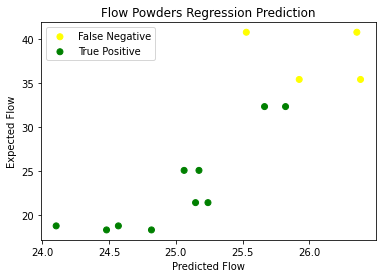

R:  87.2615 %  R^2:  76.1456 %


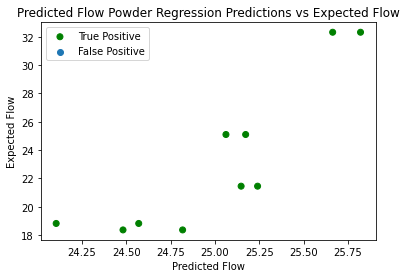

R:  87.1775 %  R^2:  75.9992 %


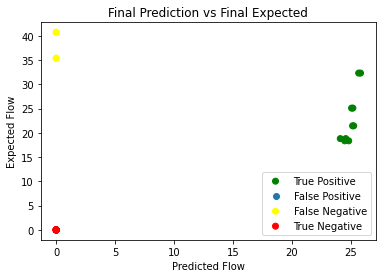

R:  50.1661 %  R^2:  25.1664 %
powder dropped: 3100
1244/1244 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2313
Epoch 2/10
1244/1244 [==============================] - 1s 996us/step - loss: 0.2210
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2196
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2190
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2176A: 0s 
Epoch 6/10
1244/1244 [==============================] - 1s 976us/step - loss: 0.2167
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2158A: 0s - loss: 0.21
Epoch 8/10
1244/1244 [==============================] - 1s 945us/step - loss: 0.2155
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2148A: 0s - loss
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan            

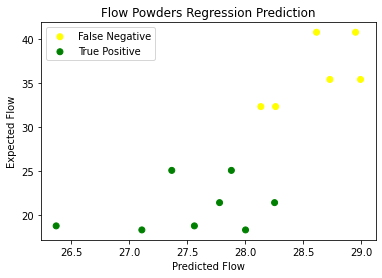

R:  79.1554 %  R^2:  62.6558 %


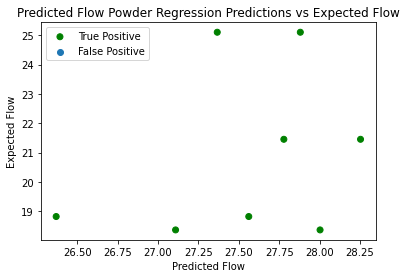

R:  29.6337 %  R^2:  8.7816 %


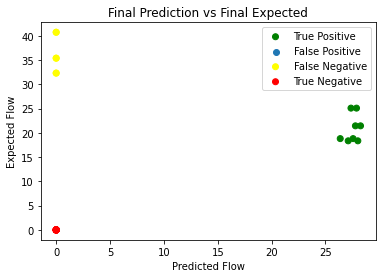

R:  33.1883 %  R^2:  11.0147 %
powder dropped: 497
1244/1244 [==============================] - 1s 1ms/step - loss: nan                     - ETA
Epoch 1/10
1244/1244 [==============================] - 1s 995us/step - loss: 0.2378
Epoch 2/10
1244/1244 [==============================] - 1s 980us/step - loss: 0.2240
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2219
Epoch 4/10
1244/1244 [==============================] - 1s 999us/step - loss: 0.2207 0s - loss: - ETA: 0s - loss: 0. - ETA: 0s - loss: 0.2
Epoch 5/10
1244/1244 [==============================] - 1s 981us/step - loss: 0.2194
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2186
Epoch 7/10
1244/1244 [==============================] - 1s 977us/step - loss: 0.2175
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2171
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2164
Epoch 10/10
533/533 [======================

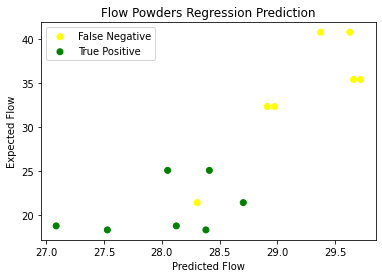

R:  86.6526 %  R^2:  75.0867 %


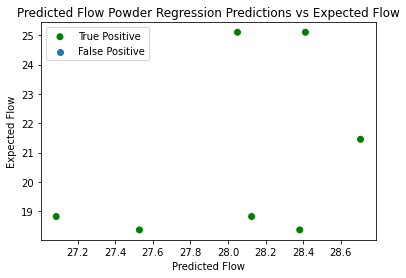

R:  40.6638 %  R^2:  16.5354 %


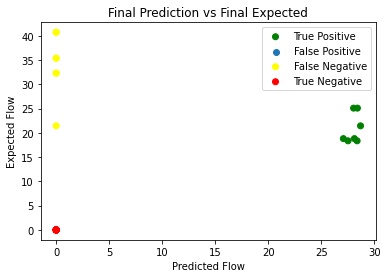

R:  30.1079 %  R^2:  9.0649 %
powder dropped: 4909
1244/1244 [==============================] - 1s 1ms/step - loss: nan: 0s -
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2514
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2284
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2265
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2238A: 0s - 
Epoch 5/10
1244/1244 [==============================] - 1s 959us/step - loss: 0.2225 1s - l - ETA: 0s - l
Epoch 6/10
1244/1244 [==============================] - 1s 972us/step - loss: 0.2232
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2217
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2209
Epoch 9/10
1244/1244 [==============================] - 1s 955us/step - loss: 0.2206
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan       
Epoch 

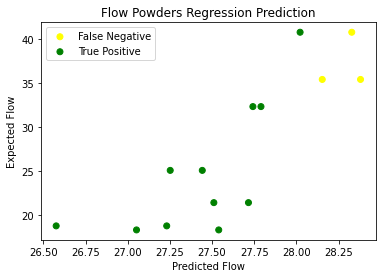

R:  83.0901 %  R^2:  69.0397 %


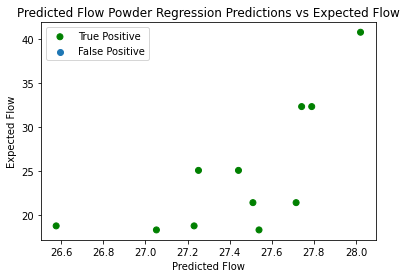

R:  71.5351 %  R^2:  51.1728 %


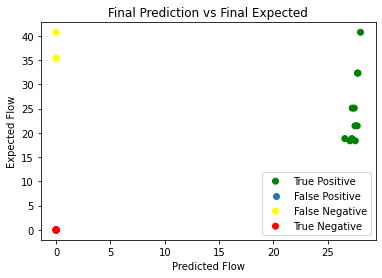

R:  62.0903 %  R^2:  38.5521 %
powder dropped: 1824
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2337A: 0s - loss
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2210A: 0s 
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2197
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2181
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2170A: 0s - loss: 0.217
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2166
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2156A: 0s - loss: 0.21
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2149A: 0
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2145A: 0s - loss: 0
Epoch 10/10
533/533 [==============================] - 1s 

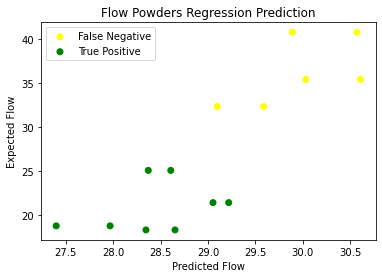

R:  85.435 %  R^2:  72.9914 %


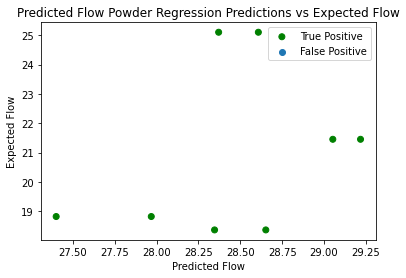

R:  34.4741 %  R^2:  11.8846 %


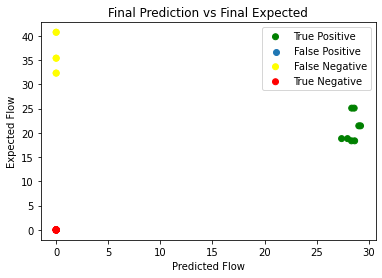

R:  33.1958 %  R^2:  11.0196 %
powder dropped: 11465
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2354A: 0s - loss
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2258
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2263
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2241
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2227A: 0s - loss: 0.222
Epoch 6/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2226A: 0s - loss: 0.22
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2206
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2202A: 0s - 
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2200A: 0s - loss: 
Epoch 10/10
622/622 [==============================] - 1s 1m

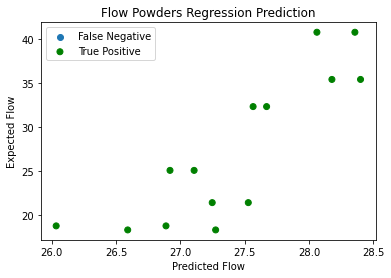

R:  85.0414 %  R^2:  72.3205 %


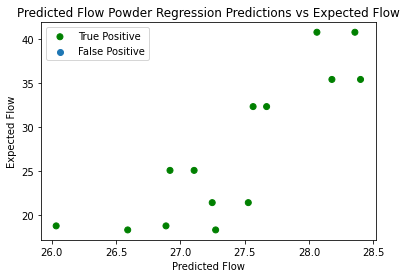

R:  85.0414 %  R^2:  72.3205 %


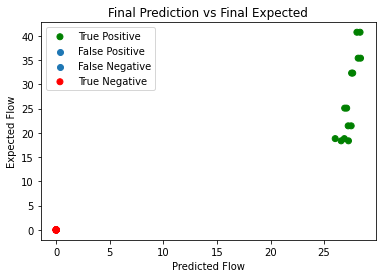

R:  93.6897 %  R^2:  87.7776 %
powder dropped: 947
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2326A: 0s - loss:
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2239
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2211
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2199
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2202
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2193
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2182
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2170
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2168A: 0s -  - ETA: 0s - loss: 0.216
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan        
E

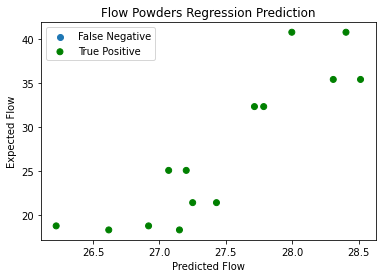

R:  88.6441 %  R^2:  78.5778 %


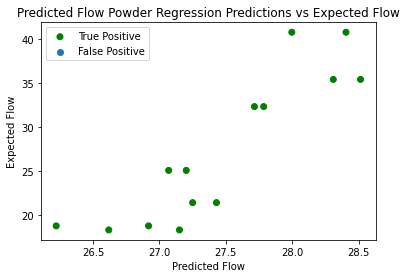

R:  88.6441 %  R^2:  78.5778 %


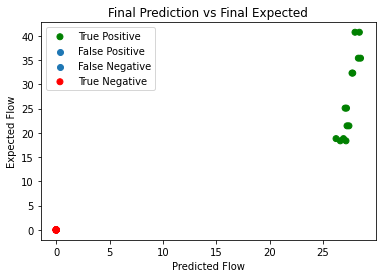

R:  93.723 %  R^2:  87.8399 %
powder dropped: 7062
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2355
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2237A: 0s - loss: 0.
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2216A: 0s - l
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2208A: - ETA: 0s - loss
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2200
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2193
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2179A: 
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2177
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2167
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan        

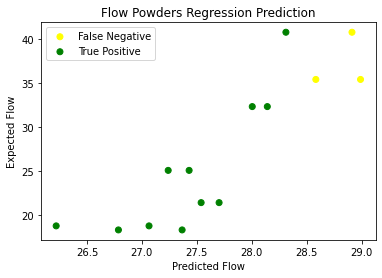

R:  87.7874 %  R^2:  77.0663 %


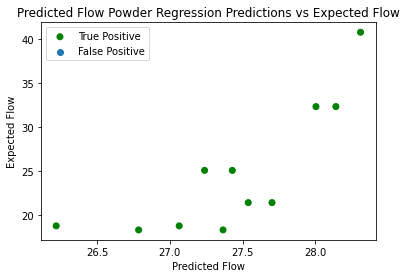

R:  80.4634 %  R^2:  64.7436 %


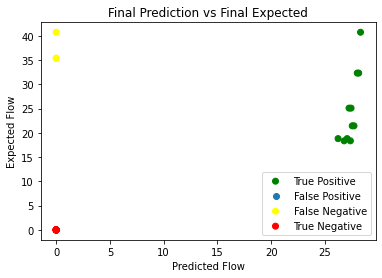

R:  62.3353 %  R^2:  38.857 %
powder dropped: 5740
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2392
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2248
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2227A: 1s - loss: 0.22
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2211
Epoch 5/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2204
Epoch 6/10
1244/1244 [==============================] - 1s 981us/step - loss: 0.2191
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2191
Epoch 8/10
1244/1244 [==============================] - 1s 1000us/step - loss: 0.2182
Epoch 9/10
1244/1244 [==============================] - 1s 981us/step - loss: 0.2176
Epoch 10/10
622/622 [==============================] - 1s 2ms/step - loss: nan
Epoch 1/10
622/622 [=========

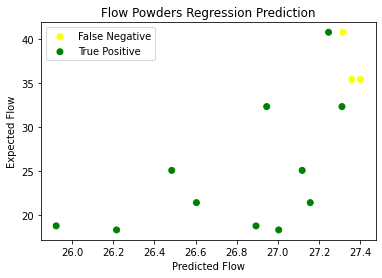

R:  68.6644 %  R^2:  47.148 %


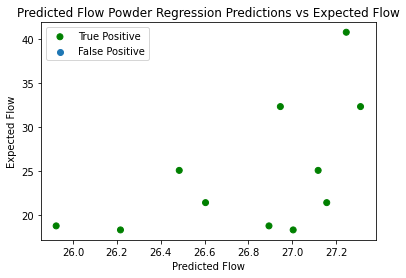

R:  56.4015 %  R^2:  31.8113 %


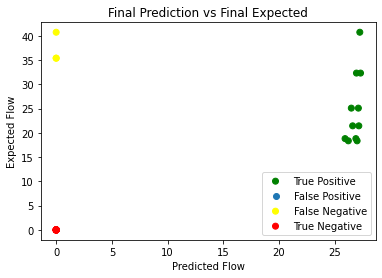

R:  62.0508 %  R^2:  38.5031 %
powder dropped: 878
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2372A: 0s - lo
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2207
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2191
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2190A
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2172
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2165
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2158
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2150
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2146
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan       
Epoch 1/10
622/622 [================

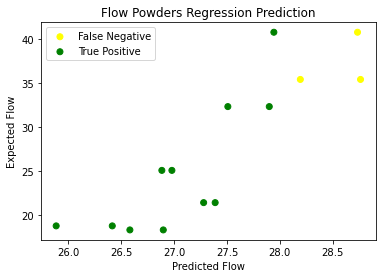

R:  87.2755 %  R^2:  76.1702 %


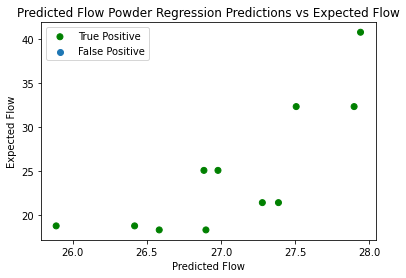

R:  79.6988 %  R^2:  63.519 %


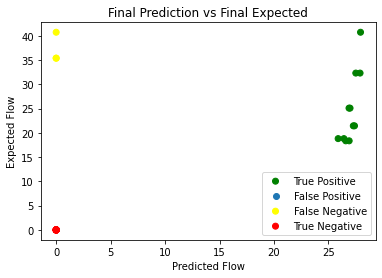

R:  62.3506 %  R^2:  38.876 %
powder dropped: 570
1244/1244 [==============================] - 1s 1ms/step - loss: nan - E
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2361
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2191
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2162
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2154
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2145
Epoch 6/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2139
Epoch 7/10
1244/1244 [==============================] - 1s 978us/step - loss: 0.2134
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2123
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2124
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan          
Epoch 1/10
533/533 [===================

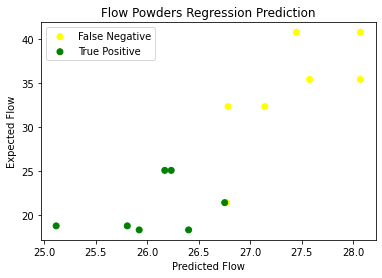

R:  85.5804 %  R^2:  73.2401 %


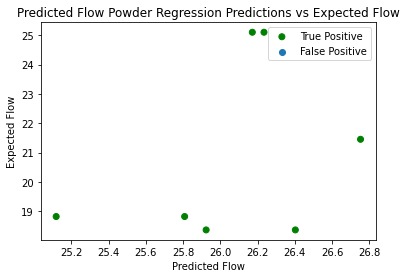

R:  36.9559 %  R^2:  13.6574 %


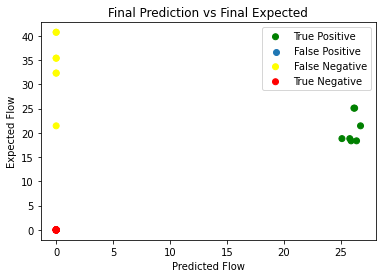

R:  30.1004 %  R^2:  9.0604 %
powder dropped: 1130
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2316
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2200
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2183
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2175
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2168
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2163A: 
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2149A
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2139
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2138A: 0s - 
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan      
Epoch 1/10
622/622 [================

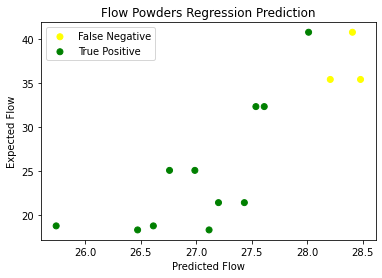

R:  85.1413 %  R^2:  72.4904 %


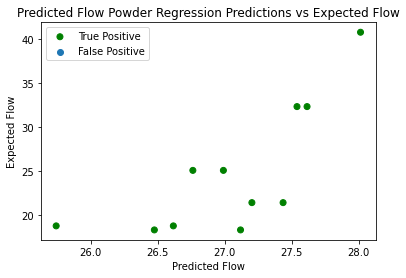

R:  75.3374 %  R^2:  56.7572 %


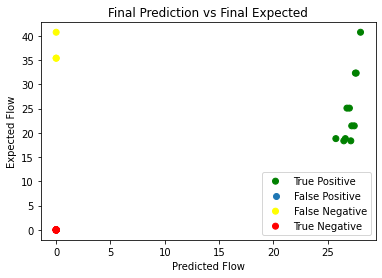

R:  62.3202 %  R^2:  38.838 %
powder dropped: 2962
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2220
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2136
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2115
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2095
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2097
Epoch 6/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2090A: 0s
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2076
Epoch 8/10
1244/1244 [==============================] - 1s 931us/step - loss: 0.2074
Epoch 9/10
1244/1244 [==============================] - 1s 980us/step - loss: 0.2070
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan             
Epoch 1/10
533/533 [============

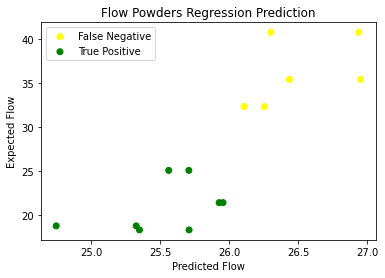

R:  84.332 %  R^2:  71.1189 %


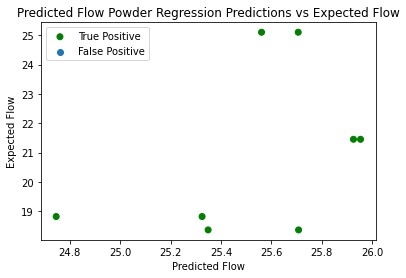

R:  42.8358 %  R^2:  18.3491 %


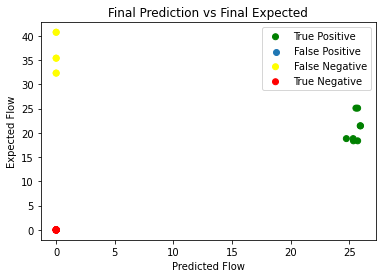

R:  33.195 %  R^2:  11.0191 %
powder dropped: 3512
1244/1244 [==============================] - 1s 1ms/step - loss: nan: 0s - los
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2332
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2237
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2211
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2195
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2193
Epoch 6/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2177
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2164
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2160
Epoch 9/10
1244/1244 [==============================] - 1s 959us/step - loss: 0.2160
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan           
Epoch 1/10
533/533 [===========

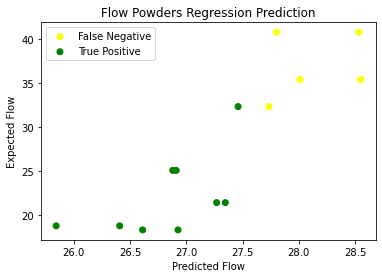

R:  85.6627 %  R^2:  73.3809 %


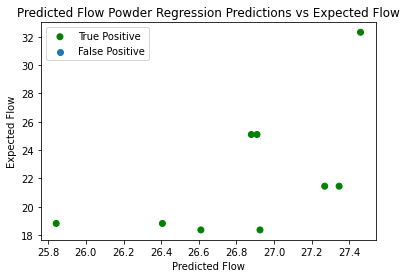

R:  59.6024 %  R^2:  35.5244 %


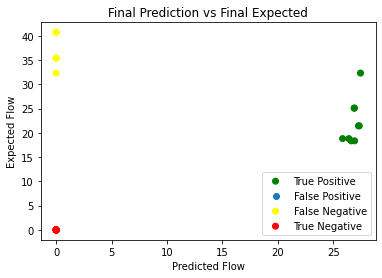

R:  41.7721 %  R^2:  17.4491 %
powder dropped: 4407
1244/1244 [==============================] - 1s 1ms/step - loss: nan    
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2328
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2243
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2218A: 0s 
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2217
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2200A: 1s  - ETA: 0s - los
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2196
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2189
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2177A: 0s - 
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2171
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan         
Epoc

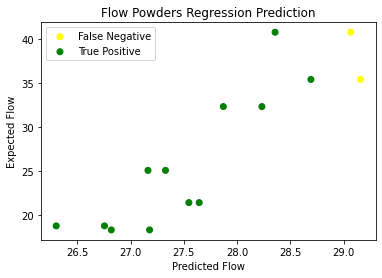

R:  89.3129 %  R^2:  79.768 %


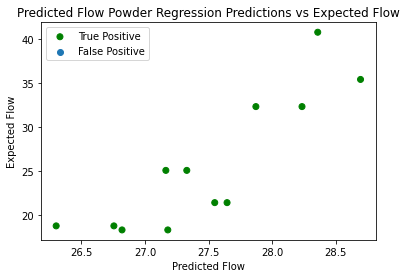

R:  86.6923 %  R^2:  75.1555 %


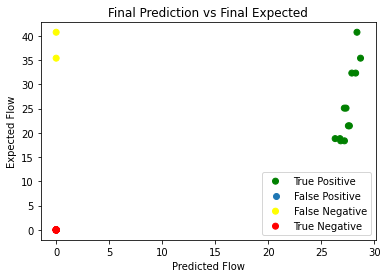

R:  71.9604 %  R^2:  51.7831 %
powder dropped: 5013
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2330
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2153
Epoch 3/10
1244/1244 [==============================] - 1s 957us/step - loss: 0.2145 0s - loss: 0.
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2131
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2111
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2107
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2100A: 0s - loss: 0.
Epoch 8/10
1244/1244 [==============================] - 1s 974us/step - loss: 0.2090
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2088
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan              
Epoch

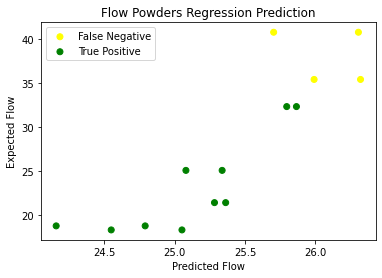

R:  86.6179 %  R^2:  75.0267 %


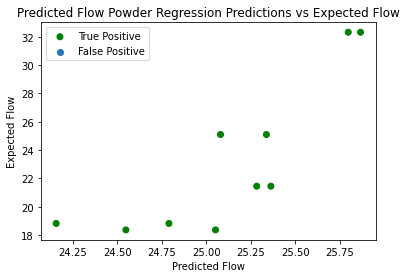

R:  82.7536 %  R^2:  68.4816 %


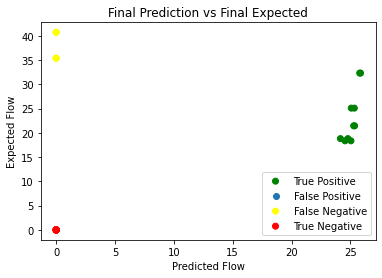

R:  50.1422 %  R^2:  25.1424 %
powder dropped: 3100
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2314
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2219
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2198
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2177
Epoch 5/10
1244/1244 [==============================] - 1s 990us/step - loss: 0.2175
Epoch 6/10
1244/1244 [==============================] - 1s 980us/step - loss: 0.2163
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2153A: 
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2146
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2139
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan            
Epoch 1/10
533/533 [==============

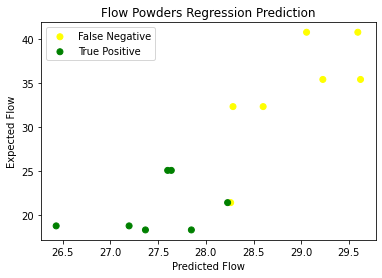

R:  85.767 %  R^2:  73.5597 %


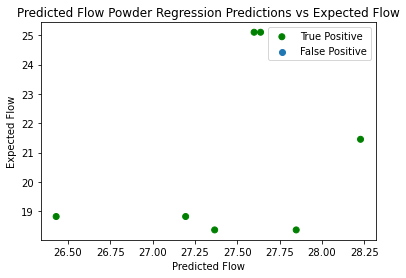

R:  35.298 %  R^2:  12.4595 %


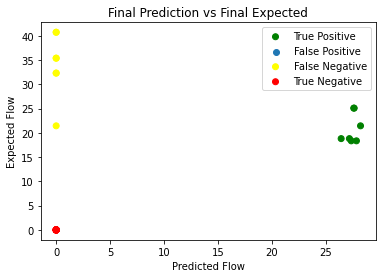

R:  30.0993 %  R^2:  9.0597 %
powder dropped: 497
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2423A: 0s - loss
Epoch 2/10
1244/1244 [==============================] - 1s 961us/step - loss: 0.2207
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2207
Epoch 4/10
1244/1244 [==============================] - 1s 986us/step - loss: 0.2208
Epoch 5/10
1244/1244 [==============================] - 1s 941us/step - loss: 0.2187 0s - l
Epoch 6/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2182
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2173A: 0s - loss: 0.2
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2169A:
Epoch 9/10
1244/1244 [==============================] - 1s 997us/step - loss: 0.2160 0s - loss: 0. - ETA: 0s - loss
Epoch 10/10
533/533 [==============================] - 1s

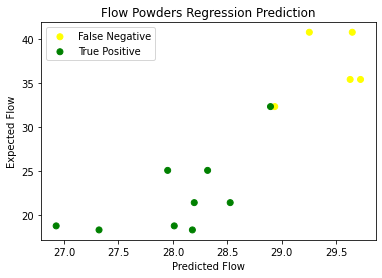

R:  87.8436 %  R^2:  77.165 %


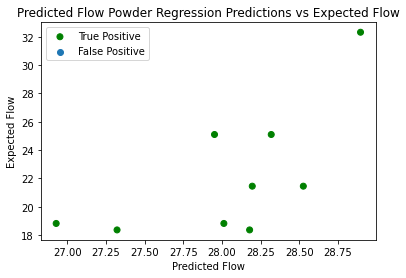

R:  66.7531 %  R^2:  44.5598 %


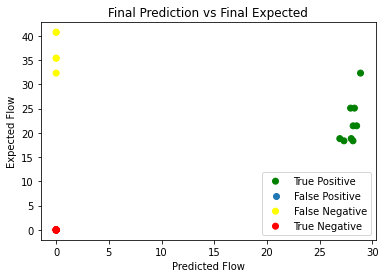

R:  41.8229 %  R^2:  17.4915 %
powder dropped: 4909
1244/1244 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2373A: 0s - loss: 0.237
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2263
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2264
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2239
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2223
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2219A: 0s -
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2209
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2203
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2202A: 0s - los
Epoch 10/10
622/622 [==============================] - 1s 995us/step - loss: nan       
Epoch 1

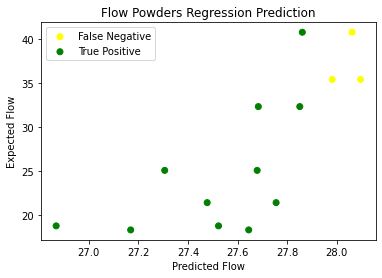

R:  75.8647 %  R^2:  57.5545 %


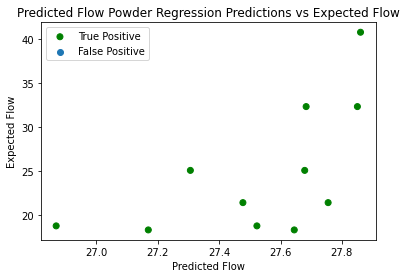

R:  61.0261 %  R^2:  37.2419 %


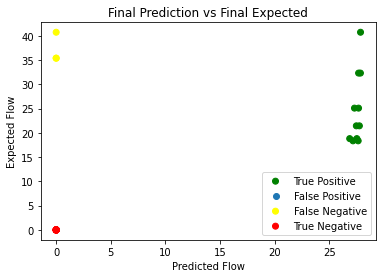

R:  61.9671 %  R^2:  38.3993 %
powder dropped: 1824
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2345A: 0s - loss: 0.2 - ETA: 0s - los
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2227
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2201
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2186
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2184
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2174
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2166
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2163
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2155
Epoch 10/10
533/533 [==============================] - 1s 998us/step - loss: nan           
Epoch 1

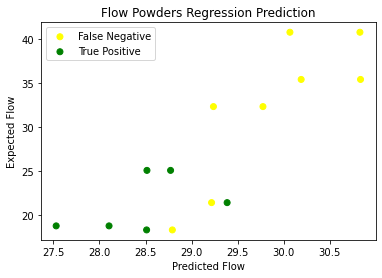

R:  85.3463 %  R^2:  72.8398 %


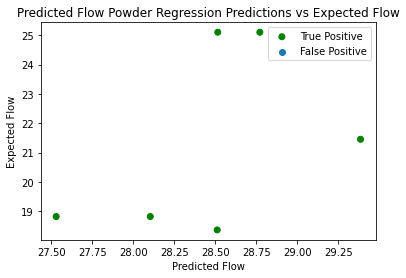

R:  46.399 %  R^2:  21.5287 %


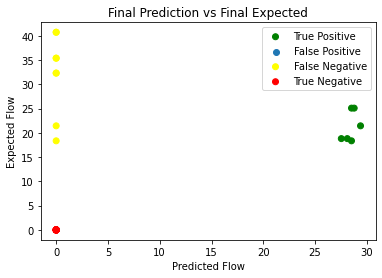

R:  28.7127 %  R^2:  8.2442 %
powder dropped: 11465
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2411
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2275A: 0s 
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2256A: 0s - los
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2240A - ETA: 0s - loss: 0
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2231
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2229
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2215
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2206
Epoch 9/10
1244/1244 [==============================] - 1s 995us/step - loss: 0.2204
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan          
Epo

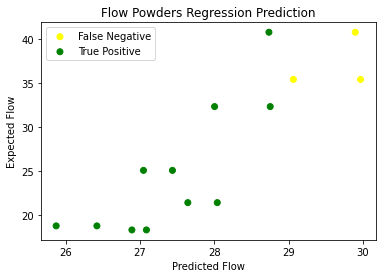

R:  87.1102 %  R^2:  75.8819 %


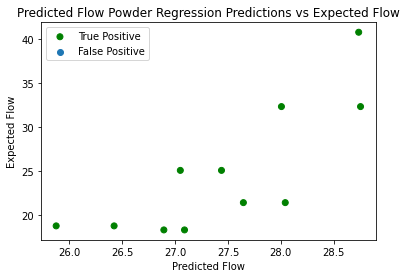

R:  79.694 %  R^2:  63.5113 %


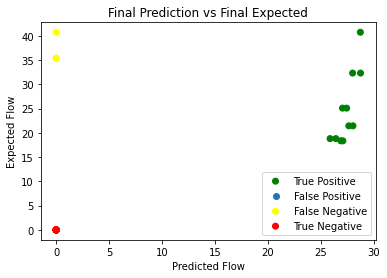

R:  62.5963 %  R^2:  39.1829 %
powder dropped: 947
1244/1244 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2399
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2223
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2207
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2197A
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2185
Epoch 6/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2181
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2167
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2178
Epoch 9/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2165
Epoch 10/10
622/622 [==============================] - 1s 2ms/step - loss: nan
Epoch 1/10
622/622 [==============================] -

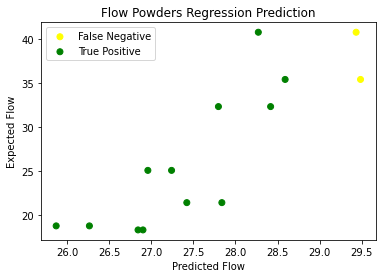

R:  85.97 %  R^2:  73.9085 %


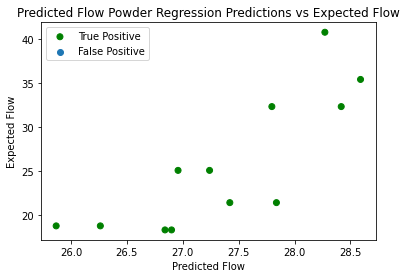

R:  81.5272 %  R^2:  66.4669 %


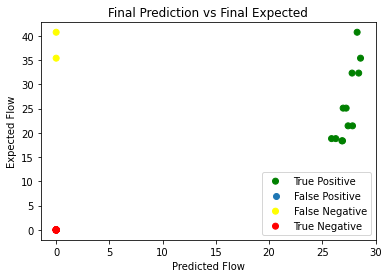

R:  72.0586 %  R^2:  51.9244 %
powder dropped: 7062
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2374A: 0s -
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2262
Epoch 3/10
1244/1244 [==============================] - 1s 939us/step - loss: 0.2237
Epoch 4/10
1244/1244 [==============================] - 1s 987us/step - loss: 0.2229
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2216
Epoch 6/10
1244/1244 [==============================] - 1s 987us/step - loss: 0.2207
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2193
Epoch 8/10
1244/1244 [==============================] - 1s 999us/step - loss: 0.2190
Epoch 9/10
1244/1244 [==============================] - 1s 966us/step - loss: 0.2186
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan           
Epoch 1/10
622/622 [=====

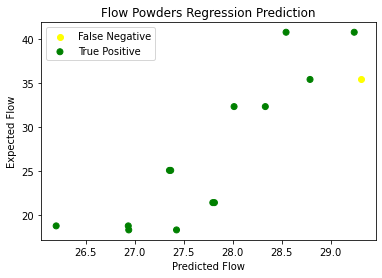

R:  87.3676 %  R^2:  76.3311 %


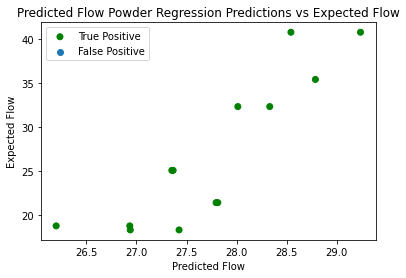

R:  87.5824 %  R^2:  76.7068 %


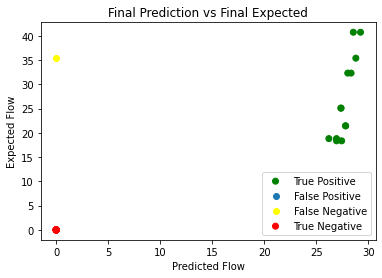

R:  84.1893 %  R^2:  70.8784 %
powder dropped: 5740
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2413
Epoch 2/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2272
Epoch 3/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2252
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2238
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2236
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2214
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2209
Epoch 8/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2200
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2193
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan        
Epoch 1/10
622/622 [=========================

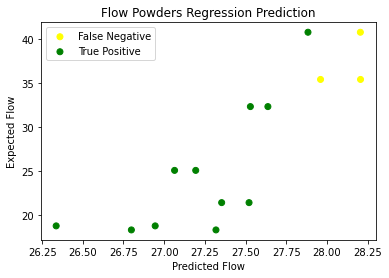

R:  84.3474 %  R^2:  71.1449 %


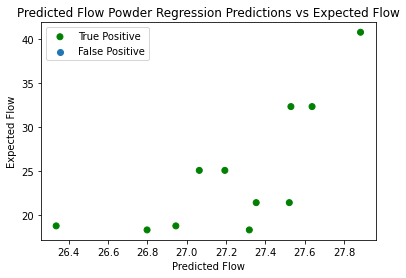

R:  73.504 %  R^2:  54.0284 %


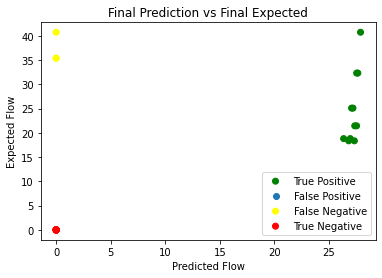

R:  62.1313 %  R^2:  38.6029 %
powder dropped: 878
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2322
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2214A: 0s - loss: 0.223 - ETA: 0s -
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2202
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2194
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2176
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2174
Epoch 7/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2165
Epoch 8/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2161
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2155A: 1s - loss: - ETA: 0s
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan 

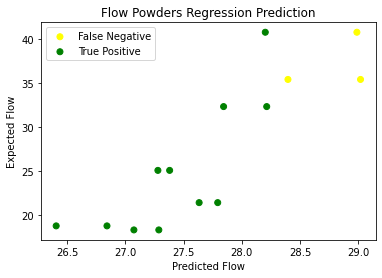

R:  86.2604 %  R^2:  74.4086 %


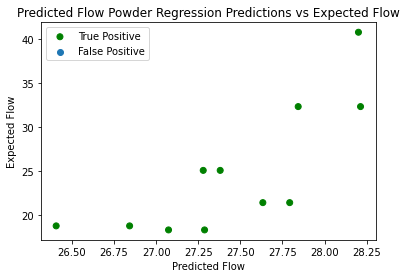

R:  78.1906 %  R^2:  61.1377 %


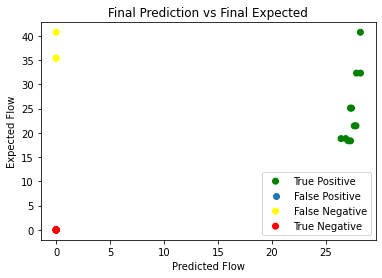

R:  62.2683 %  R^2:  38.7734 %
powder dropped: 570
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2298
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2183
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2173
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2154
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2141
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2139
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2133
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2125
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2120
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan             
Epoch 1/10
533/533 [=====================

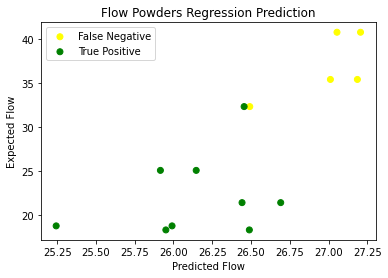

R:  77.108 %  R^2:  59.4564 %


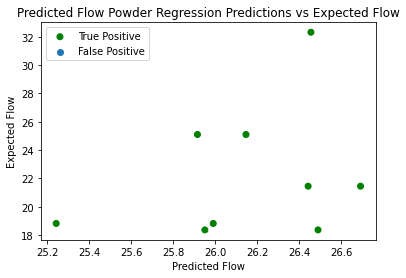

R:  29.818 %  R^2:  8.8911 %


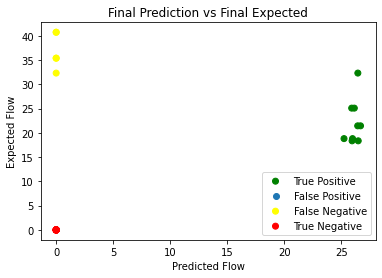

R:  41.6587 %  R^2:  17.3545 %
powder dropped: 1130
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2363
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2221A: 0s - loss: 0.2
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2196
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2184A: 0s - los
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2180
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2164
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2156
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2154
Epoch 9/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2143
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan  
Epoch 1/10
622/622 [===

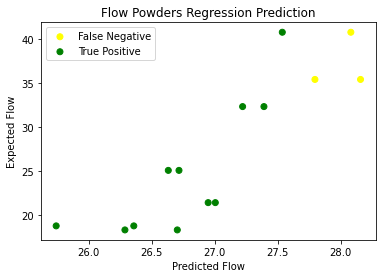

R:  87.4981 %  R^2:  76.5592 %


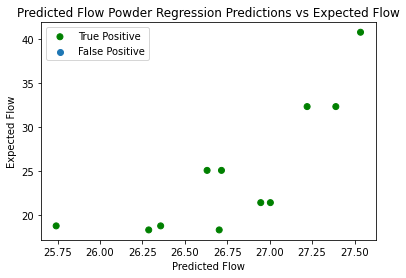

R:  80.1206 %  R^2:  64.1932 %


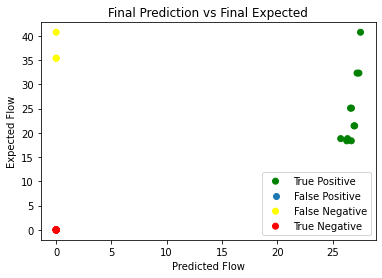

R:  62.2621 %  R^2:  38.7657 %
powder dropped: 2962
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2262A: 0s - loss: 0.226
Epoch 2/10
1244/1244 [==============================] - 1s 970us/step - loss: 0.2150 0s 
Epoch 3/10
1244/1244 [==============================] - 1s 993us/step - loss: 0.2129
Epoch 4/10
1244/1244 [==============================] - 1s 942us/step - loss: 0.2116
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2103
Epoch 6/10
1244/1244 [==============================] - 1s 976us/step - loss: 0.2096
Epoch 7/10
1244/1244 [==============================] - 1s 952us/step - loss: 0.2094
Epoch 8/10
1244/1244 [==============================] - 1s 960us/step - loss: 0.2088
Epoch 9/10
1244/1244 [==============================] - 1s 974us/step - loss: 0.2081
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan             
Epo

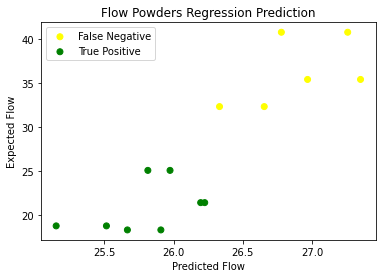

R:  87.9678 %  R^2:  77.3834 %


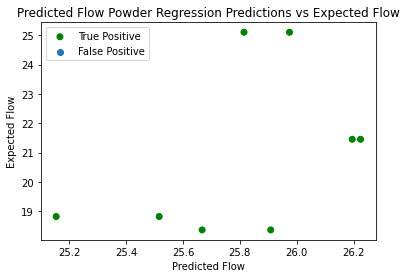

R:  45.2367 %  R^2:  20.4636 %


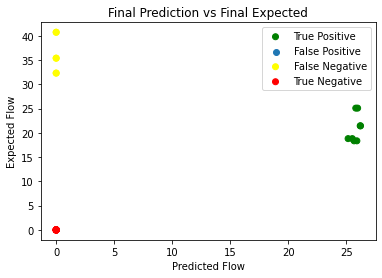

R:  33.1923 %  R^2:  11.0173 %
powder dropped: 3512
1244/1244 [==============================] - 1s 1ms/step - loss: nan ETA: 
Epoch 1/10
1244/1244 [==============================] - 1s 933us/step - loss: 0.2283
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2214
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2205
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2195
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2192
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2182
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2165
Epoch 8/10
1244/1244 [==============================] - 1s 972us/step - loss: 0.2164
Epoch 9/10
1244/1244 [==============================] - 1s 946us/step - loss: 0.2162
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan            
Epoch 1/10
533/533 [=========

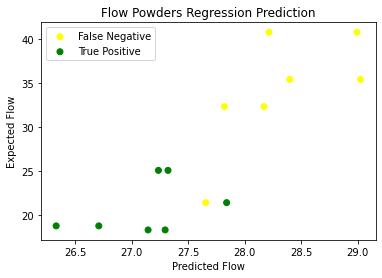

R:  84.8578 %  R^2:  72.0085 %


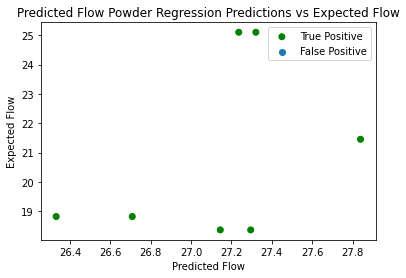

R:  41.6776 %  R^2:  17.3702 %


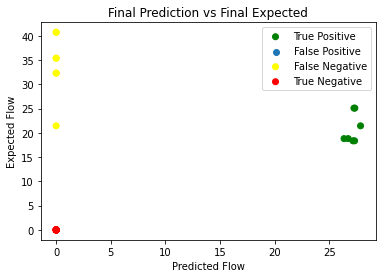

R:  30.1024 %  R^2:  9.0615 %
powder dropped: 4407
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 989us/step - loss: 0.2395
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2250
Epoch 3/10
1244/1244 [==============================] - 1s 990us/step - loss: 0.2234
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2225A: 0s
Epoch 5/10
1244/1244 [==============================] - 1s 994us/step - loss: 0.2213
Epoch 6/10
1244/1244 [==============================] - 1s 956us/step - loss: 0.2198
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2197
Epoch 8/10
1244/1244 [==============================] - 1s 970us/step - loss: 0.2193
Epoch 9/10
1244/1244 [==============================] - 1s 941us/step - loss: 0.2181
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan        
Epoch 1/10
622/622 [=========

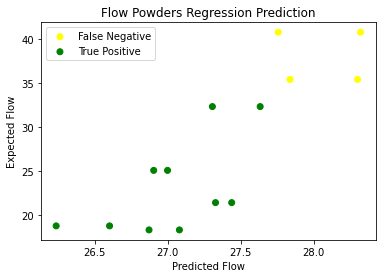

R:  83.321 %  R^2:  69.424 %


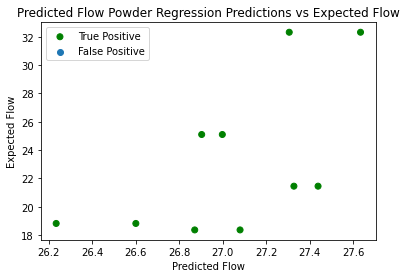

R:  60.9569 %  R^2:  37.1574 %


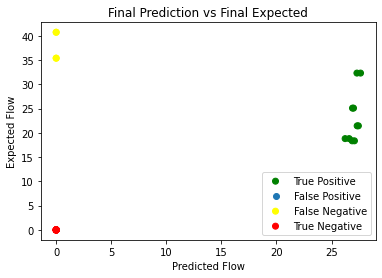

R:  49.9613 %  R^2:  24.9613 %
powder dropped: 5013
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 966us/step - loss: 0.2298
Epoch 2/10
1244/1244 [==============================] - 1s 971us/step - loss: 0.2168
Epoch 3/10
1244/1244 [==============================] - 1s 999us/step - loss: 0.2159
Epoch 4/10
1244/1244 [==============================] - 1s 988us/step - loss: 0.2148
Epoch 5/10
1244/1244 [==============================] - 1s 946us/step - loss: 0.2147
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2129
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2112
Epoch 8/10
1244/1244 [==============================] - 1s 960us/step - loss: 0.2109
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2104A: 0s - loss: 0 - ETA: 0s - loss:
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan         

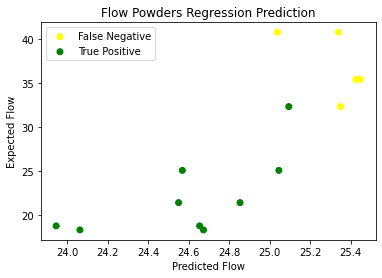

R:  80.3173 %  R^2:  64.5087 %


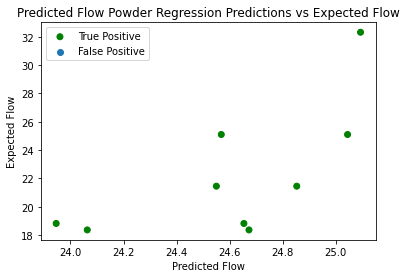

R:  67.5165 %  R^2:  45.5848 %


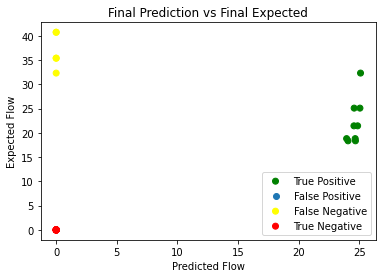

R:  41.7652 %  R^2:  17.4433 %
powder dropped: 3100
1244/1244 [==============================] - 1s 1ms/step - loss: nan: 0s -
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2289
Epoch 2/10
1244/1244 [==============================] - 1s 957us/step - loss: 0.2202
Epoch 3/10
1244/1244 [==============================] - 1s 975us/step - loss: 0.2188 0s - loss: 0.
Epoch 4/10
1244/1244 [==============================] - 1s 990us/step - loss: 0.2185
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2162
Epoch 6/10
1244/1244 [==============================] - 1s 979us/step - loss: 0.2159
Epoch 7/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2150
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2148A: 0s - loss: 0.2
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2141
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan         

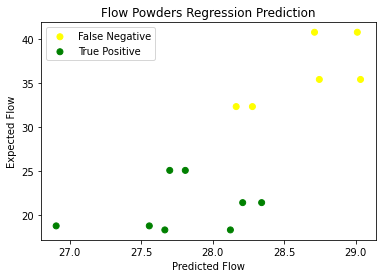

R:  79.1878 %  R^2:  62.7071 %


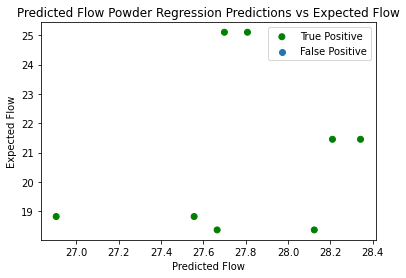

R:  22.2163 %  R^2:  4.9356 %


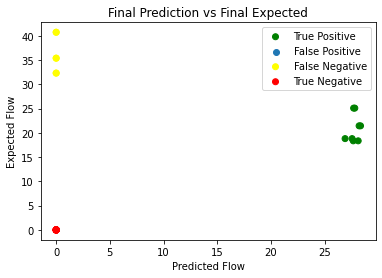

R:  33.164 %  R^2:  10.9985 %
powder dropped: 497
1244/1244 [==============================] - 1s 1ms/step - loss: nan  
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2383A: 0s - l
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2245
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2217
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2203A: 1s  - ETA: 0s - loss:
Epoch 5/10
1244/1244 [==============================] - 1s 999us/step - loss: 0.2190
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2186
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2176
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2171
Epoch 9/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2170
Epoch 10/10
533/533 [==============================] - 1s 2ms/step - loss: nan
Epoch 1/10
533/533

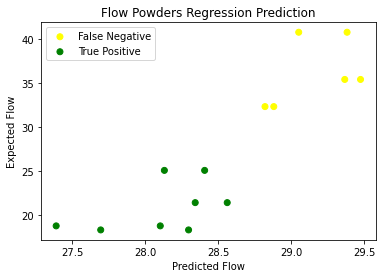

R:  87.6737 %  R^2:  76.8667 %


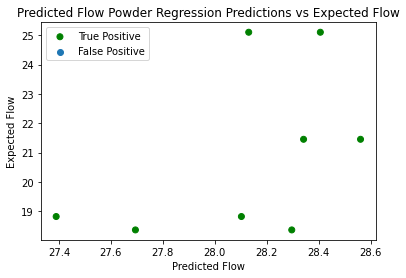

R:  48.4764 %  R^2:  23.4996 %


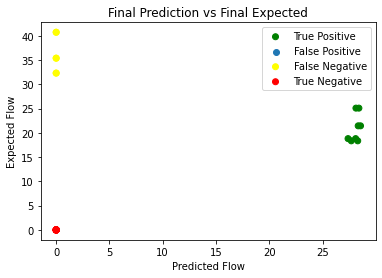

R:  33.1972 %  R^2:  11.0205 %
powder dropped: 4909
1244/1244 [==============================] - 1s 1ms/step - loss: nan 
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2371
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2262
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2249
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2249
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2227A: 0s -
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2223
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2209A: 0s - loss: 0.221
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2211
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2204
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan          
Epoch 1/10
622/6

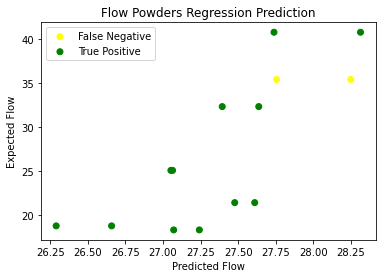

R:  77.8301 %  R^2:  60.5752 %


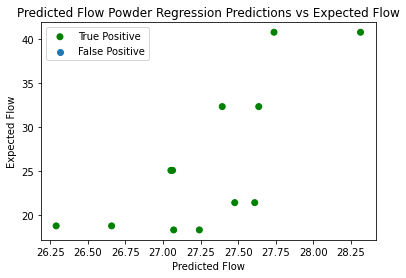

R:  74.4821 %  R^2:  55.4758 %


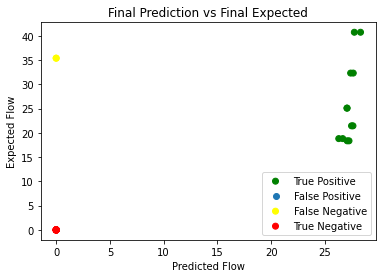

R:  74.1793 %  R^2:  55.0257 %
powder dropped: 1824
1244/1244 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2353A: 0s - loss: 0
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2232
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2227A: 0s - loss: 
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2201
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2195
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2183
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2172
Epoch 8/10
1244/1244 [==============================] - 1s 995us/step - loss: 0.2169
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2153A: 0s - lo
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan           
E

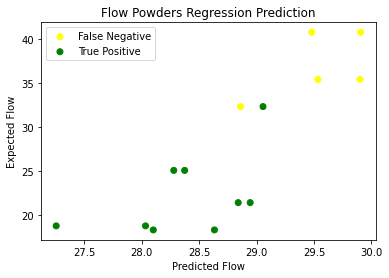

R:  82.7934 %  R^2:  68.5475 %


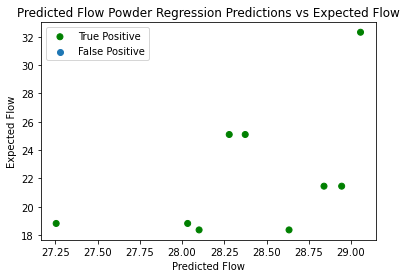

R:  51.9301 %  R^2:  26.9674 %


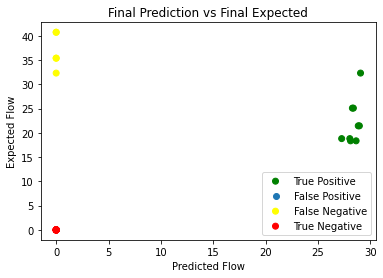

R:  41.7526 %  R^2:  17.4328 %
powder dropped: 11465
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2359
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2274
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2253
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2238A: 0s - loss: 
Epoch 5/10
1244/1244 [==============================] - 1s 947us/step - loss: 0.2226
Epoch 6/10
1244/1244 [==============================] - 1s 998us/step - loss: 0.2236
Epoch 7/10
1244/1244 [==============================] - 1s 998us/step - loss: 0.2215
Epoch 8/10
1244/1244 [==============================] - 1s 916us/step - loss: 0.2207
Epoch 9/10
1244/1244 [==============================] - 1s 954us/step - loss: 0.2204
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan        
Epoch 1/10
622/622 [

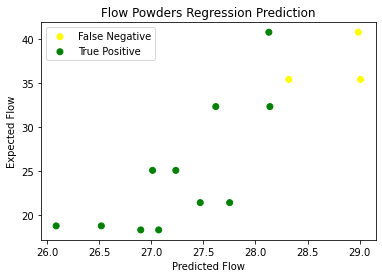

R:  85.118 %  R^2:  72.4507 %


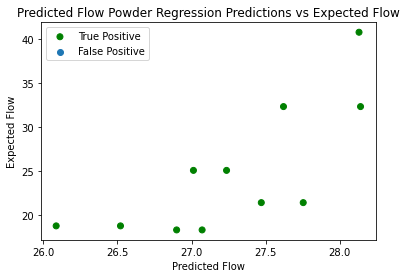

R:  75.6542 %  R^2:  57.2355 %


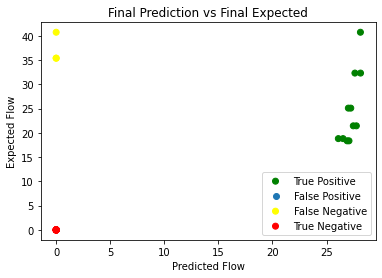

R:  62.326 %  R^2:  38.8453 %
powder dropped: 947
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2430
Epoch 2/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2224
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2220
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2205
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2201
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2182
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2178
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2164
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2166
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan          
Epoch 1/10
622/622 [=========================

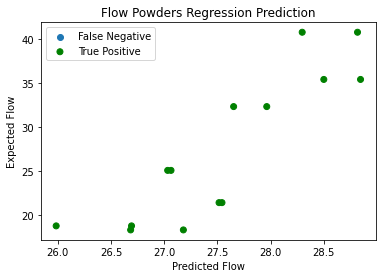

R:  87.3627 %  R^2:  76.3224 %


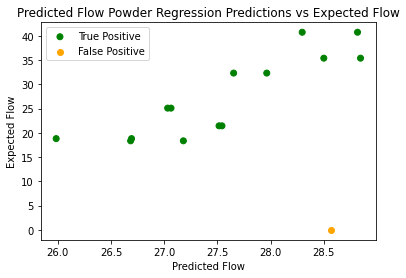

R:  42.8803 %  R^2:  18.3872 %


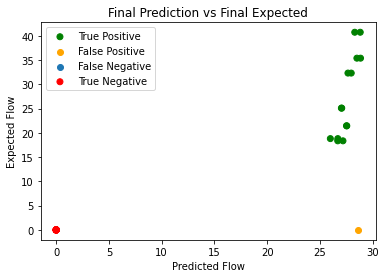

R:  87.5277 %  R^2:  76.6111 %
powder dropped: 7062
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2345A:
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2272
Epoch 3/10
1244/1244 [==============================] - 1s 990us/step - loss: 0.2248
Epoch 4/10
1244/1244 [==============================] - 1s 959us/step - loss: 0.2215
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2226
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2215
Epoch 7/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2199
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2190
Epoch 9/10
1244/1244 [==============================] - 1s 940us/step - loss: 0.2187
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan        
Epoch 1/10
622/622 [=================

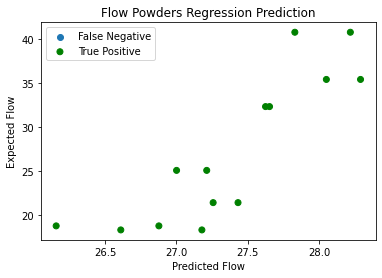

R:  85.7534 %  R^2:  73.5365 %


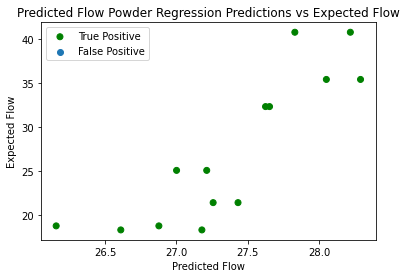

R:  85.7534 %  R^2:  73.5365 %


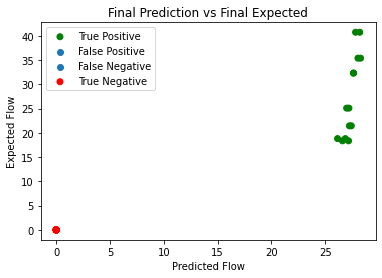

R:  93.5911 %  R^2:  87.5929 %
powder dropped: 5740
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2507A: 0s - loss:
Epoch 2/10
1244/1244 [==============================] - 1s 991us/step - loss: 0.2276
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2294
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2255
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2234
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2222
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2219A: 0s - loss: 0.22
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2210A: 
Epoch 9/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2209
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan          
Epoch 1

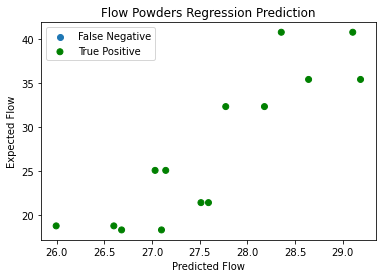

R:  88.2806 %  R^2:  77.9346 %


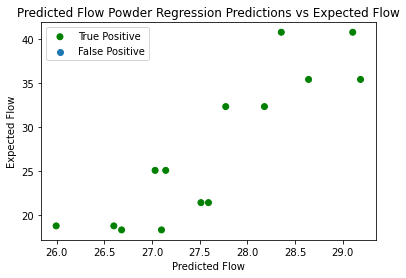

R:  88.2806 %  R^2:  77.9346 %


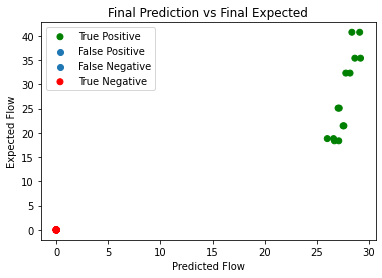

R:  94.1008 %  R^2:  88.5497 %
powder dropped: 878
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2407
Epoch 2/10
1244/1244 [==============================] - 1s 918us/step - loss: 0.2223
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2212
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2191
Epoch 5/10
1244/1244 [==============================] - 1s 930us/step - loss: 0.2187
Epoch 6/10
1244/1244 [==============================] - 1s 991us/step - loss: 0.2182
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2175
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2159
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2157
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan           
Epoch 1/10
622/622 [=================

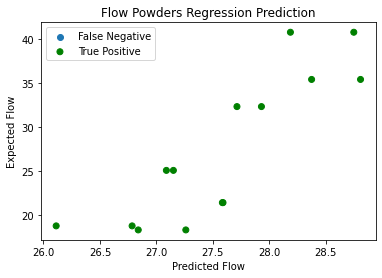

R:  85.874 %  R^2:  73.7434 %


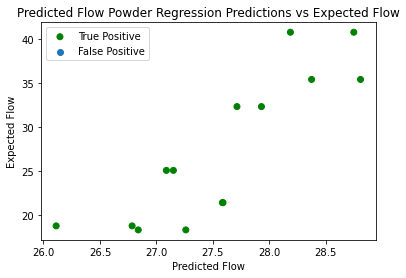

R:  85.874 %  R^2:  73.7434 %


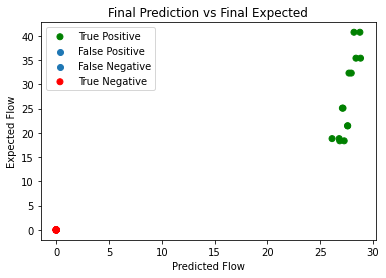

R:  93.8154 %  R^2:  88.0134 %
powder dropped: 570
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2280
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2198
Epoch 3/10
1244/1244 [==============================] - 1s 998us/step - loss: 0.2188
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2161
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2160
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2144
Epoch 7/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2148
Epoch 8/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2138A: 0s - loss: 0
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2125
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan            
Epoch 1/10
533/533 [=====

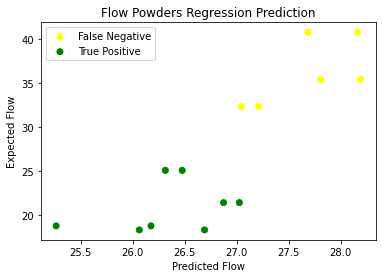

R:  84.7747 %  R^2:  71.8676 %


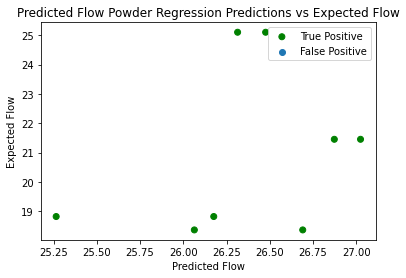

R:  31.6529 %  R^2:  10.0191 %


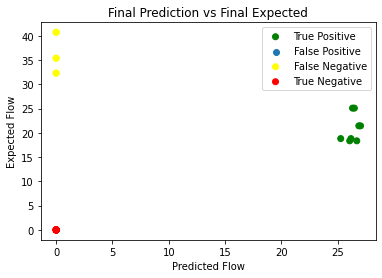

R:  33.1913 %  R^2:  11.0166 %
powder dropped: 1130
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2371A: 1s - loss: 0.2
Epoch 2/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2200
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2187
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2186A: 0s -
Epoch 5/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2168
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2166A: 0s - los
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2151A:
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2156
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2141
Epoch 10/10
622/622 [==============================] - 1s 2ms/step - loss: nan
Epoch 1/10
622/6

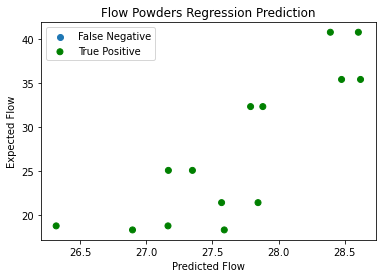

R:  83.82 %  R^2:  70.258 %


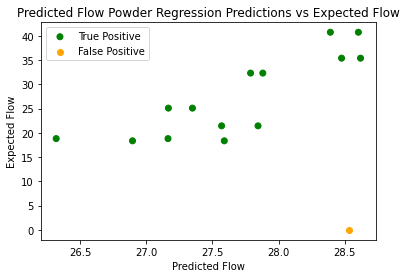

R:  39.3141 %  R^2:  15.456 %


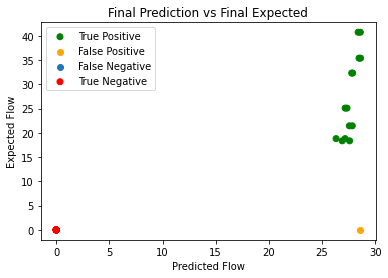

R:  87.3126 %  R^2:  76.2349 %
powder dropped: 2962
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 963us/step - loss: 0.2510
Epoch 2/10
1244/1244 [==============================] - 1s 973us/step - loss: 0.2149 0s - l
Epoch 3/10
1244/1244 [==============================] - 1s 988us/step - loss: 0.2148
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2121
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2119
Epoch 6/10
1244/1244 [==============================] - 1s 982us/step - loss: 0.2106
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2096
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2085
Epoch 9/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2078
Epoch 10/10
533/533 [==============================] - 1s 2ms/step - loss: nan
Epoch 1/10
533/533 [==================

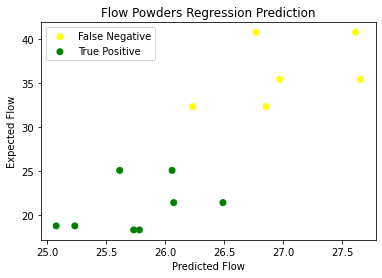

R:  84.303 %  R^2:  71.0699 %


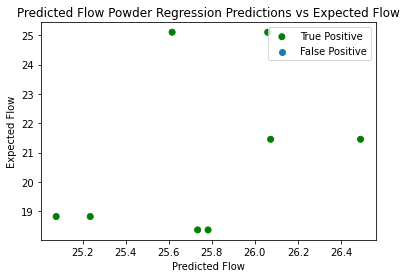

R:  40.5942 %  R^2:  16.4789 %


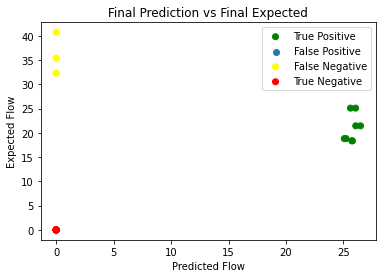

R:  33.2 %  R^2:  11.0224 %
powder dropped: 3512
1244/1244 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2312
Epoch 2/10
1244/1244 [==============================] - 1s 997us/step - loss: 0.2250
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2220
Epoch 4/10
1244/1244 [==============================] - ETA: 0s - loss: 0.221 - 1s 1ms/step - loss: 0.2212
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2199
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2190
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2188
Epoch 8/10
1244/1244 [==============================] - 1s 998us/step - loss: 0.2171
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2168A: 0s - loss: 0.218 - ETA: 
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan  

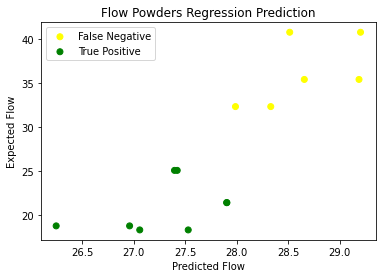

R:  85.5785 %  R^2:  73.2367 %


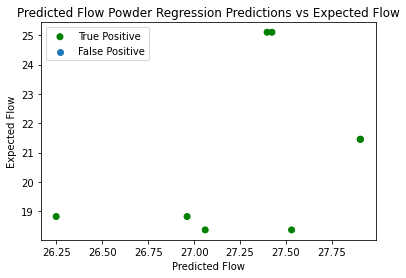

R:  41.206 %  R^2:  16.9794 %


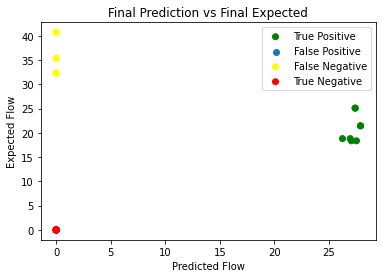

R:  33.2083 %  R^2:  11.0279 %
powder dropped: 4407
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2376
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2245
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2239
Epoch 4/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2217
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2199
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2213
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2191
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2181
Epoch 9/10
1244/1244 [==============================] - 1s 994us/step - loss: 0.2183 0s - loss: 0.
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan       
Epoch 1/10
622/622 [==========

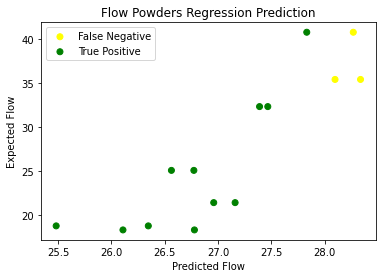

R:  87.3465 %  R^2:  76.2941 %


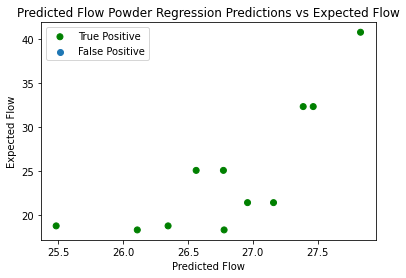

R:  79.4252 %  R^2:  63.0837 %


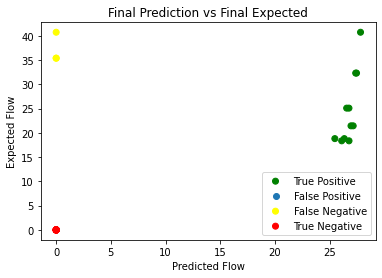

R:  62.3953 %  R^2:  38.9317 %
powder dropped: 5013
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2320
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2174
Epoch 3/10
1244/1244 [==============================] - 2s 1ms/step - loss: 0.2161
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2153
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2131A: 0s 
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2124
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2116
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2103
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2099
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan             
Epoch 1/10
533/533 [==============

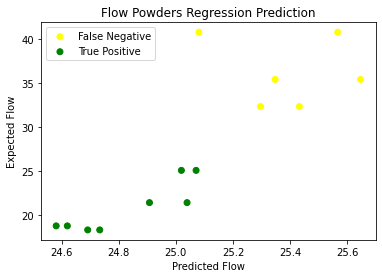

R:  84.825 %  R^2:  71.9528 %


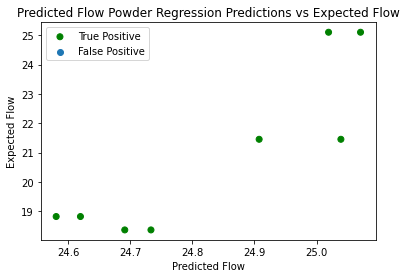

R:  87.9689 %  R^2:  77.3853 %


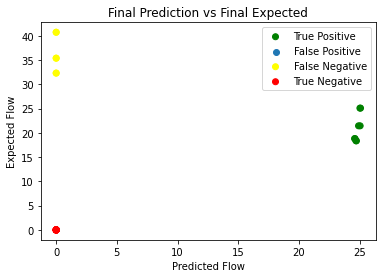

R:  33.203 %  R^2:  11.0244 %
powder dropped: 3100
1244/1244 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2310
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2243
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2239A: 0s - loss: 
Epoch 4/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2205
Epoch 5/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2193
Epoch 6/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2187
Epoch 7/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2171
Epoch 8/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2173
Epoch 9/10
1244/1244 [==============================] - 2s 2ms/step - loss: 0.2160
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan      
Epoch 1/10
533/533 [==============

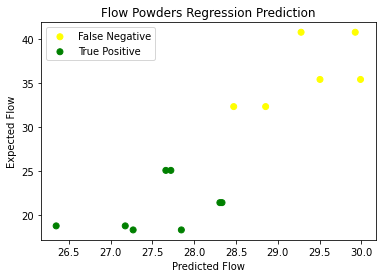

R:  87.265 %  R^2:  76.1518 %


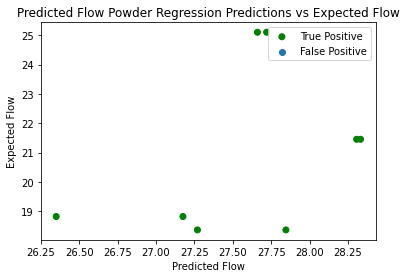

R:  40.3032 %  R^2:  16.2435 %


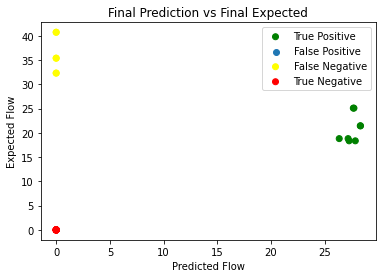

R:  33.2183 %  R^2:  11.0346 %
powder dropped: 497
1244/1244 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2381
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2239
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2206
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2211
Epoch 5/10
1244/1244 [==============================] - 1s 991us/step - loss: 0.2193
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2185
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2171
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2174
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2167
Epoch 10/10
533/533 [==============================] - 1s 1ms/step - loss: nan           
Epoch 1/10
533/533 [=====================

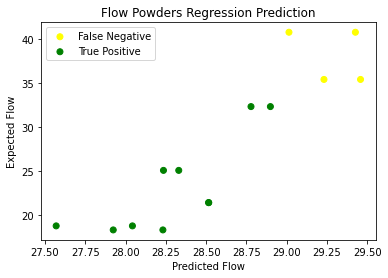

R:  89.4624 %  R^2:  80.0352 %


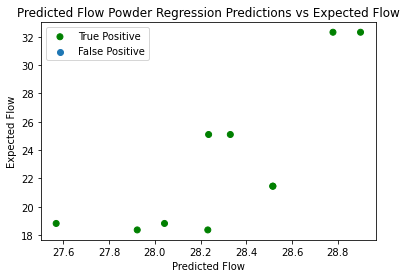

R:  79.5054 %  R^2:  63.2111 %


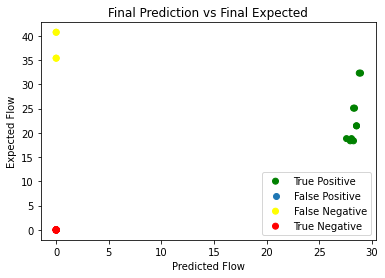

R:  50.0055 %  R^2:  25.0055 %
powder dropped: 4909
1244/1244 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2375
Epoch 2/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2266
Epoch 3/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2266
Epoch 4/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2251
Epoch 5/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2240
Epoch 6/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2236
Epoch 7/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2223
Epoch 8/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2208
Epoch 9/10
1244/1244 [==============================] - 1s 1ms/step - loss: 0.2206
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan          
Epoch 1/10
622/622 [=======================

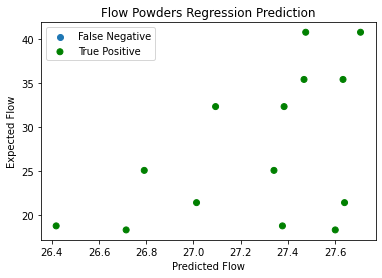

R:  49.4225 %  R^2:  24.4258 %


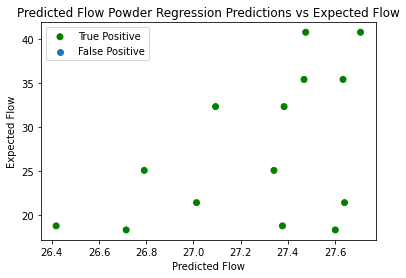

R:  49.4225 %  R^2:  24.4258 %


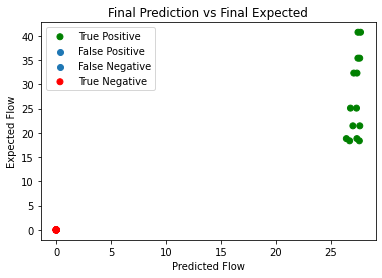

R:  93.0187 %  R^2:  86.5248 %


[[48.9796, 74.6561, 21.4217, 17.3897],
 [57.1429, 77.8829, 57.5204, 25.1746],
 [87.395, 77.5326, 77.8314, 71.0868],
 [100.0, 70.7192, 70.7192, 88.0392],
 [66.1654, 75.5205, 61.2544, 38.9031],
 [100.0, 76.1802, 76.1802, 89.0721],
 [48.9796, 69.3504, 27.026, 17.4606],
 [87.5, 67.8136, 18.4754, 76.1527],
 [48.9796, 72.8163, 23.7256, 17.4062],
 [41.5584, 77.3316, 20.019, 11.0324],
 [66.1654, 75.0399, 61.1397, 39.049],
 [28.5714, 77.9517, 66.5147, 7.291],
 [57.1429, 72.2087, 40.8709, 25.0798],
 [41.5584, 74.7244, 9.2507, 11.0075],
 [100.0, 76.8057, 76.8057, 88.243],
 [41.5584, 76.7124, 18.0956, 11.0216],
 [100.0, 75.6434, 75.6434, 88.3487],
 [76.1905, 73.3095, 65.8847, 51.4666],
 [76.1905, 69.8595, 61.3837, 51.3015],
 [66.1654, 73.1727, 58.8944, 38.7848],
 [66.1654, 75.045, 61.4528, 38.7982],
 [41.5584, 74.1356, 12.6443, 11.0176],
 [76.1905, 74.1814, 66.3893, 51.6813],
 [57.1429, 61.2962, 29.2717, 24.9678],
 [41.5584, 75.6453, 33.8942, 11.0377],
 [66.1654, 77.2602, 64.9707, 38.9984],
 [57.1

In [49]:
results = []
for i in range(5):
    plist = []
    for i in d.datalist:
        plist.append(i.sample(n=2842))
    for i in range(len(plist)):
        sublist = plist.copy()
        del sublist[i]
        print("powder dropped:", idlist[i])
        df = pd.concat(sublist)
        df = df.sample(frac=1)
    
        flowdf = df[df["Flow Class"] == 1]
        results.append(trymodel(df, flowdf, test))
results

1333/1333 [==============================] - 1s 458us/step - loss: nan     
Epoch 1/10
1333/1333 [==============================] - 1s 454us/step - loss: 0.2304
Epoch 2/10
1333/1333 [==============================] - 1s 452us/step - loss: 0.2251
Epoch 3/10
1333/1333 [==============================] - 1s 454us/step - loss: 0.2236
Epoch 4/10
1333/1333 [==============================] - 1s 437us/step - loss: 0.2218
Epoch 5/10
1333/1333 [==============================] - 1s 453us/step - loss: 0.2209
Epoch 6/10
1333/1333 [==============================] - 1s 461us/step - loss: 0.2186
Epoch 7/10
1333/1333 [==============================] - 1s 496us/step - loss: 0.2183
Epoch 8/10
1333/1333 [==============================] - 1s 479us/step - loss: 0.2183
Epoch 9/10
1333/1333 [==============================] - 1s 447us/step - loss: 0.2171
Epoch 10/10
622/622 [==============================] - 0s 448us/step - loss: nan                      
Epoch 1/10
622/622 [==============================] - 0s

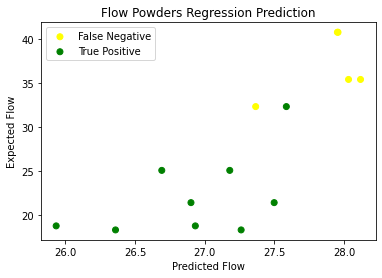

R:  80.8696 %  R^2:  65.399 %


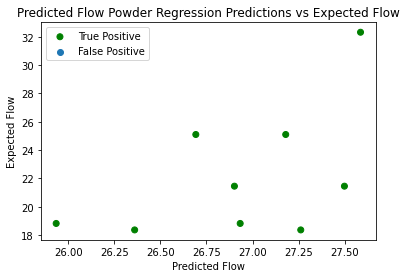

R:  52.8958 %  R^2:  27.9797 %


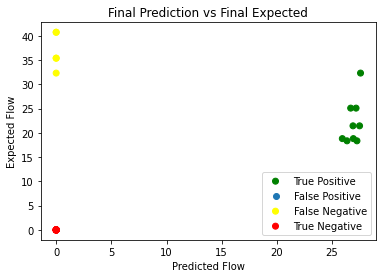

R:  41.757 %  R^2:  17.4364 %
1333/1333 [==============================] - 1s 438us/step - loss: nan          
Epoch 1/10
1333/1333 [==============================] - 1s 492us/step - loss: 0.2360
Epoch 2/10
1333/1333 [==============================] - 1s 495us/step - loss: 0.2240
Epoch 3/10
1333/1333 [==============================] - 1s 439us/step - loss: 0.2213
Epoch 4/10
1333/1333 [==============================] - 1s 443us/step - loss: 0.2216
Epoch 5/10
1333/1333 [==============================] - 1s 442us/step - loss: 0.2199
Epoch 6/10
1333/1333 [==============================] - 1s 462us/step - loss: 0.2186
Epoch 7/10
1333/1333 [==============================] - 1s 514us/step - loss: 0.2182
Epoch 8/10
1333/1333 [==============================] - 1s 462us/step - loss: 0.2177
Epoch 9/10
1333/1333 [==============================] - 1s 437us/step - loss: 0.2169
Epoch 10/10
622/622 [==============================] - 0s 430us/step - loss: nan                    
Epoch 1/10
622/622 [===

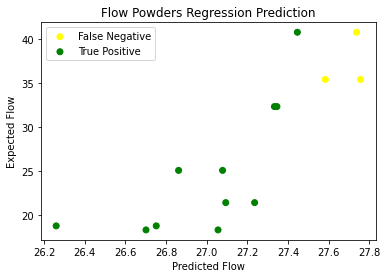

R:  83.3163 %  R^2:  69.4161 %


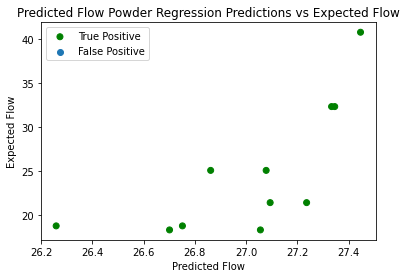

R:  72.1007 %  R^2:  51.9851 %


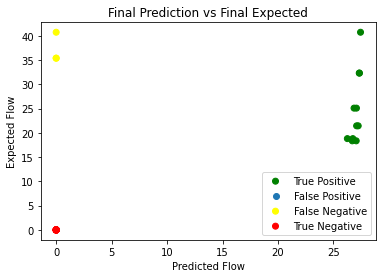

R:  62.0523 %  R^2:  38.5049 %
1333/1333 [==============================] - 1s 474us/step - loss: nan       
Epoch 1/10
1333/1333 [==============================] - 1s 442us/step - loss: 0.2323
Epoch 2/10
1333/1333 [==============================] - 1s 479us/step - loss: 0.2222
Epoch 3/10
1333/1333 [==============================] - 1s 452us/step - loss: 0.2228
Epoch 4/10
1333/1333 [==============================] - 1s 491us/step - loss: 0.2206
Epoch 5/10
1333/1333 [==============================] - 1s 531us/step - loss: 0.2196
Epoch 6/10
1333/1333 [==============================] - 1s 533us/step - loss: 0.2182
Epoch 7/10
1333/1333 [==============================] - 1s 484us/step - loss: 0.2172
Epoch 8/10
1333/1333 [==============================] - 1s 502us/step - loss: 0.2164
Epoch 9/10
1333/1333 [==============================] - 1s 508us/step - loss: 0.2158
Epoch 10/10
622/622 [==============================] - 0s 505us/step - loss: nan                    
Epoch 1/10
622/622 [=====

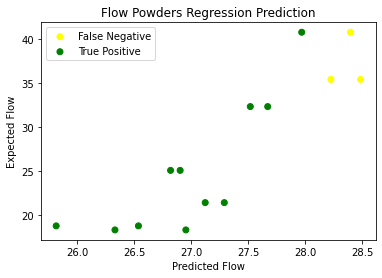

R:  88.3446 %  R^2:  78.0477 %


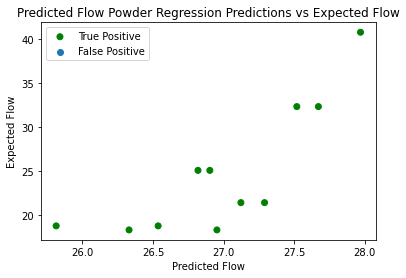

R:  81.5128 %  R^2:  66.4433 %


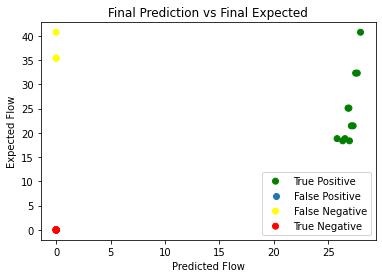

R:  62.3626 %  R^2:  38.891 %
1333/1333 [==============================] - 1s 447us/step - loss: nan        
Epoch 1/10
1333/1333 [==============================] - 1s 482us/step - loss: 0.2300
Epoch 2/10
1333/1333 [==============================] - 1s 466us/step - loss: 0.2221
Epoch 3/10
1333/1333 [==============================] - 1s 611us/step - loss: 0.2201
Epoch 4/10
1333/1333 [==============================] - 1s 583us/step - loss: 0.2186
Epoch 5/10
1333/1333 [==============================] - 1s 634us/step - loss: 0.2179
Epoch 6/10
1333/1333 [==============================] - 1s 627us/step - loss: 0.2173
Epoch 7/10
1333/1333 [==============================] - 1s 597us/step - loss: 0.2170
Epoch 8/10
1333/1333 [==============================] - 1s 585us/step - loss: 0.2163
Epoch 9/10
1333/1333 [==============================] - 1s 563us/step - loss: 0.2156
Epoch 10/10
622/622 [==============================] - 0s 633us/step - loss: nan                    
Epoch 1/10
622/622 [=====

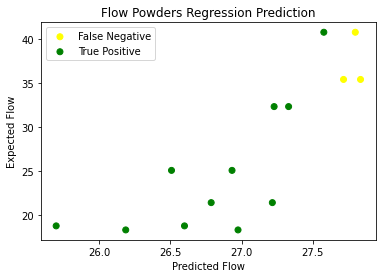

R:  82.2367 %  R^2:  67.6288 %


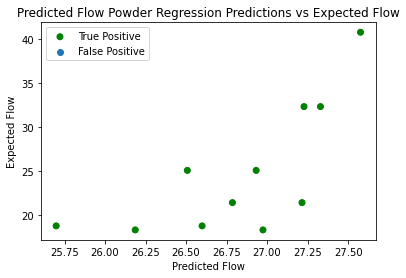

R:  71.306 %  R^2:  50.8454 %


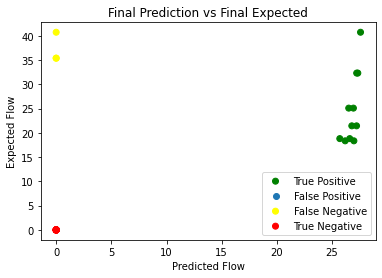

R:  62.2219 %  R^2:  38.7157 %
1333/1333 [==============================] - 1s 522us/step - loss: nan      
Epoch 1/10
1333/1333 [==============================] - 1s 559us/step - loss: 0.2401
Epoch 2/10
1333/1333 [==============================] - 1s 581us/step - loss: 0.2230
Epoch 3/10
1333/1333 [==============================] - 1s 577us/step - loss: 0.2227
Epoch 4/10
1333/1333 [==============================] - 1s 586us/step - loss: 0.2214
Epoch 5/10
1333/1333 [==============================] - 1s 600us/step - loss: 0.2195
Epoch 6/10
1333/1333 [==============================] - 1s 585us/step - loss: 0.2193
Epoch 7/10
1333/1333 [==============================] - 1s 598us/step - loss: 0.2181
Epoch 8/10
1333/1333 [==============================] - 1s 570us/step - loss: 0.2173
Epoch 9/10
1333/1333 [==============================] - 1s 547us/step - loss: 0.2167
Epoch 10/10
622/622 [==============================] - 0s 477us/step - loss: nan                     
Epoch 1/10
622/622 [=====

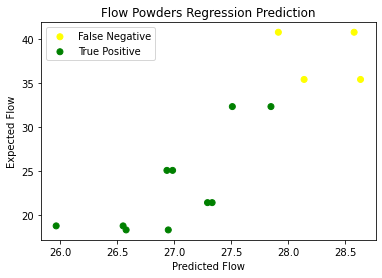

R:  87.6332 %  R^2:  76.7958 %


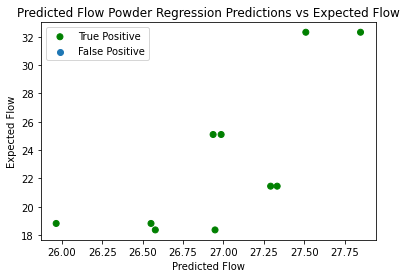

R:  75.5014 %  R^2:  57.0046 %


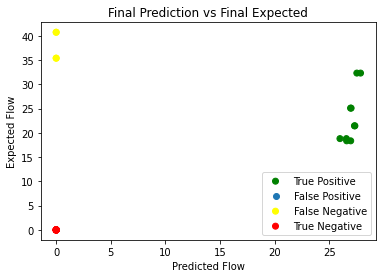

R:  50.0901 %  R^2:  25.0902 %


[[48.9796, 65.399, 27.9797, 17.4364],
 [66.1654, 69.4161, 51.9851, 38.5049],
 [66.1654, 78.0477, 66.4433, 38.891],
 [66.1654, 67.6288, 50.8454, 38.7157],
 [57.1429, 76.7958, 57.0046, 25.0902]]

In [24]:
results = []
for i in range(5):
    plist = []
    for i in d.datalist:
        plist.append(i.sample(n=2842))
    df = pd.concat(plist)
    df = df.sample(frac=1)
    flowdf = df[df["Flow Class"] == 1]
    results.append(trymodel(df, flowdf, test))
results

1333/1333 [==============================] - 1s 989us/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 1s 926us/step - loss: 0.2368
Epoch 2/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2237
Epoch 3/10
1333/1333 [==============================] - 1s 944us/step - loss: 0.2223
Epoch 4/10
1333/1333 [==============================] - 1s 970us/step - loss: 0.2212
Epoch 5/10
1333/1333 [==============================] - 1s 934us/step - loss: 0.2203
Epoch 6/10
1333/1333 [==============================] - 1s 909us/step - loss: 0.2192
Epoch 7/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2180
Epoch 8/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2174
Epoch 9/10
1333/1333 [==============================] - 1s 926us/step - loss: 0.2170
Epoch 10/10
622/622 [==============================] - 1s 988us/step - loss: nan       
Epoch 1/10
622/622 [==============================] - 1s 948us/step - loss: 418.53

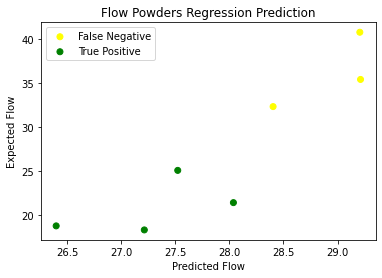

R:  90.3162 %  R^2:  81.5702 %


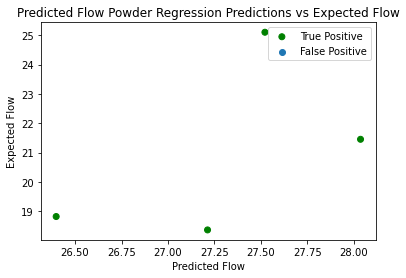

R:  53.9658 %  R^2:  29.1231 %


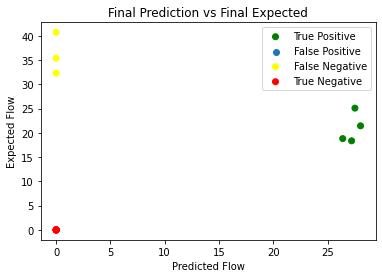

R:  33.2498 %  R^2:  11.0555 %
1333/1333 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 2s 1ms/step - loss: 0.2326A: 0s - loss:
Epoch 2/10
1333/1333 [==============================] - 1s 903us/step - loss: 0.2225 0s - loss: 0.
Epoch 3/10
1333/1333 [==============================] - 1s 902us/step - loss: 0.2210
Epoch 4/10
1333/1333 [==============================] - 1s 925us/step - loss: 0.2196
Epoch 5/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2192
Epoch 6/10
1333/1333 [==============================] - 2s 1ms/step - loss: 0.2177
Epoch 7/10
1333/1333 [==============================] - 1s 992us/step - loss: 0.2166
Epoch 8/10
1333/1333 [==============================] - 1s 972us/step - loss: 0.2166
Epoch 9/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2158
Epoch 10/10
622/622 [==============================] - 1s 939us/step - loss: nan          
Epoch 1/10
622/622 [=====

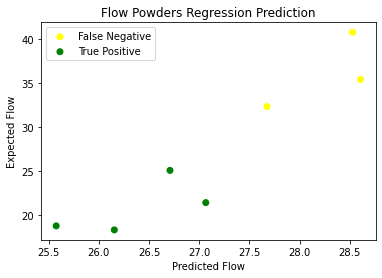

R:  93.3754 %  R^2:  87.1896 %


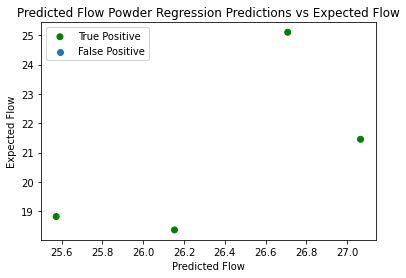

R:  66.1872 %  R^2:  43.8074 %


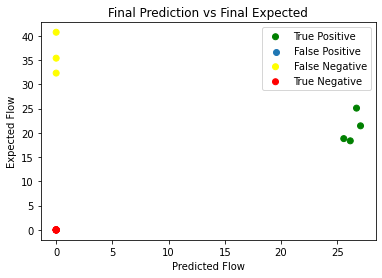

R:  33.2767 %  R^2:  11.0734 %
1333/1333 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 1s 903us/step - loss: 0.2331
Epoch 2/10
1333/1333 [==============================] - 1s 974us/step - loss: 0.2251
Epoch 3/10
1333/1333 [==============================] - 3s 2ms/step - loss: 0.2237
Epoch 4/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2223
Epoch 5/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2209
Epoch 6/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2200
Epoch 7/10
1333/1333 [==============================] - 1s 924us/step - loss: 0.2191
Epoch 8/10
1333/1333 [==============================] - 1s 967us/step - loss: 0.2185
Epoch 9/10
1333/1333 [==============================] - 1s 937us/step - loss: 0.2176
Epoch 10/10
622/622 [==============================] - 1s 964us/step - loss: nan     
Epoch 1/10
622/622 [==============================] - 1s 

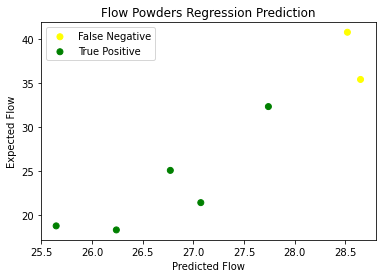

R:  93.4289 %  R^2:  87.2896 %


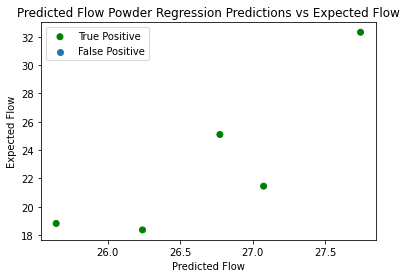

R:  86.0791 %  R^2:  74.0961 %


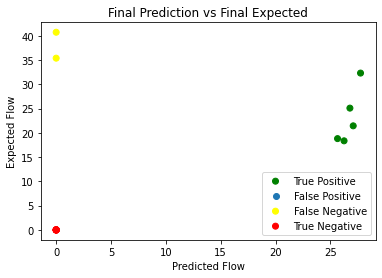

R:  50.2907 %  R^2:  25.2915 %
1333/1333 [==============================] - 1s 996us/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 1s 963us/step - loss: 0.2305
Epoch 2/10
1333/1333 [==============================] - 1s 1000us/step - loss: 0.22280s - l
Epoch 3/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2201
Epoch 4/10
1333/1333 [==============================] - 1s 951us/step - loss: 0.2194
Epoch 5/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2187
Epoch 6/10
1333/1333 [==============================] - 1s 922us/step - loss: 0.2179
Epoch 7/10
1333/1333 [==============================] - 1s 958us/step - loss: 0.2169 0s - los
Epoch 8/10
1333/1333 [==============================] - 1s 966us/step - loss: 0.2161
Epoch 9/10
1333/1333 [==============================] - 1s 934us/step - loss: 0.2158
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan        
Epoch 1/10
622/622 [==============

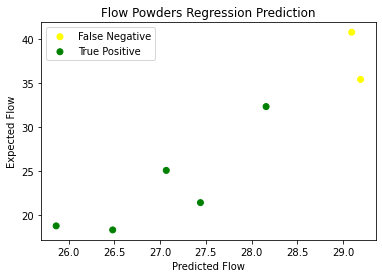

R:  93.7127 %  R^2:  87.8207 %


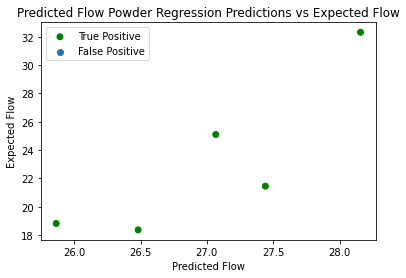

R:  85.8987 %  R^2:  73.7858 %


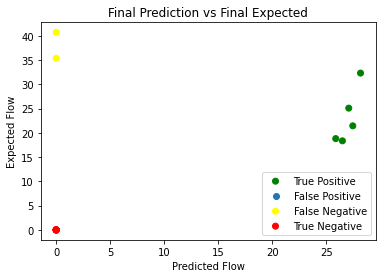

R:  50.3348 %  R^2:  25.336 %
1333/1333 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 2s 1ms/step - loss: 0.2467
Epoch 2/10
1333/1333 [==============================] - 2s 1ms/step - loss: 0.2246
Epoch 3/10
1333/1333 [==============================] - 1s 902us/step - loss: 0.2221
Epoch 4/10
1333/1333 [==============================] - 1s 961us/step - loss: 0.2221
Epoch 5/10
1333/1333 [==============================] - 1s 924us/step - loss: 0.2202
Epoch 6/10
1333/1333 [==============================] - 1s 962us/step - loss: 0.2198
Epoch 7/10
1333/1333 [==============================] - 2s 1ms/step - loss: 0.2182
Epoch 8/10
1333/1333 [==============================] - 1s 962us/step - loss: 0.2176 0s - lo
Epoch 9/10
1333/1333 [==============================] - 1s 917us/step - loss: 0.2173
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan          
Epoch 1/10
622/622 [=========================

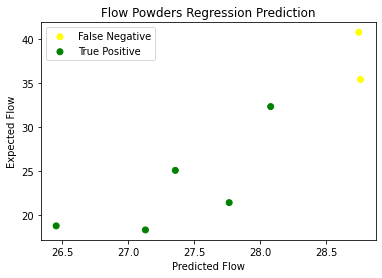

R:  90.4974 %  R^2:  81.8978 %


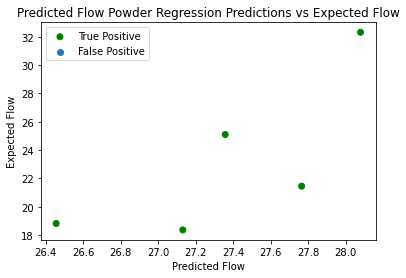

R:  76.1442 %  R^2:  57.9794 %


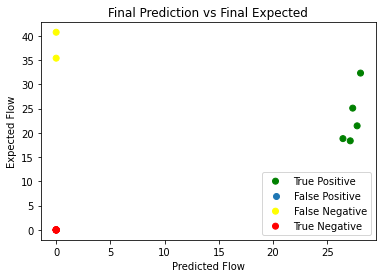

R:  50.1166 %  R^2:  25.1167 %


[[41.5584, 81.5702, 29.1231, 11.0555],
 [41.5584, 87.1896, 43.8074, 11.0734],
 [57.1429, 87.2896, 74.0961, 25.2915],
 [57.1429, 87.8207, 73.7858, 25.336],
 [57.1429, 81.8978, 57.9794, 25.1167]]

In [28]:
results = []
for i in range(5):
    plist = []
    for i in d.datalist:
        plist.append(i.sample(n=2842))
    df = pd.concat(plist)
    df = df.sample(frac=1)
    flowdf = df[df["Flow Class"] == 1]
    results.append(trymodel(df, flowdf, median))
results

1333/1333 [==============================] - 1s 943us/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 1s 847us/step - loss: 0.2404
Epoch 2/10
1333/1333 [==============================] - 1s 920us/step - loss: 0.2249
Epoch 3/10
1333/1333 [==============================] - 1s 968us/step - loss: 0.2238
Epoch 4/10
1333/1333 [==============================] - 1s 863us/step - loss: 0.2231
Epoch 5/10
1333/1333 [==============================] - 1s 909us/step - loss: 0.2186
Epoch 6/10
1333/1333 [==============================] - 1s 903us/step - loss: 0.2209
Epoch 7/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2187
Epoch 8/10
1333/1333 [==============================] - 1s 968us/step - loss: 0.2178
Epoch 9/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2176
Epoch 10/10
622/622 [==============================] - 1s 1ms/step - loss: nan         
Epoch 1/10
622/622 [==============================] - ETA: 0s - loss: 431.071 - 

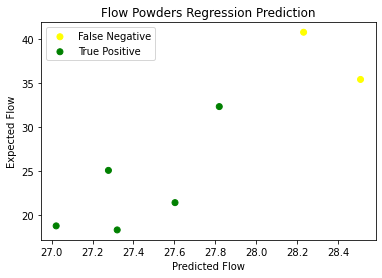

R:  87.9574 %  R^2:  77.365 %


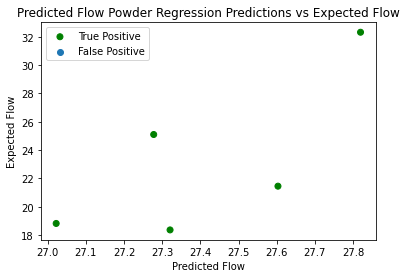

R:  74.3015 %  R^2:  55.2071 %


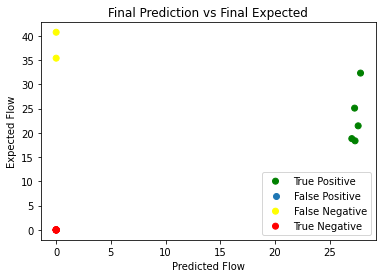

R:  49.9308 %  R^2:  24.9308 %
1333/1333 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 1s 975us/step - loss: 0.2370
Epoch 2/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2229
Epoch 3/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2209
Epoch 4/10
1333/1333 [==============================] - 1s 973us/step - loss: 0.2210 0s - loss:
Epoch 5/10
1333/1333 [==============================] - 1s 940us/step - loss: 0.2191
Epoch 6/10
1333/1333 [==============================] - 1s 935us/step - loss: 0.2186
Epoch 7/10
1333/1333 [==============================] - 1s 935us/step - loss: 0.2181
Epoch 8/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2172
Epoch 9/10
1333/1333 [==============================] - 1s 998us/step - loss: 0.2164
Epoch 10/10
622/622 [==============================] - 1s 953us/step - loss: nan          
Epoch 1/10
622/622 [===================

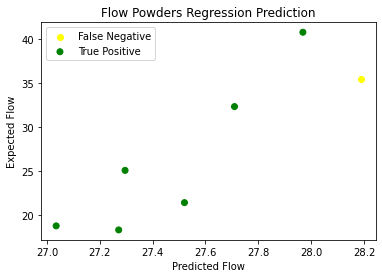

R:  88.5695 %  R^2:  78.4455 %


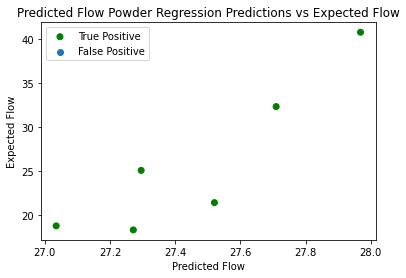

R:  90.4686 %  R^2:  81.8456 %


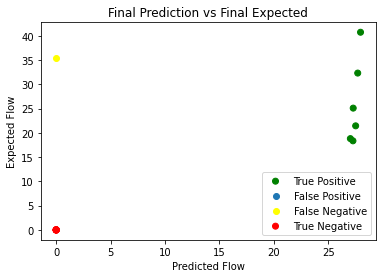

R:  74.0289 %  R^2:  54.8028 %
1333/1333 [==============================] - 1s 997us/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 1s 982us/step - loss: 0.2377
Epoch 2/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2247
Epoch 3/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2231
Epoch 4/10
1333/1333 [==============================] - 1s 969us/step - loss: 0.2216 0s -  - ETA: 0s - loss: 0.22
Epoch 5/10
1333/1333 [==============================] - 1s 940us/step - loss: 0.2204 0s - loss: 0.220
Epoch 6/10
1333/1333 [==============================] - 1s 947us/step - loss: 0.2194
Epoch 7/10
1333/1333 [==============================] - 1s 963us/step - loss: 0.2180
Epoch 8/10
1333/1333 [==============================] - 1s 999us/step - loss: 0.2174
Epoch 9/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2178A: 
Epoch 10/10
622/622 [==============================] - 1s 914us/step - loss: nan          

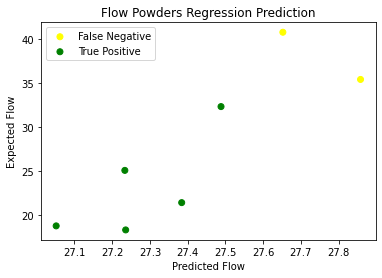

R:  85.4761 %  R^2:  73.0617 %


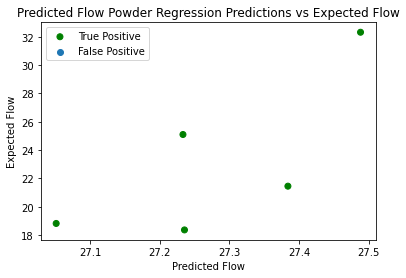

R:  74.3514 %  R^2:  55.2813 %


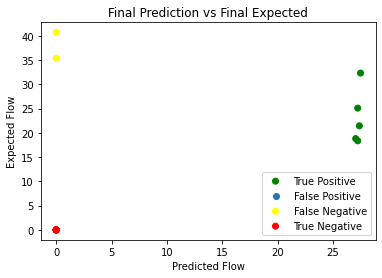

R:  49.849 %  R^2:  24.8492 %
1333/1333 [==============================] - 2s 1ms/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 1s 891us/step - loss: 0.2331
Epoch 2/10
1333/1333 [==============================] - 1s 793us/step - loss: 0.2215 0
Epoch 3/10
1333/1333 [==============================] - 1s 921us/step - loss: 0.2196
Epoch 4/10
1333/1333 [==============================] - 1s 1ms/step - loss: 0.2196
Epoch 5/10
1333/1333 [==============================] - 1s 967us/step - loss: 0.2182
Epoch 6/10
1333/1333 [==============================] - 1s 890us/step - loss: 0.2172
Epoch 7/10
1333/1333 [==============================] - 1s 978us/step - loss: 0.2168
Epoch 8/10
1333/1333 [==============================] - 1s 934us/step - loss: 0.2159
Epoch 9/10
1333/1333 [==============================] - 1s 911us/step - loss: 0.2154
Epoch 10/10
622/622 [==============================] - 1s 2ms/step - loss: nan
Epoch 1/10
622/622 [==============================] - 1s 

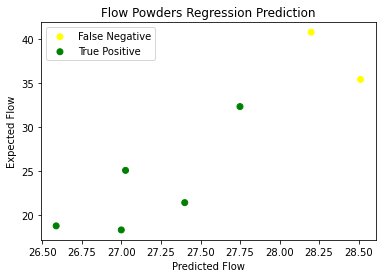

R:  89.4073 %  R^2:  79.9367 %


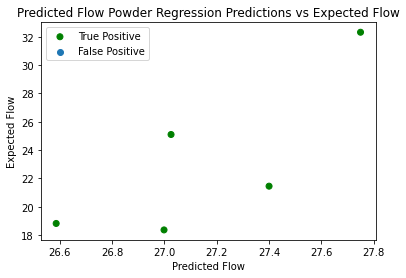

R:  78.7693 %  R^2:  62.046 %


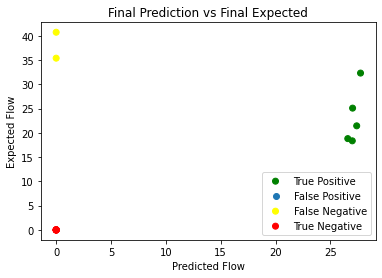

R:  50.0242 %  R^2:  25.0242 %
1333/1333 [==============================] - 1s 953us/step - loss: nan
Epoch 1/10
1333/1333 [==============================] - 1s 860us/step - loss: 0.2410
Epoch 2/10
1333/1333 [==============================] - 1s 904us/step - loss: 0.2256
Epoch 3/10
1333/1333 [==============================] - 1s 862us/step - loss: 0.2231
Epoch 4/10
1333/1333 [==============================] - 1s 827us/step - loss: 0.2222
Epoch 5/10
1333/1333 [==============================] - 1s 954us/step - loss: 0.2210
Epoch 6/10
1333/1333 [==============================] - 1s 825us/step - loss: 0.2190
Epoch 7/10
1333/1333 [==============================] - 1s 903us/step - loss: 0.2190
Epoch 8/10
1333/1333 [==============================] - 1s 867us/step - loss: 0.2180
Epoch 9/10
1333/1333 [==============================] - 1s 860us/step - loss: 0.2172
Epoch 10/10
622/622 [==============================] - 1s 916us/step - loss: nan          
Epoch 1/10
622/622 [======================

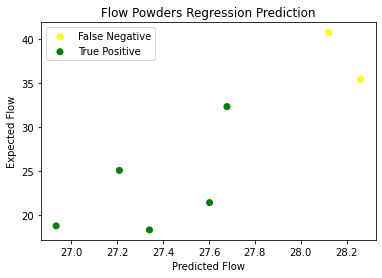

R:  85.491 %  R^2:  73.0871 %


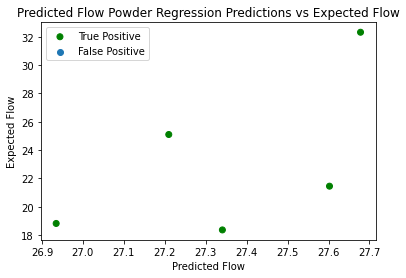

R:  59.7989 %  R^2:  35.759 %


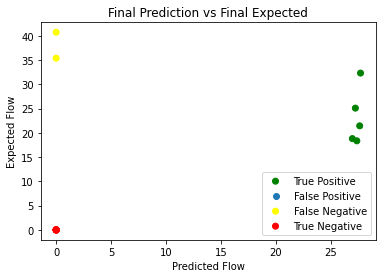

R:  49.8918 %  R^2:  24.892 %


[[57.1429, 77.365, 55.2071, 24.9308],
 [76.1905, 78.4455, 81.8456, 54.8028],
 [57.1429, 73.0617, 55.2813, 24.8492],
 [57.1429, 79.9367, 62.046, 25.0242],
 [57.1429, 73.0871, 35.759, 24.892]]

In [29]:
results = []
for i in range(5):
    plist = []
    for i in d.datalist:
        plist.append(i.sample(n=2842))
    df = pd.concat(plist)
    df = df.sample(frac=1)
    flowdf = df[df["Flow Class"] == 1]
    results.append(trymodel(df, flowdf, mean))
results

2344/2344 [==============================] - 1s 439us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 1s 440us/step - loss: 0.2326
Epoch 2/10
2344/2344 [==============================] - 1s 443us/step - loss: 0.2231
Epoch 3/10
2344/2344 [==============================] - 1s 441us/step - loss: 0.2208
Epoch 4/10
2344/2344 [==============================] - 1s 439us/step - loss: 0.2192
Epoch 5/10
2344/2344 [==============================] - 1s 431us/step - loss: 0.2180
Epoch 6/10
2344/2344 [==============================] - 1s 417us/step - loss: 0.2173
Epoch 7/10
2344/2344 [==============================] - 1s 436us/step - loss: 0.2168
Epoch 8/10
2344/2344 [==============================] - 1s 438us/step - loss: 0.2164
Epoch 9/10
2344/2344 [==============================] - 1s 415us/step - loss: 0.2162
Epoch 10/10
1094/1094 [==============================] - 0s 449us/step - loss: nan              
Epoch 1/10
1094/1094 [==============================] - 1s 487us/st

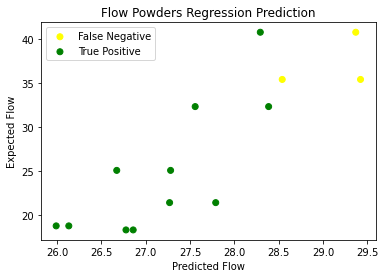

R:  85.8892 %  R^2:  73.7696 %


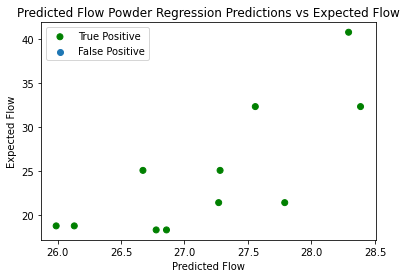

R:  77.4824 %  R^2:  60.0352 %


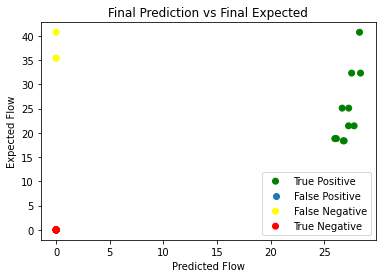

R:  62.4788 %  R^2:  39.036 %
2344/2344 [==============================] - 1s 447us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 1s 495us/step - loss: 0.2310
Epoch 2/10
2344/2344 [==============================] - 1s 455us/step - loss: 0.2235
Epoch 3/10
2344/2344 [==============================] - 1s 429us/step - loss: 0.2214
Epoch 4/10
2344/2344 [==============================] - 1s 423us/step - loss: 0.2193
Epoch 5/10
2344/2344 [==============================] - 1s 438us/step - loss: 0.2178
Epoch 6/10
2344/2344 [==============================] - 1s 456us/step - loss: 0.2169
Epoch 7/10
2344/2344 [==============================] - 1s 418us/step - loss: 0.2162
Epoch 8/10
2344/2344 [==============================] - 1s 433us/step - loss: 0.2160
Epoch 9/10
2344/2344 [==============================] - 1s 433us/step - loss: 0.2157
Epoch 10/10
1094/1094 [==============================] - 0s 446us/step - loss: nan             
Epoch 1/10
1094/1094 [================

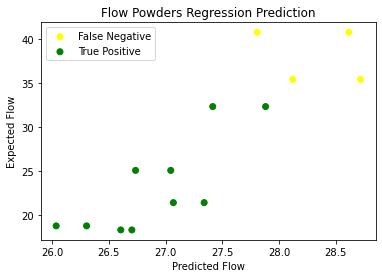

R:  87.9691 %  R^2:  77.3857 %


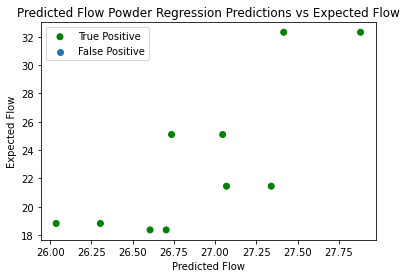

R:  79.3858 %  R^2:  63.021 %


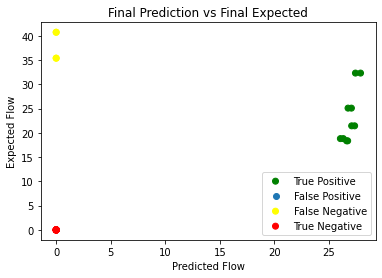

R:  50.1154 %  R^2:  25.1155 %
2344/2344 [==============================] - 1s 468us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 1s 480us/step - loss: 0.2368
Epoch 2/10
2344/2344 [==============================] - 1s 480us/step - loss: 0.2236
Epoch 3/10
2344/2344 [==============================] - 1s 469us/step - loss: 0.2208
Epoch 4/10
2344/2344 [==============================] - 1s 492us/step - loss: 0.2186
Epoch 5/10
2344/2344 [==============================] - 1s 458us/step - loss: 0.2175
Epoch 6/10
2344/2344 [==============================] - 1s 507us/step - loss: 0.2166
Epoch 7/10
2344/2344 [==============================] - 1s 514us/step - loss: 0.2162
Epoch 8/10
2344/2344 [==============================] - 1s 483us/step - loss: 0.2156
Epoch 9/10
2344/2344 [==============================] - 1s 470us/step - loss: 0.2154
Epoch 10/10
1094/1094 [==============================] - 1s 509us/step - loss: nan            
Epoch 1/10
1094/1094 [================

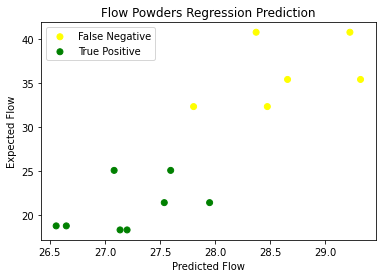

R:  86.3665 %  R^2:  74.5917 %


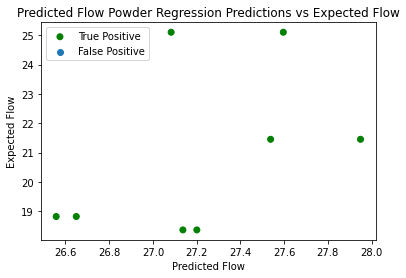

R:  46.525 %  R^2:  21.6457 %


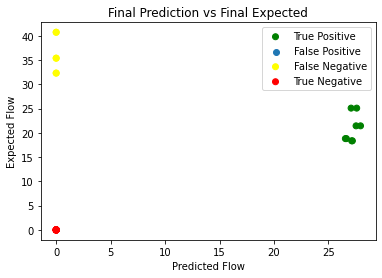

R:  33.2087 %  R^2:  11.0282 %
2344/2344 [==============================] - 1s 477us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 1s 447us/step - loss: 0.2302
Epoch 2/10
2344/2344 [==============================] - 1s 456us/step - loss: 0.2224
Epoch 3/10
2344/2344 [==============================] - 1s 449us/step - loss: 0.2198
Epoch 4/10
2344/2344 [==============================] - 1s 449us/step - loss: 0.2180
Epoch 5/10
2344/2344 [==============================] - 1s 449us/step - loss: 0.2168
Epoch 6/10
2344/2344 [==============================] - 1s 471us/step - loss: 0.2158
Epoch 7/10
2344/2344 [==============================] - 1s 490us/step - loss: 0.2153
Epoch 8/10
2344/2344 [==============================] - 1s 486us/step - loss: 0.2147
Epoch 9/10
2344/2344 [==============================] - 1s 494us/step - loss: 0.2145
Epoch 10/10
1094/1094 [==============================] - 1s 505us/step - loss: nan            
Epoch 1/10
1094/1094 [================

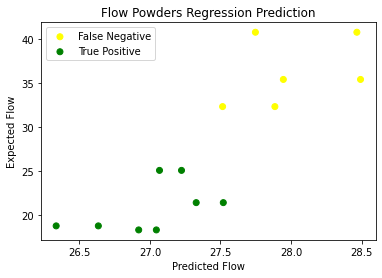

R:  85.0115 %  R^2:  72.2696 %


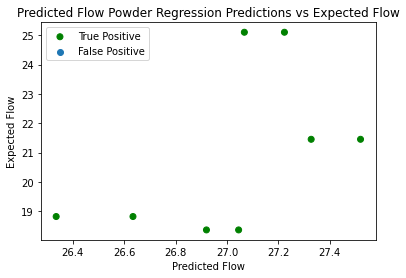

R:  51.3379 %  R^2:  26.3558 %


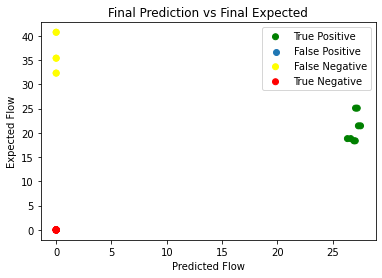

R:  33.2021 %  R^2:  11.0238 %
2344/2344 [==============================] - 1s 460us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 1s 477us/step - loss: 0.2276
Epoch 2/10
2344/2344 [==============================] - 1s 484us/step - loss: 0.2205
Epoch 3/10
2344/2344 [==============================] - 1s 479us/step - loss: 0.2187
Epoch 4/10
2344/2344 [==============================] - 1s 474us/step - loss: 0.2174
Epoch 5/10
2344/2344 [==============================] - 1s 487us/step - loss: 0.2165
Epoch 6/10
2344/2344 [==============================] - 1s 502us/step - loss: 0.2158
Epoch 7/10
2344/2344 [==============================] - 1s 503us/step - loss: 0.2153
Epoch 8/10
2344/2344 [==============================] - 1s 453us/step - loss: 0.2150
Epoch 9/10
2344/2344 [==============================] - 1s 469us/step - loss: 0.2147
Epoch 10/10
1094/1094 [==============================] - 0s 445us/step - loss: nan             
Epoch 1/10
1094/1094 [===============

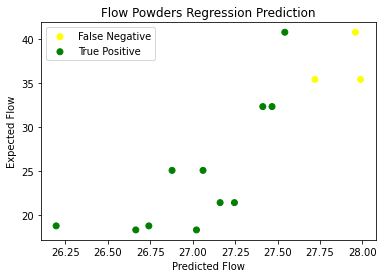

R:  85.2633 %  R^2:  72.6984 %


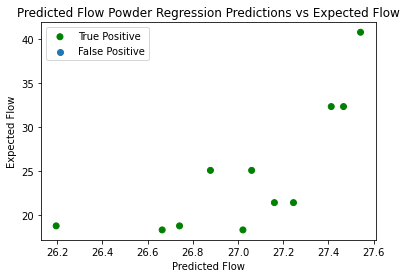

R:  75.4085 %  R^2:  56.8644 %


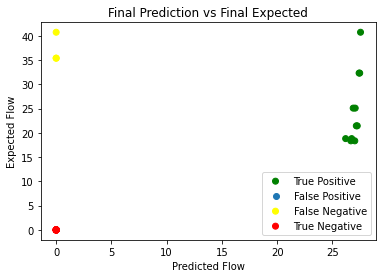

R:  62.1135 %  R^2:  38.5808 %


[[66.1654, 73.7696, 60.0352, 39.036],
 [57.1429, 77.3857, 63.021, 25.1155],
 [41.5584, 74.5917, 21.6457, 11.0282],
 [41.5584, 72.2696, 26.3558, 11.0238],
 [66.1654, 72.6984, 56.8644, 38.5808]]

In [26]:
results = []
for i in range(5):
    plist = []
    for i in d.datalist:
        plist.append(i.sample(n=5000, replace = True))
    df = pd.concat(plist)
    df = df.sample(frac=1)
    flowdf = df[df["Flow Class"] == 1]
    results.append(trymodel(df, flowdf, test))
results

2344/2344 [==============================] - 2s 959us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 2s 915us/step - loss: 0.2297
Epoch 2/10
2344/2344 [==============================] - 2s 921us/step - loss: 0.2236
Epoch 3/10
2344/2344 [==============================] - 2s 890us/step - loss: 0.2201
Epoch 4/10
2344/2344 [==============================] - 2s 918us/step - loss: 0.2191
Epoch 5/10
2344/2344 [==============================] - 2s 1ms/step - loss: 0.2179
Epoch 6/10
2344/2344 [==============================] - 2s 947us/step - loss: 0.2168
Epoch 7/10
2344/2344 [==============================] - 2s 912us/step - loss: 0.2158
Epoch 8/10
2344/2344 [==============================] - 2s 905us/step - loss: 0.2154 0s - lo
Epoch 9/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2151A: 0s - lo
Epoch 10/10
1094/1094 [==============================] - 1s 977us/step - loss: nan
Epoch 1/10
1094/1094 [==============================] - 1s 953us/st

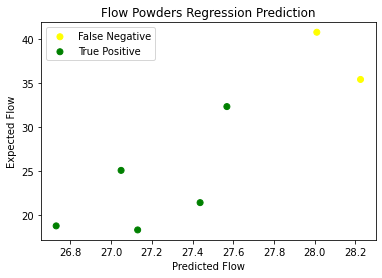

R:  86.5173 %  R^2:  74.8524 %


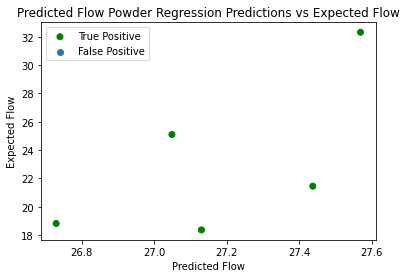

R:  66.3096 %  R^2:  43.9697 %


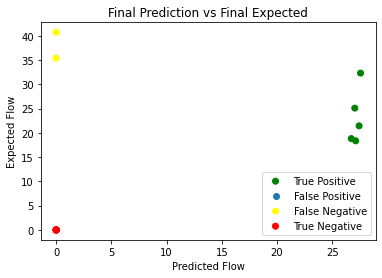

R:  49.924 %  R^2:  24.924 %
2344/2344 [==============================] - 3s 1ms/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 2s 1ms/step - loss: 0.2263A: 0s - loss: 
Epoch 2/10
2344/2344 [==============================] - 2s 954us/step - loss: 0.2211
Epoch 3/10
2344/2344 [==============================] - 2s 1ms/step - loss: 0.2187
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2177
Epoch 5/10
2344/2344 [==============================] - 2s 879us/step - loss: 0.2166
Epoch 6/10
2344/2344 [==============================] - 2s 911us/step - loss: 0.2160 1s  
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2158A: 0s - loss: 0.215
Epoch 8/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2154
Epoch 9/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2152
Epoch 10/10
1094/1094 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1094/1094 [========

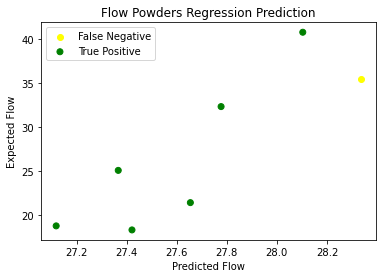

R:  86.0721 %  R^2:  74.0841 %


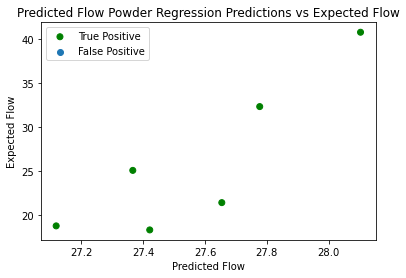

R:  87.2724 %  R^2:  76.1647 %


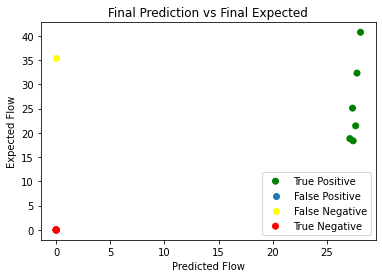

R:  74.0235 %  R^2:  54.7948 %
2344/2344 [==============================] - 2s 980us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2310
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2220
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2195
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2183
Epoch 5/10
2344/2344 [==============================] - 2s 996us/step - loss: 0.2165
Epoch 6/10
2344/2344 [==============================] - 2s 963us/step - loss: 0.2157
Epoch 7/10
2344/2344 [==============================] - 2s 949us/step - loss: 0.2152 0s - loss: - ETA: 0s - lo
Epoch 8/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2146
Epoch 9/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2142A: 0s - 
Epoch 10/10
1094/1094 [==============================] - 1s 962us/step - loss: nan
Epoch 1/10
1094/1094 [======

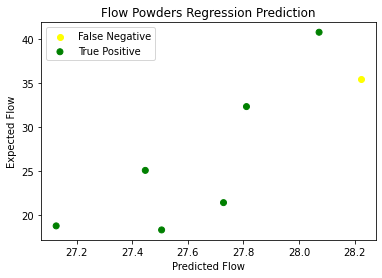

R:  84.413 %  R^2:  71.2556 %


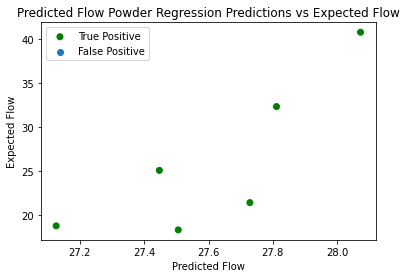

R:  82.6111 %  R^2:  68.2459 %


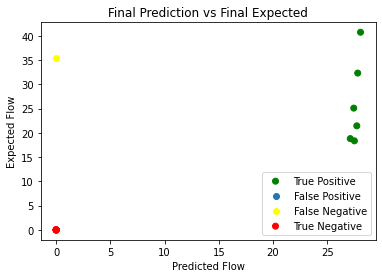

R:  73.9774 %  R^2:  54.7266 %
2344/2344 [==============================] - 3s 1ms/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 2s 999us/step - loss: 0.2287 0s - loss: 
Epoch 2/10
2344/2344 [==============================] - 2s 969us/step - loss: 0.2232
Epoch 3/10
2344/2344 [==============================] - 2s 1ms/step - loss: 0.2211A: 0s - loss: 0.22
Epoch 4/10
2344/2344 [==============================] - 2s 994us/step - loss: 0.2195
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2181A: 
Epoch 6/10
2344/2344 [==============================] - 2s 987us/step - loss: 0.2170
Epoch 7/10
2344/2344 [==============================] - 2s 988us/step - loss: 0.2167
Epoch 8/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.2159
Epoch 9/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.2159
Epoch 10/10
1094/1094 [==============================] - 1s 950us/step - loss: nan
Epoch 1/10
1094/1094 [=====

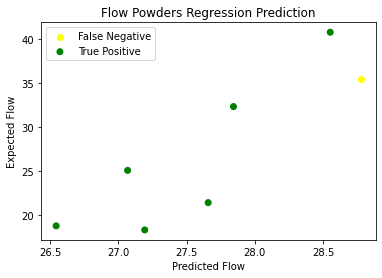

R:  87.0462 %  R^2:  75.7703 %


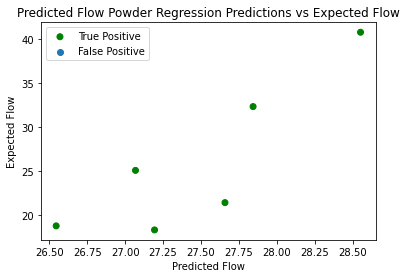

R:  86.292 %  R^2:  74.4632 %


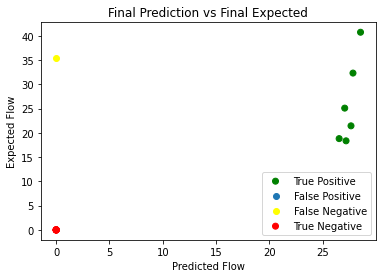

R:  74.443 %  R^2:  55.4176 %
2344/2344 [==============================] - 2s 924us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 2s 887us/step - loss: 0.2285
Epoch 2/10
2344/2344 [==============================] - 2s 942us/step - loss: 0.2226
Epoch 3/10
2344/2344 [==============================] - 2s 957us/step - loss: 0.2215
Epoch 4/10
2344/2344 [==============================] - 2s 942us/step - loss: 0.2188 0s - loss: 0.218
Epoch 5/10
2344/2344 [==============================] - 2s 923us/step - loss: 0.2181
Epoch 6/10
2344/2344 [==============================] - 2s 903us/step - loss: 0.2173
Epoch 7/10
2344/2344 [==============================] - 2s 992us/step - loss: 0.2166
Epoch 8/10
2344/2344 [==============================] - 2s 961us/step - loss: 0.2162
Epoch 9/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2158
Epoch 10/10
1094/1094 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1094/1094 [================

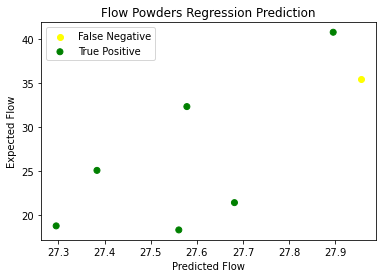

R:  74.9553 %  R^2:  56.183 %


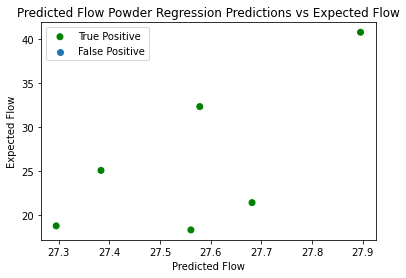

R:  69.5615 %  R^2:  48.388 %


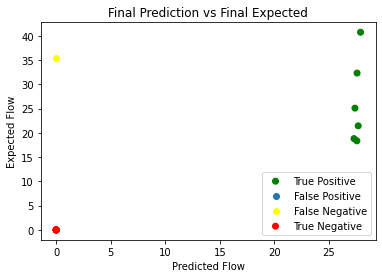

R:  73.8022 %  R^2:  54.4676 %


[[57.1429, 74.8524, 43.9697, 24.924],
 [76.1905, 74.0841, 76.1647, 54.7948],
 [76.1905, 71.2556, 68.2459, 54.7266],
 [76.1905, 75.7703, 74.4632, 55.4176],
 [76.1905, 56.183, 48.388, 54.4676]]

In [30]:
results = []
for i in range(5):
    plist = []
    for i in d.datalist:
        plist.append(i.sample(n=5000, replace = True))
    df = pd.concat(plist)
    df = df.sample(frac=1)
    flowdf = df[df["Flow Class"] == 1]
    results.append(trymodel(df, flowdf, mean))
results

2344/2344 [==============================] - 3s 1ms/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 2s 904us/step - loss: 0.2295
Epoch 2/10
2344/2344 [==============================] - 2s 919us/step - loss: 0.2222
Epoch 3/10
2344/2344 [==============================] - 2s 963us/step - loss: 0.2203
Epoch 4/10
2344/2344 [==============================] - 2s 978us/step - loss: 0.2193
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2185
Epoch 6/10
2344/2344 [==============================] - 2s 982us/step - loss: 0.2177
Epoch 7/10
2344/2344 [==============================] - 2s 975us/step - loss: 0.2173
Epoch 8/10
2344/2344 [==============================] - 2s 959us/step - loss: 0.2167
Epoch 9/10
2344/2344 [==============================] - 2s 1ms/step - loss: 0.2164
Epoch 10/10
1094/1094 [==============================] - 2s 2ms/step - loss: nan
Epoch 1/10
1094/1094 [==============================] - 1s 908us/step - loss: 260.6195
Ep

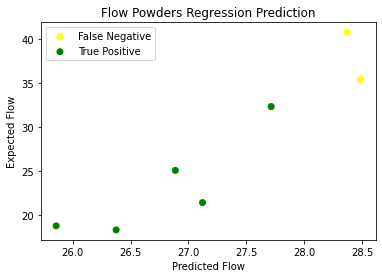

R:  93.3966 %  R^2:  87.2293 %


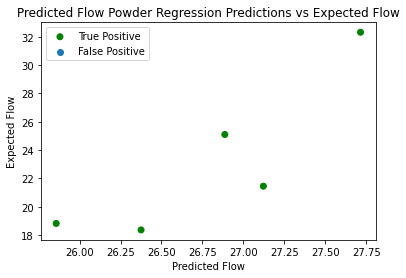

R:  86.4599 %  R^2:  74.7531 %


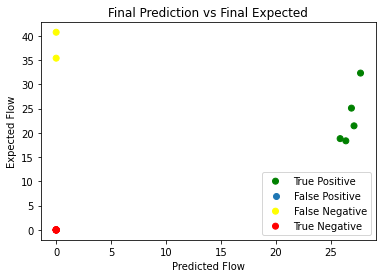

R:  50.2337 %  R^2:  25.2342 %
2344/2344 [==============================] - 2s 946us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2332
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2226
Epoch 3/10
2344/2344 [==============================] - 2s 942us/step - loss: 0.2199
Epoch 4/10
2344/2344 [==============================] - 2s 923us/step - loss: 0.2184 0s - loss: 
Epoch 5/10
2344/2344 [==============================] - 2s 936us/step - loss: 0.2174
Epoch 6/10
2344/2344 [==============================] - 2s 912us/step - loss: 0.2166
Epoch 7/10
2344/2344 [==============================] - 2s 911us/step - loss: 0.2160
Epoch 8/10
2344/2344 [==============================] - 2s 946us/step - loss: 0.2155
Epoch 9/10
2344/2344 [==============================] - 2s 932us/step - loss: 0.2156 0s - l
Epoch 10/10
1094/1094 [==============================] - 1s 942us/step - loss: nan              
Epoch 1/10
1094/1094 

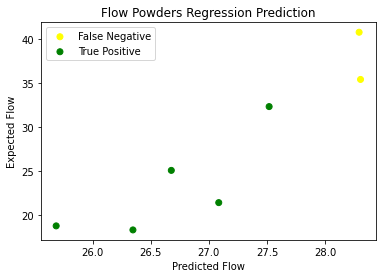

R:  92.0277 %  R^2:  84.6909 %


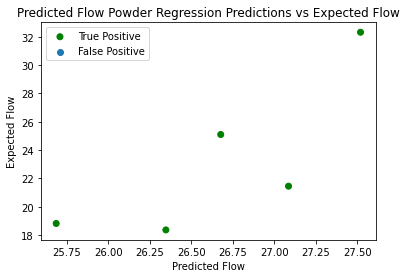

R:  79.98 %  R^2:  63.9681 %


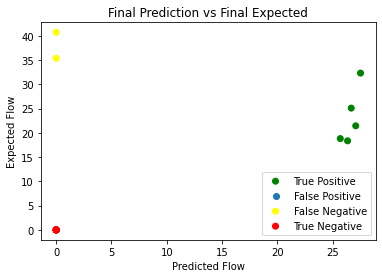

R:  50.1924 %  R^2:  25.1928 %
2344/2344 [==============================] - 2s 990us/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 2s 983us/step - loss: 0.2290
Epoch 2/10
2344/2344 [==============================] - 2s 974us/step - loss: 0.2233
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2211
Epoch 4/10
2344/2344 [==============================] - 2s 940us/step - loss: 0.2194 1 - ETA: 1s - loss: 0 - ET
Epoch 5/10
2344/2344 [==============================] - 2s 955us/step - loss: 0.2175
Epoch 6/10
2344/2344 [==============================] - 2s 955us/step - loss: 0.2164
Epoch 7/10
2344/2344 [==============================] - 2s 940us/step - loss: 0.2160
Epoch 8/10
2344/2344 [==============================] - 2s 1ms/step - loss: 0.2156A: 1s
Epoch 9/10
2344/2344 [==============================] - 2s 929us/step - loss: 0.2151
Epoch 10/10
1094/1094 [==============================] - 1s 924us/step - loss: nan     - ETA: 0s
Epoch 1/

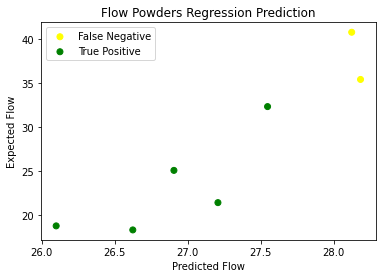

R:  91.6369 %  R^2:  83.9732 %


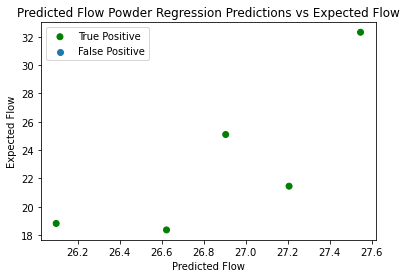

R:  80.1434 %  R^2:  64.2297 %


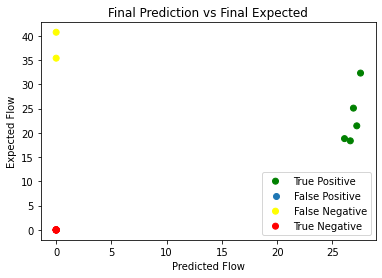

R:  50.1017 %  R^2:  25.1018 %
2344/2344 [==============================] - 3s 1ms/step - loss: nan
Epoch 1/10
2344/2344 [==============================] - 2s 931us/step - loss: 0.2332
Epoch 2/10
2344/2344 [==============================] - 2s 922us/step - loss: 0.2220
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2200
Epoch 4/10
2344/2344 [==============================] - 2s 917us/step - loss: 0.2179
Epoch 5/10
2344/2344 [==============================] - 2s 899us/step - loss: 0.2174
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2160
Epoch 7/10
2344/2344 [==============================] - 2s 984us/step - loss: 0.2155
Epoch 8/10
2344/2344 [==============================] - 2s 922us/step - loss: 0.2149
Epoch 9/10
2344/2344 [==============================] - 2s 882us/step - loss: 0.2147 1s - loss - ETA: 0s
Epoch 10/10
1094/1094 [==============================] - 1s 1ms/step - loss: nan
Epoch 1/10
1094/1094 [================

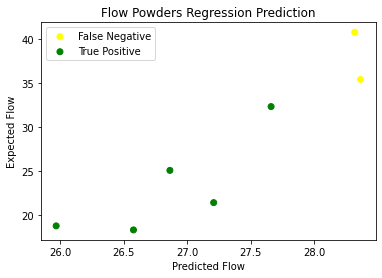

R:  92.2096 %  R^2:  85.0261 %


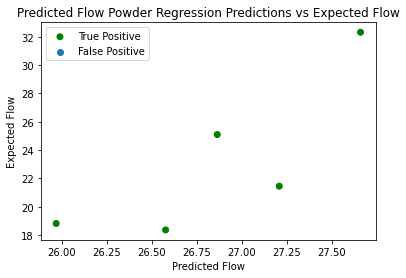

R:  81.315 %  R^2:  66.1212 %


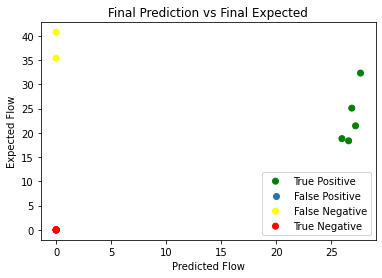

R:  50.1601 %  R^2:  25.1604 %
2344/2344 [==============================] - 2s 961us/step - loss: nan          
Epoch 1/10
2344/2344 [==============================] - 2s 1ms/step - loss: 0.2326A: 0s - loss: 0.232
Epoch 2/10
2344/2344 [==============================] - ETA: 0s - loss: 0.221 - 2s 1ms/step - loss: 0.2218
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2199
Epoch 4/10
2344/2344 [==============================] - 2s 982us/step - loss: 0.2184
Epoch 5/10
2344/2344 [==============================] - 2s 944us/step - loss: 0.2170 0s - loss: 0.217
Epoch 6/10
2344/2344 [==============================] - 2s 953us/step - loss: 0.2166  - ETA: 0s - loss: 0
Epoch 7/10
2344/2344 [==============================] - 2s 985us/step - loss: 0.2159
Epoch 8/10
2344/2344 [==============================] - 2s 987us/step - loss: 0.2156
Epoch 9/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.2154
Epoch 10/10
1094/1094 [===========================

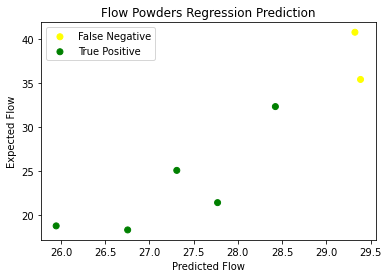

R:  92.3416 %  R^2:  85.2697 %


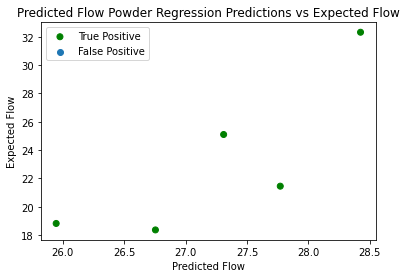

R:  82.5513 %  R^2:  68.1471 %


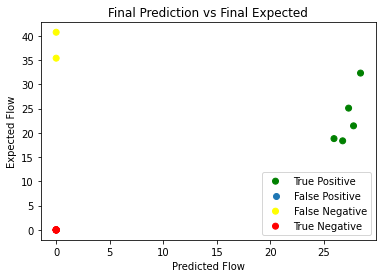

R:  50.3469 %  R^2:  25.3481 %


[[57.1429, 87.2293, 74.7531, 25.2342],
 [57.1429, 84.6909, 63.9681, 25.1928],
 [57.1429, 83.9732, 64.2297, 25.1018],
 [57.1429, 85.0261, 66.1212, 25.1604],
 [57.1429, 85.2697, 68.1471, 25.3481]]

In [31]:
results = []
for i in range(5):
    plist = []
    for i in d.datalist:
        plist.append(i.sample(n=5000, replace = True))
    df = pd.concat(plist)
    df = df.sample(frac=1)
    flowdf = df[df["Flow Class"] == 1]
    results.append(trymodel(df, flowdf, median))
results

1/1 [==============================] - 0s 997us/step - loss: 231835547673339962322126062418395136.0000
Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9246
Epoch 2/10
1/1 [==============================] - 0s 997us/step - loss: 1.5883
Epoch 3/10
1/1 [==============================] - 0s 997us/step - loss: 1.2901
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0326
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.8121
Epoch 6/10
1/1 [==============================] - 0s 997us/step - loss: 0.6297
Epoch 7/10
1/1 [==============================] - 0s 996us/step - loss: 0.4839
Epoch 8/10
1/1 [==============================] - 0s 998us/step - loss: 0.3715
Epoch 9/10
1/1 [==============================] - 0s 0s/step - loss: 0.2903
Epoch 10/10
1/1 [==============================] - 0s 0s/step - loss: 186747196527284699119328168001929216.0000
Epoch 1/10
1/1 [==============================] - 0s 997us/step - loss: 392.4704
Ep

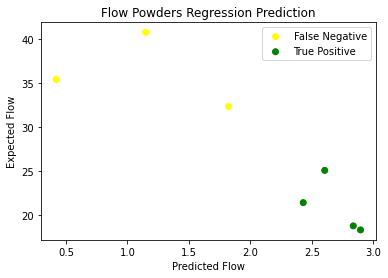

R:  -89.1025 %  R^2:  79.3926 %


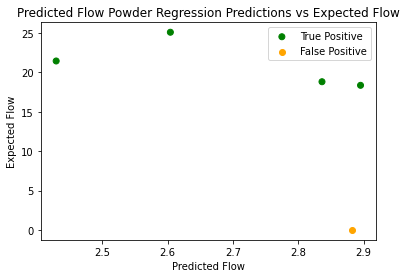

R:  -56.7588 %  R^2:  32.2157 %


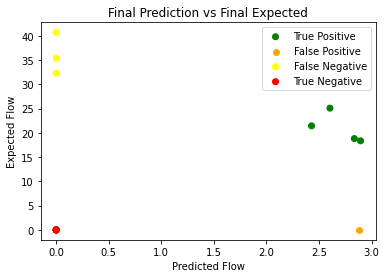

R:  17.1735 %  R^2:  2.9493 %


[22.3214, 79.3926, 32.2157, 2.9493]

In [18]:
trymodel(mean, mean, mean)

In [ ]:
trymodel(data, data, data)

In [32]:
meantest = d.datalist.copy()
meantest

[          Da       Dp  FWidth  FLength  ELength  EWidth      Volume      Area  \
 0     91.229  117.002  95.505  108.054   97.930  91.753  397553.759  6536.643   
 1     79.035  109.685  83.322   99.700   87.563  80.170  258496.560  4905.997   
 2     89.401  137.882  83.101  148.252  165.327  64.848  374138.469  6277.389   
 3     85.351   99.931  82.446  101.719   93.084  79.827  325549.588  5721.399   
 4     90.169  132.818  81.768  135.631  134.040  69.514  383853.784  6385.595   
 ...      ...      ...     ...      ...      ...     ...         ...       ...   
 4059   3.462    3.998   3.229    4.315    3.911   2.953      21.724     9.413   
 4060   3.134    3.986   3.191    4.198    3.499   2.827      16.110     7.712   
 4061   3.441    3.935   3.166    4.315    4.019   2.830      21.337     9.301   
 4062   3.708    4.377   3.112    4.868    4.872   2.854      26.691    10.798   
 4063   2.754    3.790   3.102    3.897    3.996   2.179      10.941     5.958   
 
       Perimet

In [43]:
for i in range(len(meantest)):
    for j in meantest[i].columns:
        fpdlist[i]
        meantest[i][j] = meantest[i][j > ]

0       91.229
1       79.035
2       89.401
3       85.351
4       90.169
         ...  
4059     3.462
4060     3.134
4061     3.441
4062     3.708
4063     2.754
Name: Da, Length: 4064, dtype: float64
0       117.002
1       109.685
2       137.882
3        99.931
4       132.818
         ...   
4059      3.998
4060      3.986
4061      3.935
4062      4.377
4063      3.790
Name: Dp, Length: 4064, dtype: float64
0       95.505
1       83.322
2       83.101
3       82.446
4       81.768
         ...  
4059     3.229
4060     3.191
4061     3.166
4062     3.112
4063     3.102
Name: FWidth, Length: 4064, dtype: float64
0       108.054
1        99.700
2       148.252
3       101.719
4       135.631
         ...   
4059      4.315
4060      4.198
4061      4.315
4062      4.868
4063      3.897
Name: FLength, Length: 4064, dtype: float64
0        97.930
1        87.563
2       165.327
3        93.084
4       134.040
         ...   
4059      3.911
4060      3.499
4061      4.019
4062     

Name: Dp, Length: 15374, dtype: float64
0        80.320
1        80.114
2        79.551
3        77.968
4        77.797
          ...  
15369     3.007
15370     3.003
15371     3.002
15372     3.002
15373     3.001
Name: FWidth, Length: 15374, dtype: float64
0         99.892
1        107.209
2        106.708
3        102.288
4        102.360
          ...   
15369      4.152
15370      4.095
15371      4.226
15372      3.919
15373      5.968
Name: FLength, Length: 15374, dtype: float64
0         98.818
1        113.370
2        104.356
3         93.305
4         93.884
          ...   
15369      3.895
15370      4.056
15371      4.001
15372      3.659
15373      5.363
Name: ELength, Length: 15374, dtype: float64
0        75.771
1        73.505
2        76.689
3        76.108
4        69.214
          ...  
15369     2.777
15370     2.184
15371     2.671
15372     2.670
15373     2.786
Name: EWidth, Length: 15374, dtype: float64
0        315368.545
1        300095.056
2        362574.

0       379812.543
1       307434.147
2       361960.597
3       268544.587
4       305298.997
           ...    
8262        29.208
8263        29.208
8264        18.860
8265        37.032
8266        25.376
Name: Volume, Length: 8267, dtype: float64
0       6340.697
1       5507.133
2       6140.423
3       5032.321
4       5481.604
          ...   
8262      11.466
8263      11.466
8264       8.566
8265      13.432
8266      10.440
Name: Area, Length: 8267, dtype: float64
0       315.647
1       342.366
2       354.764
3       293.359
4       419.455
         ...   
8262     14.428
8263     14.428
8264     14.054
8265     15.553
8266     12.737
Name: Perimeter, Length: 8267, dtype: float64
0       6507.916
1       6109.231
2       6466.419
3       5227.046
4       6666.680
          ...   
8262      13.290
8263      13.290
8264      10.995
8265      14.498
8266      10.798
Name: CHull  Area, Length: 8267, dtype: float64
0       288.218
1       291.037
2       291.282
3       262.667

Name: ELength, Length: 22093, dtype: float64
0        68.077
1        69.379
2        68.970
3        67.578
4        64.924
          ...  
22088     2.556
22089     2.716
22090     2.923
22091     2.714
22092     2.871
Name: EWidth, Length: 22093, dtype: float64
0        311202.411
1        177851.616
2        226353.988
3        159373.008
4        173660.073
            ...    
22088        25.744
22089        17.291
22090        16.520
22091        28.747
22092        18.963
Name: Volume, Length: 22093, dtype: float64
0        5552.043
1        3823.514
2        4490.378
3        3553.862
4        3763.201
           ...   
22088      10.541
22089       8.084
22090       7.842
22091      11.345
22092       8.597
Name: Area, Length: 22093, dtype: float64
0        327.395
1        265.784
2        258.269
3        260.533
4        239.018
          ...   
22088     15.433
22089     13.260
22090     13.447
22091     14.076
22092     13.166
Name: Perimeter, Length: 22093, dtype: float

In [27]:
plist[0]

Da      Dp  FWidth  FLength  ELength  EWidth      Volume      Area  \
3588   9.393  10.000   9.304   10.734    9.496   9.265     433.867    69.289   
1422  44.155  51.041  40.466   53.081   52.549  39.451   45075.464  1531.267   
1192  44.673  48.613  42.761   48.931   46.743  42.855   46679.541  1567.383   
2783  21.994  23.588  21.437   24.510   22.459  21.571    5570.939   379.935   
4002   4.219   4.762   3.740    5.286    4.289   4.289      39.324    13.981   
...      ...     ...     ...      ...      ...     ...         ...       ...   
4061   3.441   3.935   3.166    4.315    4.019   2.830      21.337     9.301   
2937  18.714  19.855  18.745   19.793   18.818  18.607    3431.566   275.055   
3611  10.013  10.884   9.158   12.459   11.667   8.708     525.679    78.748   
3627  10.260  12.123   9.068   12.905   12.138   8.762     565.574    82.683   
213   66.311  75.910  59.258   75.695   75.593  58.246  152669.305  3453.493   

      Perimeter  CHull  Area  ...  Curvature  Surface Area  L/W Ratio  \
3588     31.417       72.717  ...        0.0       277.154      1.154   
1422    160.351     1658.913  ...        0.0      6125.068      1.312   
1192    152.723     1629.744  ...        0.0      6269.533      1.144   
2783     74.105      397.705  ...        0.0      1519.741      1.143   
4002     14.960       13.981  ...        0.0        55.923      1.413   
...         ...          ...  ...        ...           ...        ...   
4061     12.362       10.151  ...        0.0        37.202      1.363   
2937     62.376      285.005  ...        0.0      1100.219      1.056   
3611     34.193       82.117  ...        0.0       314.991      1.360   
3627     38.086       91.630  ...        0.0       330.733      1.423   
213     238.479     3587.936  ...        0.0     13813.972      1.277   

      W/L Aspect Ratio  CHull Surface Area  Ellipticity  Fiber Length  \
3588             0.867             290.867        1.025         0.000   
1422             0.762            6635.650        1.332         0.000   
1192             0.874            6518.978        1.091         0.000   
2783             0.875            1590.821        1.041         0.000   
4002             0.708              55.923        1.000        62.198   
...                ...                 ...          ...           ...   
4061             0.734              40.603        1.420         0.000   
2937             0.947            1140.019        1.011         0.000   
3611             0.735             328.469        1.340         0.000   
3627             0.703             366.519        1.385         0.000   
213              0.783           14351.743        1.298         0.000   

      Fiber Width       Flow  Flow Class  
3588        0.000  18.363333           1  
1422        0.000  18.363333           1  
1192        0.000  18.363333           1  
2783        0.000  18.363333           1  
4002        9.062  18.363333           1  
...           ...        ...         ...  
4061        0.000  18.363333           1  
2937        0.000  18.363333           1  
3611        0.000  18.363333           1  
3627        0.000  18.363333           1  
213         0.000  18.363333           1  

[5000 rows x 32 columns]

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                 1.134e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:30:31   Log-Likelihood:            -5.8272e+05
No. Observations:              144327   AIC:                         1.165e+06
Df Residuals:                  144325   BIC:                         1.165e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3622      0.065     51.944      0.0

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     5618.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:30:32   Log-Likelihood:            -5.8542e+05
No. Observations:              144327   AIC:                         1.171e+06
Df Residuals:                  144325   BIC:                         1.171e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8271      0.040    193.643      0.0

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3324.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:30:33   Log-Likelihood:            -5.8653e+05
No. Observations:              144327   AIC:                         1.173e+06
Df Residuals:                  144325   BIC:                         1.173e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.4340      0.341    -30.639      

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1203.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):          1.44e-262
Time:                        13:30:34   Log-Likelihood:            -5.8757e+05
No. Observations:              144327   AIC:                         1.175e+06
Df Residuals:                  144325   BIC:                         1.175e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4259      0.732     47.059      0.0

C:\Users\eadel\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     122.2
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           2.18e-28
Time:                        13:30:35   Log-Likelihood:            -5.8811e+05
No. Observations:              144327   AIC:                         1.176e+06
Df Residuals:                  144325   BIC:                         1.176e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1426      0.038    241.440      0.0

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2279.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:30:36   Log-Likelihood:            -5.8704e+05
No. Observations:              144327   AIC:                         1.174e+06
Df Residuals:                  144325   BIC:                         1.174e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.1527      0.042    194.134   

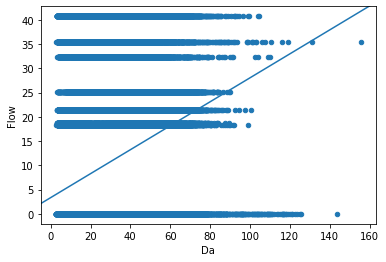

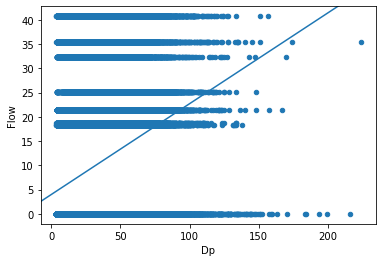

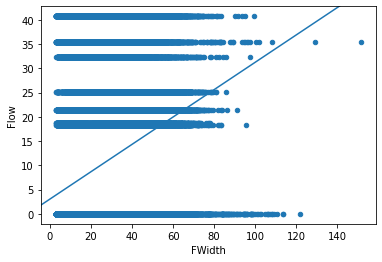

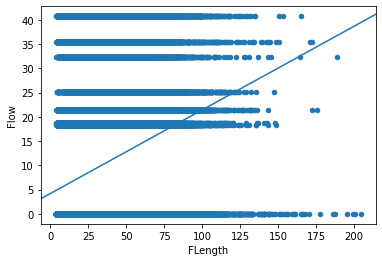

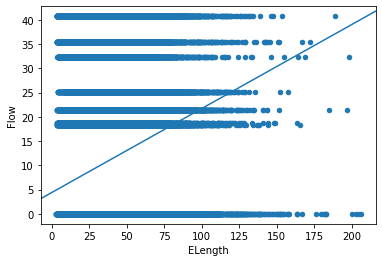

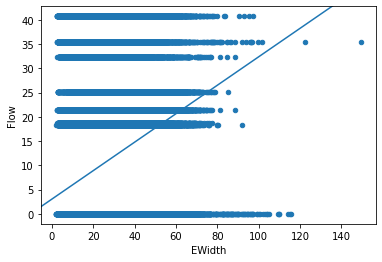

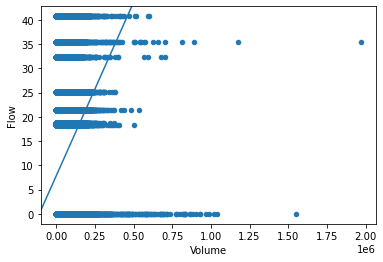

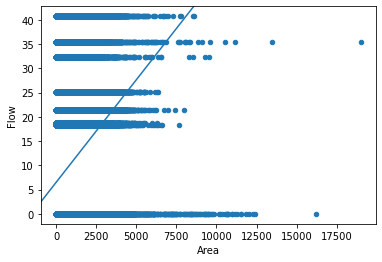

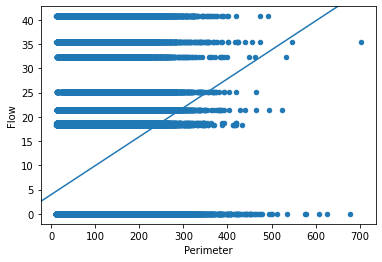

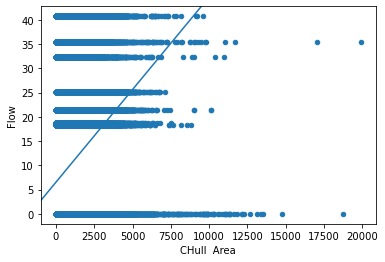

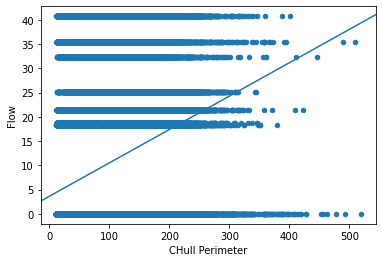

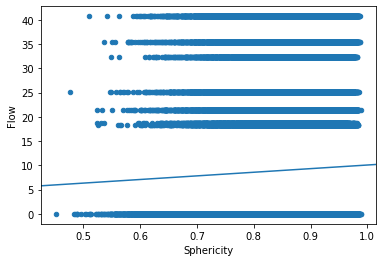

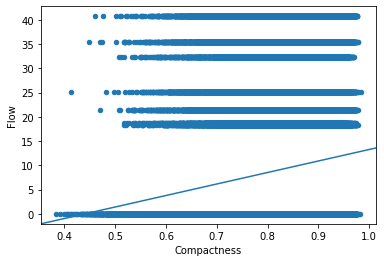

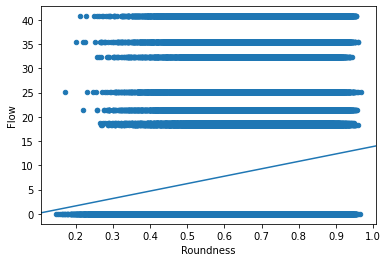

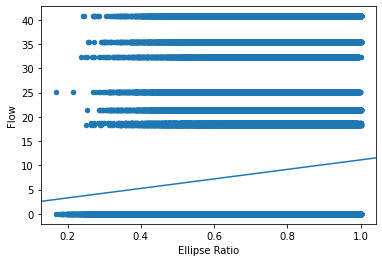

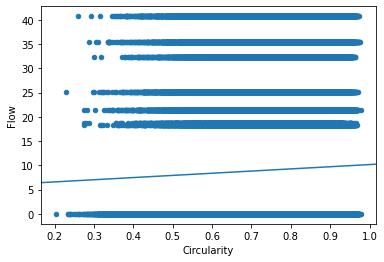

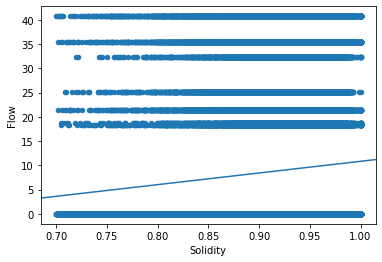

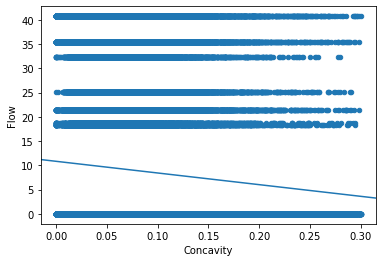

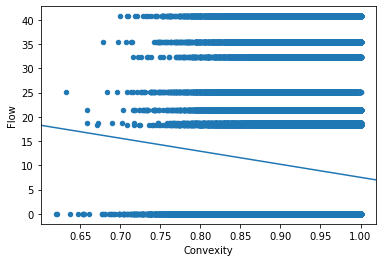

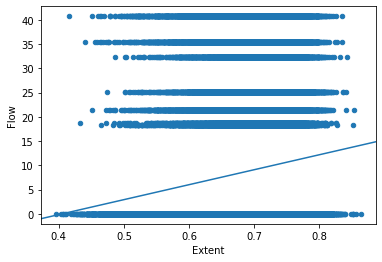

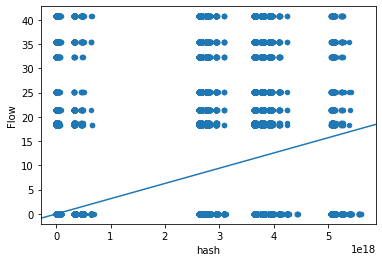

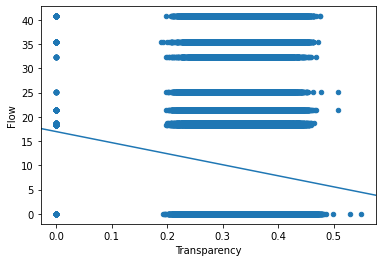

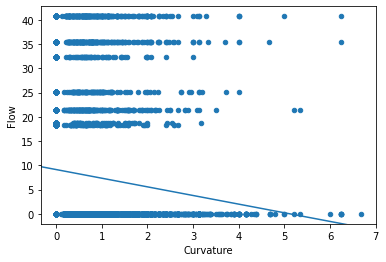

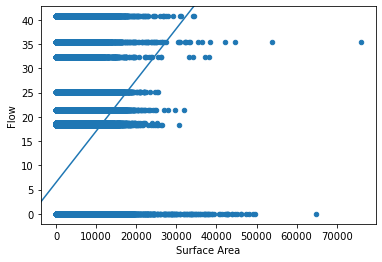

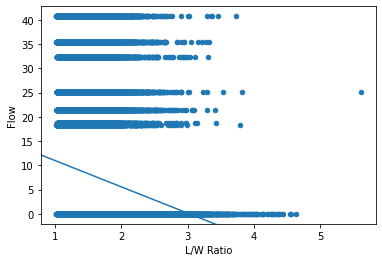

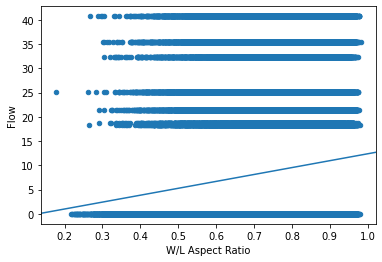

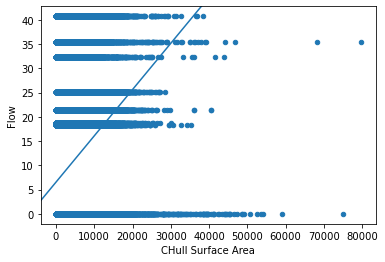

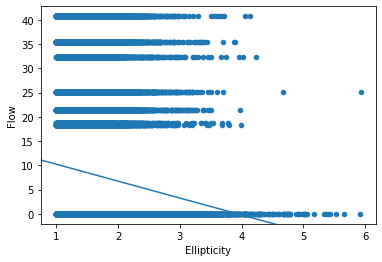

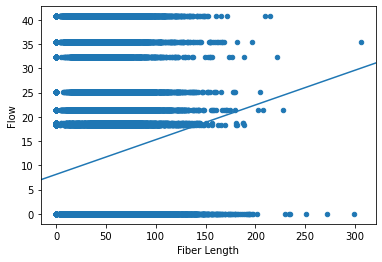

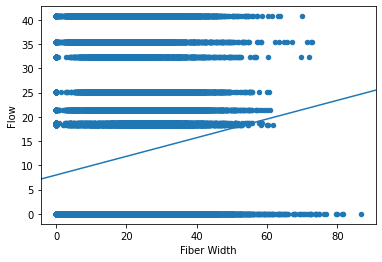

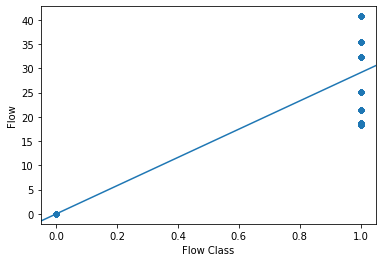

In [52]:
b_data = data.copy()
cols = []
for i in b_data.columns:
    cols.append(i)
y = "Flow"
cols.remove(y)
#cols.remove("Unnamed: 0")
for i in cols:
    model = sm.OLS(b_data[y], sm.add_constant(b_data[i])).fit()
    print(model.summary())
    ax = b_data.plot(x=i, y=y, kind='scatter')

    # plot regression line
    abline_plot(model_results=model, ax=ax)

In [65]:
b_data = data.copy()
cols = ""
for i in b_data.columns:
    if i != "Flow" and i != "Flow Class":
        cols = cols+i
        if i != "Fiber Width":
            cols = cols+"+"
print(cols)
st = "Flow ~ "+cols
x = b_data.drop(columns = ["Flow", "Flow Class", "hash"])

Da+Dp+FWidth+FLength+ELength+EWidth+Volume+Area+Perimeter+CHull  Area+CHull Perimeter+Sphericity+Compactness+Roundness+Ellipse Ratio+Circularity+Solidity+Concavity+Convexity+Extent+hash+Transparency+Curvature+Surface Area+L/W Ratio+W/L Aspect Ratio+CHull Surface Area+Ellipticity+Fiber Length+Fiber Width


In [86]:
smth = mean.copy()
x = smth.drop(columns = ["Flow Class", "Flow", "hash"])
x

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
1824   34.8608  41.2800  32.1342  42.3065  40.6480  31.0605  42227.3523   
11465  19.9521  24.0019  17.4026  26.3070  25.1213  16.5875   9587.0063   
947    20.6719  23.7186  19.4825  24.4259  23.1557  18.8973  10540.2241   
7062   19.4502  22.5109  18.2251  23.3357  22.0971  17.6177   9598.9267   
5740   19.0254  22.6628  17.3387  23.9394  22.7301  16.6124  11134.1670   
878    22.8489  26.7397  21.0478  27.8028  26.5105  20.3305  19829.3279   
570    30.4551  35.5357  27.9433  36.8311  35.3678  27.0490  26326.7979   
1130   23.4824  27.5710  21.6577  28.6577  27.3345  20.9246  18465.7069   
2962   24.9139  28.9446  23.3078  29.7527  28.3908  22.5548  19908.0683   
3512   35.1262  41.3762  32.1347  42.8037  41.1789  31.0307  36300.0960   
4407   19.7542  23.2662  18.2025  24.3728  23.1154  17.5070  12517.6702   
5013   26.7035  31.1492  24.9595  31.8664  30.4730  24.1768  25193.8243   
3100   32.4929  38.3251  30.0815  39.2555  37.6721  29.0959  35686.2571   
497    37.2380  44.2624  33.8849  45.7631  44.0942  32.7296  45365.5634   
4909   16.3996  19.1506  15.2834  20.0577  18.8786  14.7104   5939.7081   

            Area  Perimeter  CHull  Area  ...  Extent  Transparency  \
1824   1237.8943   129.6848    1333.8333  ...  0.7075        0.3239   
11465   411.1516    75.4041     448.5799  ...  0.6894        0.3601   
947     452.1957    74.5141     483.1922  ...  0.7040        0.3501   
7062    415.4385    70.7200     447.0445  ...  0.6991        0.3523   
5740    431.6499    71.1972     471.9991  ...  0.6885        0.3539   
878     629.5481    84.0053     678.1732  ...  0.7008        0.3456   
570     894.6295   111.6388     958.7166  ...  0.7137        0.3324   
1130    638.0280    86.6170     689.3381  ...  0.7018        0.3422   
2962    675.2391    90.9322     725.5011  ...  0.7057        0.3403   
3512   1149.9677   129.9872    1235.5878  ...  0.7125        0.3225   
4407    470.2011    73.0929     509.5040  ...  0.6913        0.3526   
5013    806.6309    97.8582     866.7988  ...  0.7068        0.3365   
3100   1085.8506   120.4019    1169.7944  ...  0.7093        0.3275   
497    1342.0420   139.0543    1446.3593  ...  0.7076        0.3200   
4909    300.4077    60.1633     325.9971  ...  0.6895        0.3578   

       Curvature  Surface Area  L/W Ratio  W/L Aspect Ratio  \
1824      0.0154     4951.5773     1.3045            0.7909   
11465     0.0338     1644.6064     1.5523            0.6798   
947       0.0398     1808.7827     1.2955            0.7981   
7062      0.0380     1661.7542     1.3116            0.7877   
5740      0.0397     1726.5995     1.4053            0.7411   
878       0.0336     2518.1923     1.3323            0.7738   
570       0.0130     3578.5181     1.3165            0.7851   
1130      0.0291     2552.1120     1.3255            0.7818   
2962      0.0299     2700.9563     1.2887            0.8006   
3512      0.0136     4599.8708     1.3356            0.7747   
4407      0.0393     1880.8044     1.3698            0.7572   
5013      0.0288     3226.5238     1.2706            0.8092   
3100      0.0226     4343.4024     1.2913            0.8004   
497       0.0186     5368.1679     1.3691            0.7568   
4909      0.0498     1201.6307     1.3472            0.7676   

       CHull Surface Area  Ellipticity  Fiber Length  Fiber Width  
1824            5335.3334       1.2913       23.9439      10.3599  
11465           1794.3198       1.5616       12.6761       5.3043  
947             1932.7686       1.2650        7.6743       3.3476  
7062            1788.1782       1.2813        8.3277       3.4981  
5740            1887.9964       1.3856       11.3097       4.4066  
878             2712.6927       1.3036       12.3448       5.2006  
570             3834.8663       1.3060       16.6835       7.5188  
1130            2757.3522       1.2983       13.4030       5.5511  
2962            2902.0045       1.2651       12.7256 

C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     20.23
Date:                Tue, 16 Nov 2021   Prob (F-statistic):            0.00641
Time:                        15:21:32   Log-Likelihood:                -18.932
No. Observations:                   7   AIC:                             41.86
Df Residuals:                       5   BIC:                             41.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.8877     12.208      6.708      0.0

C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     22.25
Date:                Tue, 16 Nov 2021   Prob (F-statistic):            0.00526
Time:                        15:21:32   Log-Likelihood:                -18.664
No. Observations:                   7   AIC:                             41.33
Df Residuals:                       5   BIC:                             41.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.3201     12.576      6.864      0.0

C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     20.60
Date:                Tue, 16 Nov 2021   Prob (F-statistic):            0.00617
Time:                        15:21:32   Log-Likelihood:                -18.881
No. Observations:                   7   AIC:                             41.76
Df Residuals:                       5   BIC:                             41.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.9827     11.901     

C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     15.72
Date:                Tue, 16 Nov 2021   Prob (F-statistic):             0.0107
Time:                        15:21:33   Log-Likelihood:                -19.622
No. Observations:                   7   AIC:                             43.24
Df Residuals:                       5   BIC:                             43.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -406.2063    109.393     -3.713      

C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not va

                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     18.04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):            0.00811
Time:                        15:21:33   Log-Likelihood:                -19.251
No. Observations:                   7   AIC:                             42.50
Df Residuals:                       5   BIC:                             42.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -308.5403     79.128     -3.899   

C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     3.020
Date:                Tue, 16 Nov 2021   Prob (F-statistic):              0.143
Time:                        15:21:33   Log-Likelihood:                -22.944
No. Observations:                   7   AIC:                             49.89
Df Residuals:                       5   BIC:                             49.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.8182    122.801      1.961      0.1

C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "



                            OLS Regression Results                            
Dep. Variable:                   Flow   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     24.73
Date:                Tue, 16 Nov 2021   Prob (F-statistic):            0.00420
Time:                        15:21:34   Log-Likelihood:                -18.358
No. Observations:                   7   AIC:                             40.72
Df Residuals:                       5   BIC:                             40.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          58.9585      6.507      9.060     

C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\eadel\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


ValueError: not enough values to unpack (expected 2, got 1)

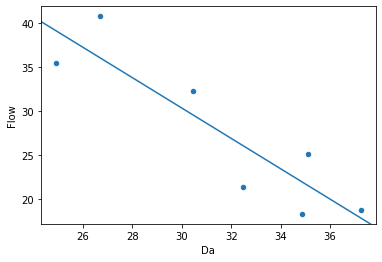

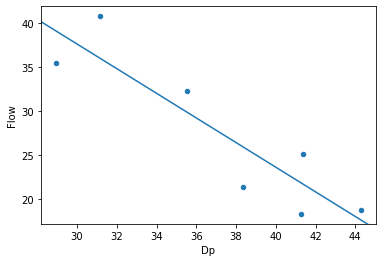

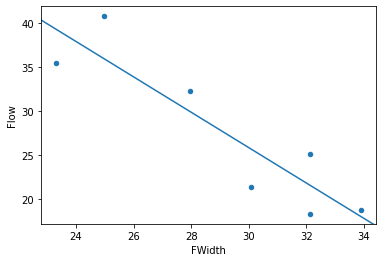

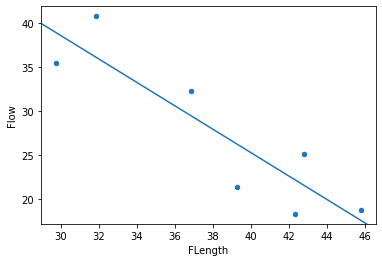

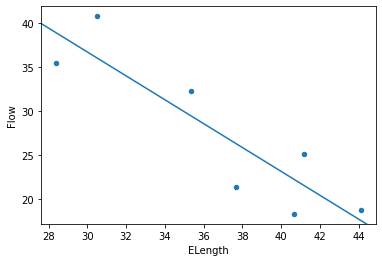

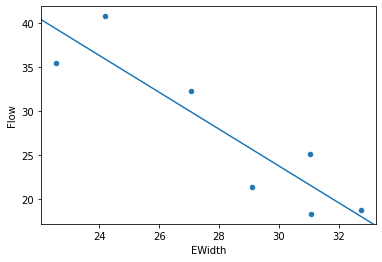

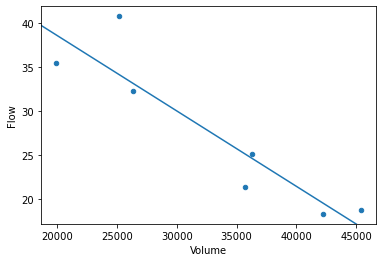

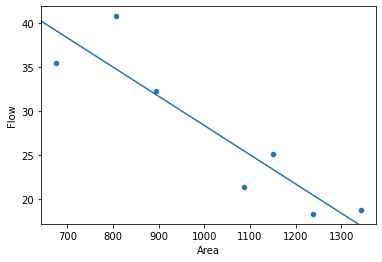

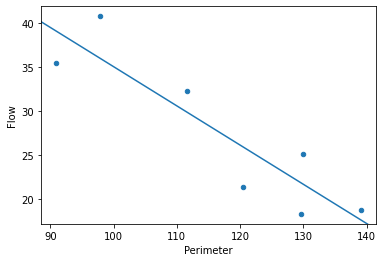

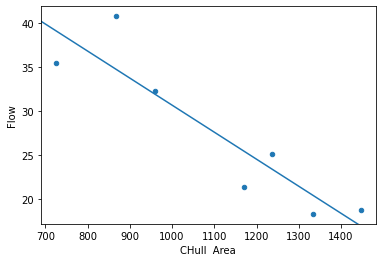

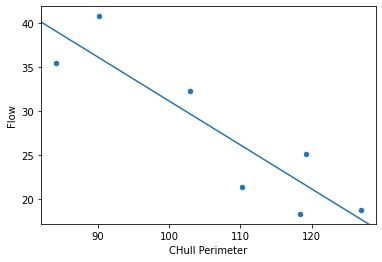

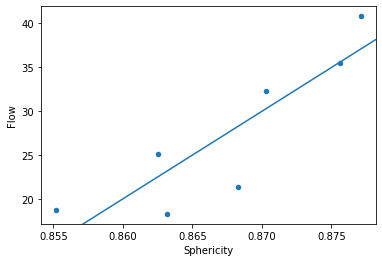

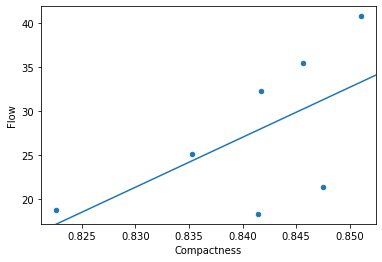

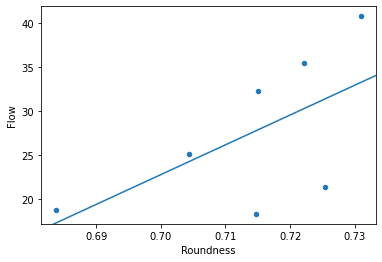

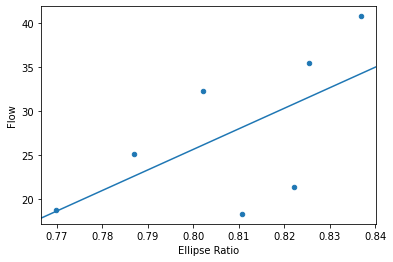

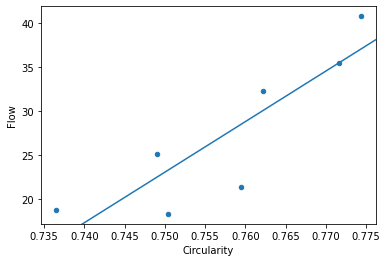

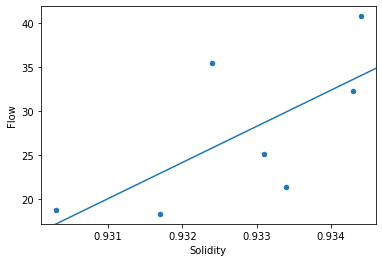

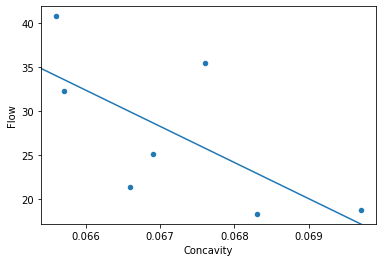

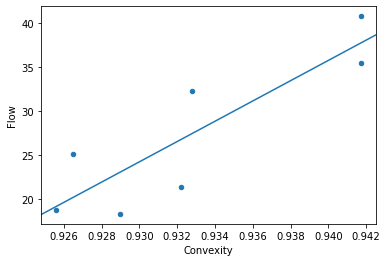

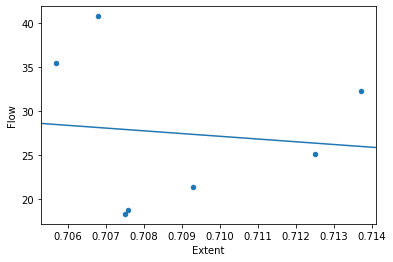

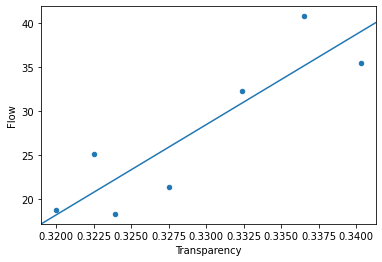

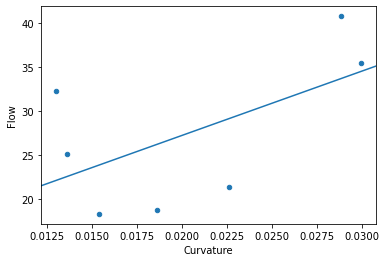

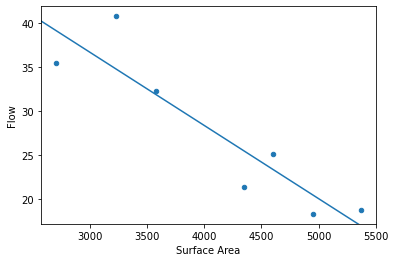

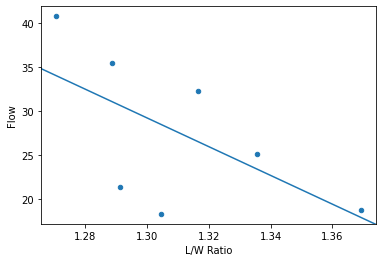

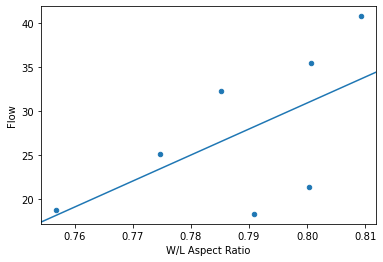

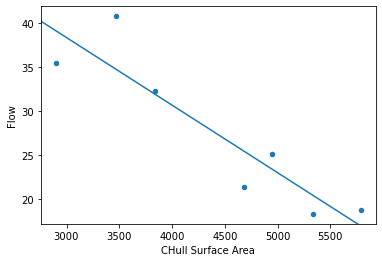

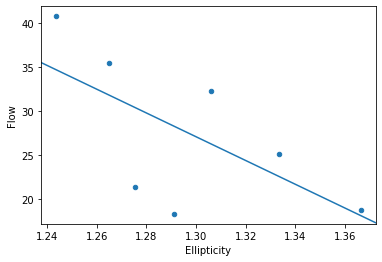

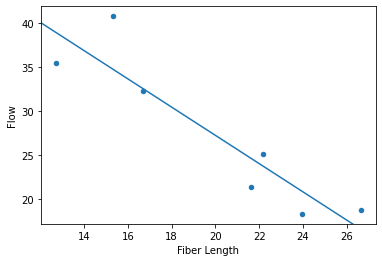

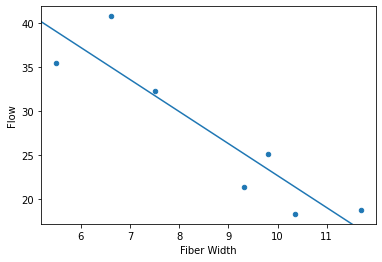

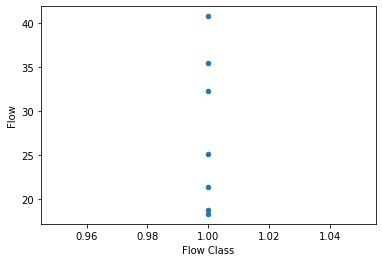

In [90]:
m = mean[mean["Flow Class"] == 1]
b_data = m.copy()
cols = []
for i in b_data.columns:
    cols.append(i)
y = "Flow"
cols.remove(y)
cols.remove("hash")
#cols.remove("Unnamed: 0")
for i in cols:
    model = sm.OLS(b_data[y], sm.add_constant(b_data[i])).fit()
    print(model.summary())
    ax = b_data.plot(x=i, y=y, kind='scatter')

    # plot regression line
    abline_plot(model_results=model, ax=ax)

In [132]:
me = median[median["Flow Class"] == 1]
me = me.drop(columns = ["Flow Class", "Flow", "hash"])

In [1]:
m

NameError: name 'm' is not defined

In [133]:
x = m.drop(columns = ["Flow Class", "Flow", "hash"])
x

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
1824  34.8608  41.2800  32.1342  42.3065  40.6480  31.0605  42227.3523   
570   30.4551  35.5357  27.9433  36.8311  35.3678  27.0490  26326.7979   
2962  24.9139  28.9446  23.3078  29.7527  28.3908  22.5548  19908.0683   
3512  35.1262  41.3762  32.1347  42.8037  41.1789  31.0307  36300.0960   
5013  26.7035  31.1492  24.9595  31.8664  30.4730  24.1768  25193.8243   
3100  32.4929  38.3251  30.0815  39.2555  37.6721  29.0959  35686.2571   
497   37.2380  44.2624  33.8849  45.7631  44.0942  32.7296  45365.5634   

           Area  Perimeter  CHull  Area  ...  Extent  Transparency  Curvature  \
1824  1237.8943   129.6848    1333.8333  ...  0.7075        0.3239     0.0154   
570    894.6295   111.6388     958.7166  ...  0.7137        0.3324     0.0130   
2962   675.2391    90.9322     725.5011  ...  0.7057        0.3403     0.0299   
3512  1149.9677   129.9872    1235.5878  ...  0.7125        0.3225     0.0136   
5013   806.6309    97.8582     866.7988  ...  0.7068        0.3365     0.0288   
3100  1085.8506   120.4019    1169.7944  ...  0.7093        0.3275     0.0226   
497   1342.0420   139.0543    1446.3593  ...  0.7076        0.3200     0.0186   

      Surface Area  L/W Ratio  W/L Aspect Ratio  CHull Surface Area  \
1824     4951.5773     1.3045            0.7909           5335.3334   
570      3578.5181     1.3165            0.7851           3834.8663   
2962     2700.9563     1.2887            0.8006           2902.0045   
3512     4599.8708     1.3356            0.7747           4942.3512   
5013     3226.5238     1.2706            0.8092           3467.1952   
3100     4343.4024     1.2913            0.8004           4679.1777   
497      5368.1679     1.3691            0.7568           5785.4373   

      Ellipticity  Fiber Length  Fiber Width  
1824       1.2913       23.9439      10.3599  
570        1.3060       16.6835       7.5188  
2962       1.2651       12.7256       5.4991  
3512       1.3335       22.1886       9.8035  
5013       1.2437       15.3335       6.6223  
3100       1.2756       21.5994       9.3277  
497        1.3662       26.6235      11.6877  

[7 rows x 29 columns]

In [134]:
df = median.append(mean)
df

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
1824   36.8760  42.6345  33.7070  42.7030  40.9335  32.3490  26256.2100   
11465  17.6220  20.7080  15.4595  22.6090  21.4505  14.6765   2865.1860   
947    18.1710  20.5835  17.3090  21.2860  20.0990  16.7585   3141.4730   
7062   16.6560  18.8685  15.7290  19.5795  18.3870  15.1840   2419.3370   
5740   15.1710  17.4685  13.9455  18.7695  17.5325  13.3375   1828.2180   
878    18.4990  20.9960  17.3360  21.8260  20.5850  16.7600   3314.7100   
570    27.7910  31.6270  25.7060  32.4700  31.0570  24.8710  11238.8970   
1130   19.5700  22.0380  18.5940  22.7390  21.4190  17.9160   3924.4930   
2962   22.0620  24.9340  20.9710  25.6380  24.1830  20.4210   5622.5980   
3512   33.7050  38.8510  30.6680  39.9790  38.3250  29.4950  20047.5970   
4407   15.4230  17.6840  14.2170  18.7150  17.3880  13.7440   1920.8440   
5013   22.7815  25.5285  22.0850  25.9265  24.5185  21.3895   6191.0355   
3100   31.8835  36.3465  29.9595  36.1390  34.6000  28.8520  16970.3780   
497    39.8920  46.5035  35.8580  47.4015  45.4480  34.7395  33239.1030   
4909   13.6000  15.5840  12.7140  16.4540  15.2740  12.2630   1317.1970   
1824   34.8608  41.2800  32.1342  42.3065  40.6480  31.0605  42227.3523   
11465  19.9521  24.0019  17.4026  26.3070  25.1213  16.5875   9587.0063   
947    20.6719  23.7186  19.4825  24.4259  23.1557  18.8973  10540.2241   
7062   19.4502  22.5109  18.2251  23.3357  22.0971  17.6177   9598.9267   
5740   19.0254  22.6628  17.3387  23.9394  22.7301  16.6124  11134.1670   
878    22.8489  26.7397  21.0478  27.8028  26.5105  20.3305  19829.3279   
570    30.4551  35.5357  27.9433  36.8311  35.3678  27.0490  26326.7979   
1130   23.4824  27.5710  21.6577  28.6577  27.3345  20.9246  18465.7069   
2962   24.9139  28.9446  23.3078  29.7527  28.3908  22.5548  19908.0683   
3512   35.1262  41.3762  32.1347  42.8037  41.1789  31.0307  36300.0960   
4407   19.7542  23.2662  18.2025  24.3728  23.1154  17.5070  12517.6702   
5013   26.7035  31.1492  24.9595  31.8664  30.4730  24.1768  25193.8243   
3100   32.4929  38.3251  30.0815  39.2555  37.6721  29.0959  35686.2571   
497    37.2380  44.2624  33.8849  45.7631  44.0942  32.7296  45365.5634   
4909   16.3996  19.1506  15.2834  20.0577  18.8786  14.7104   5939.7081   

            Area  Perimeter  CHull  Area  ...  Curvature  Surface Area  \
1824   1068.0185   133.9405    1135.8035  ...     0.0000     4272.0735   
11465   243.8895    65.0560     265.6280  ...     0.0000      975.5570   
947     259.3265    64.6655     278.2040  ...     0.0000     1037.3045   
7062    217.8820    59.2765     234.9875  ...     0.0000      871.5290   
5740    180.7630    54.8785     195.9855  ...     0.0000      723.0520   
878     268.7740    65.9600     288.2230  ...     0.0000     1075.0970   
570     606.6060    99.3590     648.6190  ...     0.0000     2426.4230   
1130    300.8010    69.2330     325.0880  ...     0.0000     1203.2050   
2962    382.2800    78.3320     409.6940  ...     0.0000     1529.1220   
3512    892.2070   122.0530     950.7880  ...     0.0000     3568.8290   
4407    186.8180    55.5570     201.8680  ...     0.0000      747.2720   
5013    407.6300    80.2000     434.5495  ...     0.0000     1630.5210   
3100    798.3960   114.1870     846.0060  ...     0.0000     3193.5850   
497    1249.8470   146.0945    1338.6635  ...     0.0000     4999.3895   
4909    145.2750    48.9600     158.1690  ...     0.0000      581.1010   
1824   1237.8943   129.6848    1333.8333  ...     0.0154     4951.5773   
11465   411.1516    75.4041     448.5799  ...     0.0338     1644.6064   
947     452.1957    74.5141     483.1922  ...     0.0398     1808.7827   
7062    415.4385    70.7200     447.0445  ...     0.0380     1661.7542   
5740    431.6499    71.1972     471.9991  ...     0.0397     1726.5995   
878     629.5481    84.0053     678.1732  ...     0.0336     2518.1923   
570     894.6295   111.6388     958.7166  ...     0.0130  

In [135]:
x = df.drop(columns = ["Flow", "Flow Class", "hash"])

In [138]:
x

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
1824   36.8760  42.6345  33.7070  42.7030  40.9335  32.3490  26256.2100   
11465  17.6220  20.7080  15.4595  22.6090  21.4505  14.6765   2865.1860   
947    18.1710  20.5835  17.3090  21.2860  20.0990  16.7585   3141.4730   
7062   16.6560  18.8685  15.7290  19.5795  18.3870  15.1840   2419.3370   
5740   15.1710  17.4685  13.9455  18.7695  17.5325  13.3375   1828.2180   
878    18.4990  20.9960  17.3360  21.8260  20.5850  16.7600   3314.7100   
570    27.7910  31.6270  25.7060  32.4700  31.0570  24.8710  11238.8970   
1130   19.5700  22.0380  18.5940  22.7390  21.4190  17.9160   3924.4930   
2962   22.0620  24.9340  20.9710  25.6380  24.1830  20.4210   5622.5980   
3512   33.7050  38.8510  30.6680  39.9790  38.3250  29.4950  20047.5970   
4407   15.4230  17.6840  14.2170  18.7150  17.3880  13.7440   1920.8440   
5013   22.7815  25.5285  22.0850  25.9265  24.5185  21.3895   6191.0355   
3100   31.8835  36.3465  29.9595  36.1390  34.6000  28.8520  16970.3780   
497    39.8920  46.5035  35.8580  47.4015  45.4480  34.7395  33239.1030   
4909   13.6000  15.5840  12.7140  16.4540  15.2740  12.2630   1317.1970   
1824   34.8608  41.2800  32.1342  42.3065  40.6480  31.0605  42227.3523   
11465  19.9521  24.0019  17.4026  26.3070  25.1213  16.5875   9587.0063   
947    20.6719  23.7186  19.4825  24.4259  23.1557  18.8973  10540.2241   
7062   19.4502  22.5109  18.2251  23.3357  22.0971  17.6177   9598.9267   
5740   19.0254  22.6628  17.3387  23.9394  22.7301  16.6124  11134.1670   
878    22.8489  26.7397  21.0478  27.8028  26.5105  20.3305  19829.3279   
570    30.4551  35.5357  27.9433  36.8311  35.3678  27.0490  26326.7979   
1130   23.4824  27.5710  21.6577  28.6577  27.3345  20.9246  18465.7069   
2962   24.9139  28.9446  23.3078  29.7527  28.3908  22.5548  19908.0683   
3512   35.1262  41.3762  32.1347  42.8037  41.1789  31.0307  36300.0960   
4407   19.7542  23.2662  18.2025  24.3728  23.1154  17.5070  12517.6702   
5013   26.7035  31.1492  24.9595  31.8664  30.4730  24.1768  25193.8243   
3100   32.4929  38.3251  30.0815  39.2555  37.6721  29.0959  35686.2571   
497    37.2380  44.2624  33.8849  45.7631  44.0942  32.7296  45365.5634   
4909   16.3996  19.1506  15.2834  20.0577  18.8786  14.7104   5939.7081   

            Area  Perimeter  CHull  Area  ...  Extent  Transparency  \
1824   1068.0185   133.9405    1135.8035  ...  0.7170        0.3230   
11465   243.8895    65.0560     265.6280  ...  0.6980        0.3660   
947     259.3265    64.6655     278.2040  ...  0.7140        0.3590   
7062    217.8820    59.2765     234.9875  ...  0.7090        0.3650   
5740    180.7630    54.8785     195.9855  ...  0.6990        0.3710   
878     268.7740    65.9600     288.2230  ...  0.7100        0.3590   
570     606.6060    99.3590     648.6190  ...  0.7220        0.3340   
1130    300.8010    69.2330     325.0880  ...  0.7120        0.3530   
2962    382.2800    78.3320     409.6940  ...  0.7150        0.3470   
3512    892.2070   122.0530     950.7880  ...  0.7190        0.3230   
4407    186.8180    55.5570     201.8680  ...  0.7010        0.3690   
5013    407.6300    80.2000     434.5495  ...  0.7160        0.3440   
3100    798.3960   114.1870     846.0060  ...  0.7180        0.3290   
497    1249.8470   146.0945    1338.6635  ...  0.7160        0.3190   
4909    145.2750    48.9600     158.1690  ...  0.7010        0.3770   
1824   1237.8943   129.6848    1333.8333  ...  0.7075        0.3239   
11465   411.1516    75.4041     448.5799  ...  0.6894        0.3601   
947     452.1957    74.5141     483.1922  ...  0.7040        0.3501   
7062    415.4385    70.7200     447.0445  ...  0.6991        0.3523   
5740    431.6499    71.1972     471.9991  ...  0.6885        0.3539   
878     629.5481    84.0053     678.1732  ...  0.7008        0.3456   
570     894.6295   111.6388     958.7166  ...  0.7137        0.3324   
1130    638.0280    86.6170     689.3381  ...  0.7018

In [102]:
x.append()

Da       Dp   FWidth  FLength  ELength   EWidth      Volume  \
1824  34.8608  41.2800  32.1342  42.3065  40.6480  31.0605  42227.3523   
570   30.4551  35.5357  27.9433  36.8311  35.3678  27.0490  26326.7979   
2962  24.9139  28.9446  23.3078  29.7527  28.3908  22.5548  19908.0683   
3512  35.1262  41.3762  32.1347  42.8037  41.1789  31.0307  36300.0960   
5013  26.7035  31.1492  24.9595  31.8664  30.4730  24.1768  25193.8243   
3100  32.4929  38.3251  30.0815  39.2555  37.6721  29.0959  35686.2571   
497   37.2380  44.2624  33.8849  45.7631  44.0942  32.7296  45365.5634   

           Area  Perimeter  CHull  Area  ...  Extent  Transparency  Curvature  \
1824  1237.8943   129.6848    1333.8333  ...  0.7075        0.3239     0.0154   
570    894.6295   111.6388     958.7166  ...  0.7137        0.3324     0.0130   
2962   675.2391    90.9322     725.5011  ...  0.7057        0.3403     0.0299   
3512  1149.9677   129.9872    1235.5878  ...  0.7125        0.3225     0.0136   
5013   806.6309    97.8582     866.7988  ...  0.7068        0.3365     0.0288   
3100  1085.8506   120.4019    1169.7944  ...  0.7093        0.3275     0.0226   
497   1342.0420   139.0543    1446.3593  ...  0.7076        0.3200     0.0186   

      Surface Area  L/W Ratio  W/L Aspect Ratio  CHull Surface Area  \
1824     4951.5773     1.3045            0.7909           5335.3334   
570      3578.5181     1.3165            0.7851           3834.8663   
2962     2700.9563     1.2887            0.8006           2902.0045   
3512     4599.8708     1.3356            0.7747           4942.3512   
5013     3226.5238     1.2706            0.8092           3467.1952   
3100     4343.4024     1.2913            0.8004           4679.1777   
497      5368.1679     1.3691            0.7568           5785.4373   

      Ellipticity  Fiber Length  Fiber Width  
1824       1.2913       23.9439      10.3599  
570        1.3060       16.6835       7.5188  
2962       1.2651       12.7256       5.4991  
3512       1.3335       22.1886       9.8035  
5013       1.2437       15.3335       6.6223  
3100       1.2756       21.5994       9.3277  
497        1.3662       26.6235      11.6877  

[7 rows x 29 columns]

In [136]:

model = sm.OLS(df["Flow"], sm.add_constant(x)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Flow   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2.099
Date:                Tue, 16 Nov 2021   Prob (F-statistic):              0.504
Time:                        16:29:37   Log-Likelihood:                -62.006
No. Observations:                  30   AIC:                             182.0
Df Residuals:                       1   BIC:                             222.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.996e+04   1.84e+04      2.177      0.274   -1.93e+05    2.73e+05
Da                  -690.3627   1480.710     -0.466      0.722   -1.95e+04    1.81e+04
Dp                  5.643e+04   1.04e+05      0.544      0.683   -1.26e+06    1.38e+06
FWidth              -502.3946    249.623     -2.013      0.294   -3674.158    2669.369
FLength             -321.2994    323.338     -0.994      0.502   -4429.697    3787.099
ELength               58.1539    172.931      0.336      0.793   -2139.145    2255.452
EWidth               460.0599    401.062      1.147      0.456   -4635.919    5556.039
Volume                 0.0215      0.015      1.416      0.392      -0.172       0.215
Area               -3.454e+04      7e+04     -0.493      0.708   -9.24e+05    8.55e+05
Perimeter          -1.784e+04   3.28e+04     -0.544      0.683   -4.35e+05    3.99e+05
CHull  Area        -1.765e+05   1.05e+05     -1.689      0.340    -1.5e+06    1.15e+06
CHull Perimeter      161.9832    132.216      1.225      0.436   -1517.975    1841.942
Sphericity          4163.4170   3.47e+04      0.120      0.924   -4.37e+05    4.45e+05
Compactness        -7.692e+04   6.82e+04     -1.127      0.462   -9.44e+05     7.9e+05
Roundness           2.647e+04   4.21e+04      0.628      0.643   -5.09e+05    5.62e+05
Ellipse Ratio       2.761e+04   3.52e+04      0.784      0.577    -4.2e+05    4.75e+05
Circularity        -5626.4295   2.62e+04     -0.215      0.865   -3.38e+05    3.27e+05
Solidity            3.375e+04   2.21e+04      1.530      0.369   -2.47e+05    3.14e+05
Concavity           6209.7263   2.09e+04      0.298      0.816   -2.59e+05    2.71e+05
Convexity           -2.64e+04   3.61e+04     -0.732      0.598   -4.85e+05    4.32e+05
Extent              1.797e+04   2.34e+04      0.767      0.584    -2.8e+05    3.16e+05
Transparency       -1.729e+04   2.32e+04     -0.745      0.592   -3.12e+05    2.78e+05
Curvature           1084.3809   1636.139      0.663      0.627   -1.97e+04    2.19e+04
Surface Area        8638.2384   1.75e+04      0.493      0.708   -2.14e+05    2.31e+05
L/W Ratio          -2.287e+04   1.78e+04     -1.288      0.420   -2.49e+05    2.03e+05
W/L Aspect Ratio   -2.378e+04   3.42e+04     -0.696      0.613   -4.58e+05     4.1e+05
CHull Surface Area  4.411e+04   2.61e+04      1.689      0.340   -2.88e+05    3.76e+05
Ellipticity         1.633e+04   1.79e+04      0.914      0.529   -2.11e+05    2.43e+05
Fiber Length         -77.4137    161.261     -0.480      0.715   -2126.430    1971.603
Fiber Width          130.2305    279.336      0.466      0.722   -3419.071    3679.532
==============================================================================
Omnibus:                       38.486   Durbin-Watson:                   2.371
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [124]:

def pfix(arr):  # it works (flips axes or something)
    fppp = np.array(arr)
    fppp = np.absolute(fppp)
    fpp = fppp > 0
    newfp = fppp[fpp]
    return newfp

In [139]:
model.predict(x.iloc(1824))

ValueError: No axis named 1824 for object type DataFrame

In [140]:
#model.predict(1)
t = x[x["Da"] == 34.8608].to_numpy()
print(t)
t = pfix(t)
print(t)
model.predict(t)

[[   34.861    41.28     32.134    42.306    40.648    31.061 42227.352
   1237.894   129.685  1333.833   118.363     0.863     0.841     0.715
      0.811     0.75      0.932     0.068     0.929     0.708     0.324
      0.015  4951.577     1.304     0.791  5335.333     1.291    23.944
     10.36 ]]
[   34.861    41.28     32.134    42.306    40.648    31.061 42227.352
  1237.894   129.685  1333.833   118.363     0.863     0.841     0.715
     0.811     0.75      0.932     0.068     0.929     0.708     0.324
     0.015  4951.577     1.304     0.791  5335.333     1.291    23.944
    10.36 ]


ValueError: shapes (1,29) and (30,) not aligned: 29 (dim 1) != 30 (dim 0)

In [66]:

model = sm.OLS(b_data["Flow Class"], sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Flow Class   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     790.7
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:49:05   Log-Likelihood:                -83115.
No. Observations:              144327   AIC:                         1.663e+05
Df Residuals:                  144297   BIC:                         1.666e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                161.1617    215.255      0.749      0.454    -260.735     583.058
Da                     0.0526      0.005     10.822      0.000       0.043       0.062
Dp                     4.1588      3.745      1.110      0.267      -3.182      11.499
FWidth                 0.0072      0.003      2.545      0.011       0.002       0.013
FLength                0.0088      0.002      3.669      0.000       0.004       0.014
ELength                0.0096      0.002      4.111      0.000       0.005       0.014
EWidth                -0.0114      0.004     -2.869      0.004      -0.019      -0.004
Volume             -7.003e-06   2.16e-07    -32.403      0.000   -7.43e-06   -6.58e-06
Area                   5.5661      3.708      1.501      0.133      -1.701      12.833
Perimeter             -1.3279      1.192     -1.114      0.265      -3.664       1.009
CHull  Area           -6.8385      3.716     -1.840      0.066     -14.122       0.445
CHull Perimeter       -0.0181      0.002     -9.032      0.000      -0.022      -0.014
Sphericity             1.0130      0.542      1.869      0.062      -0.049       2.075
Compactness           -5.9587      0.900     -6.619      0.000      -7.723      -4.194
Roundness              2.3016      0.316      7.283      0.000       1.682       2.921
Ellipse Ratio          0.4390      0.061      7.140      0.000       0.319       0.560
Circularity           -0.9782      0.260     -3.759      0.000      -1.488      -0.468
Solidity            -159.9598    215.252     -0.743      0.457    -581.850     261.931
Concavity           -160.1387    215.252     -0.744      0.457    -582.029     261.751
Convexity              0.0620      0.179      0.345      0.730      -0.290       0.414
Extent                 1.5953      0.300      5.310      0.000       1.006       2.184
Transparency           0.0827      0.021      3.869      0.000       0.041       0.125
Curvature              0.0028      0.005      0.557      0.577      -0.007       0.013
Surface Area          -1.3915      0.927     -1.501      0.133      -3.208       0.425
L/W Ratio             -0.2594      0.064     -4.081      0.000      -0.384      -0.135
W/L Aspect Ratio       1.1577      0.223      5.192      0.000       0.721       1.595
CHull Surface Area     1.7097      0.929      1.840      0.066      -0.111       3.531
Ellipticity            0.0918      0.030      3.028      0.002       0.032       0.151
Fiber Length           0.0018      0.000      6.591      0.000       0.001       0.002
Fiber Width           -0.0011      0.000     -2.546      0.011      -0.002      -0.000
==============================================================================
Omnibus:                    18178.228   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [69]:
results = []
for i in range(5):
    plist = []
    for i in d.datalist:
        plist.append(i.sample(n=5000, replace = True))
    df = pd.concat(plist)
    df = df.sample(frac=1)
    x = df.drop(columns = ["Flow", "Flow Class", "hash"])
    flowdf = df[df["Flow Class"] == 1]
    #results.append(trymodel(df, flowdf, median))
    model = sm.OLS(df["Flow Class"], sm.add_constant(x)).fit()
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Flow Class   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     430.2
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:06:55   Log-Likelihood:                -48496.
No. Observations:               75000   AIC:                         9.705e+04
Df Residuals:                   74970   BIC:                         9.733e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 97.8939    266

                            OLS Regression Results                            
Dep. Variable:             Flow Class   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     428.5
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:06:56   Log-Likelihood:                -48516.
No. Observations:               75000   AIC:                         9.709e+04
Df Residuals:                   74970   BIC:                         9.737e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                238.1170    327

                            OLS Regression Results                            
Dep. Variable:             Flow Class   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     423.9
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:06:56   Log-Likelihood:                -48573.
No. Observations:               75000   AIC:                         9.721e+04
Df Residuals:                   74970   BIC:                         9.748e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                314.7190    327

In [61]:
model = smf.ols(st, data = b_data).fit()
model.summary()

SyntaxError: invalid syntax (<unknown>, line 1)